# MinneMUDAC Data Science Challenge

This is the worklog for the Minne Analytics student data science challenge, ending November 2nd, 2018. The main objective of this challenge is to predict voter turnout in Minnesota for these upcoming midterms. More explicitly, we are required to submit 33 predictions in total, as follows:
   - 24 = 8 house representatives * 3 parties
   - 6 = 2 senators * 3 parties
   - 3 = 1 governor * 2 parties
   
### <font color='blue'> October 11th, 2018 </font>

Collected data, converted it to csv format, made key for each year. Found out that earlier data does not include conressional districts, but the combination of COUNTYCODE and PRECINCTCODE completely determine the congressional district.

### <font color='blue'> October 12th, 2018 </font>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imp
import numpy as np
import sklearn

In [46]:
# Ignore warnings. Careful with this one.
import warnings
warnings.simplefilter('ignore')

Let us start by reading the data and making some quick plots

In [3]:
# Data reading
df92=pd.read_csv("C:\\Users\Michelle Pin\\Desktop\\Industry\\MinneMUDAC Data Science Challenge\\Data sets\\1992_results.csv")
df94=pd.read_csv("C:\\Users\Michelle Pin\\Desktop\\Industry\\MinneMUDAC Data Science Challenge\\Data sets\\1994_results.csv")
df96=pd.read_csv("C:\\Users\Michelle Pin\\Desktop\\Industry\\MinneMUDAC Data Science Challenge\\Data sets\\1996_results.csv")
df98=pd.read_csv("C:\\Users\Michelle Pin\\Desktop\\Industry\\MinneMUDAC Data Science Challenge\\Data sets\\1998_results.csv")
df00=pd.read_csv("C:\\Users\Michelle Pin\\Desktop\\Industry\\MinneMUDAC Data Science Challenge\\Data sets\\2000_results.csv")
df02=pd.read_csv("C:\\Users\Michelle Pin\\Desktop\\Industry\\MinneMUDAC Data Science Challenge\\Data sets\\2002_results.csv")
df04=pd.read_csv("C:\\Users\Michelle Pin\\Desktop\\Industry\\MinneMUDAC Data Science Challenge\\Data sets\\2004_results.csv")
df06=pd.read_csv("C:\\Users\Michelle Pin\\Desktop\\Industry\\MinneMUDAC Data Science Challenge\\Data sets\\2006_results.csv")
df08=pd.read_csv("C:\\Users\Michelle Pin\\Desktop\\Industry\\MinneMUDAC Data Science Challenge\\Data sets\\2008_results.csv")
df10=pd.read_csv("C:\\Users\Michelle Pin\\Desktop\\Industry\\MinneMUDAC Data Science Challenge\\Data sets\\2010_results.csv")
df12=pd.read_csv("C:\\Users\Michelle Pin\\Desktop\\Industry\\MinneMUDAC Data Science Challenge\\Data sets\\2012_results.csv")
df14=pd.read_csv("C:\\Users\Michelle Pin\\Desktop\\Industry\\MinneMUDAC Data Science Challenge\\Data sets\\2014_results.csv")
df16=pd.read_csv("C:\\Users\Michelle Pin\\Desktop\\Industry\\MinneMUDAC Data Science Challenge\\Data sets\\2016_results.csv")


C:\Users\Michelle Pin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,2,3,5,6,7,8,9,13,14,15,16,17,18,19,20,21,22,23,24,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### <font color='red'> UPDATE: No need to run this now, you can skip to loading the data frames directly </font>

In [3]:
# We can get the column names as follows
print(df92.columns.values)

# First, let us assign congressional district numbers to each pricinct where needed.
# To do this, we just look at the county code and precinct code and compare with the later data.

df92['CG']=np.nan #insert empty column for congressional district
df96['CG']=np.nan 
df98['CG']=np.nan 


['FIPS_VTD' 'Precinct Name' 'CC' 'FIPS' 'PRCT' 'LEG' '7am' 'EDR'
 'Signatures' 'AB-Reg' 'AB-Fed' 'AB-Pres' 'Ballots' 'PresIR' 'PresDFL'
 'PresOther' 'CongIR' 'CongDFL' 'CongOther' 'MNSenIR' 'MNSenDFL'
 'MNSenOther' 'MNLegIR' 'MNLegDFL' 'MNLegOther']


In [4]:
# 1992 data
for i in range(0, df92.shape[0]):
    # For each row, we locate the precinct in the 2016 data set to find its cong. district
    temp=df16.loc[(df16['COUNTYCODE']==df92.iloc[i][2]) & (df16['PCTCODE']==df92.iloc[i][4])]
    if temp.size!=0: #make sure we actually found the precinct
        df92.iloc[i,25]=temp.iloc[0,6]

# Let us now check how many empty values we have for CG
df92.isna().sum()

# Unfortunately, we have 662 empty entries. This i roughly 16% of our entries, so we should 
# probably do something about it. For the time being, let's just work with this.

# 1996 data
for i in range(0, df96.shape[0]):
    # For each row, we locate the precinct in the 2016 data set to find its cong. district
    temp=df16.loc[(df16['COUNTYCODE']==df96.iloc[i][2]) & (df16['PCTCODE']==df96.iloc[i][3])]
    if temp.size!=0: #make sure we actually found the precinct
        df96.iloc[i,28]=temp.iloc[0,6]
        
# 1998 data
for i in range(0, df98.shape[0]):
    # For each row, we locate the precinct in the 2016 data set to find its cong. district
    temp=df16.loc[(df16['COUNTYCODE']==df98.iloc[i][2]) & (df16['PCTCODE']==df98.iloc[i][3])]
    if temp.size!=0: #make sure we actually found the precinct
        df98.iloc[i,34]=temp.iloc[0,6]

In [ ]:
df98.isna().sum()
df96.isna().sum()

# Uh-ho, too many empty things. We need to look at a better way of assigning congressional
# district numbers.

prob=df98[df98['CG'].isnull()]

In [133]:
import string

translator = str.maketrans('', '', string.punctuation)

# After a quick search of the 2016 data, we see that county code and precinct code are not the
# best choice because they might change throughout the years. Let us try searching by name.

# First, let us remove the entry in 2016 with a missing precinct name.
# df16=df16.drop([4120]) #DO THIS THE FIRST TIME
df16.isna().sum()

df16['PCTNAME']=df16["PCTNAME"].str.upper() #Also convert precinct name to uppercase

#remove all punctuation and white space
df16['PCTNAME']=df16['PCTNAME'].str.translate(translator).str.replace(" ","")    
df96['Precinct Name']=df96['Precinct Name'].str.translate(translator).str.replace(" ","")
df98['Precinct Name']=df98['Precinct Name'].str.translate(translator).str.replace(" ","")

#replace "01" with "1", "02" with "2", etc.
for i in range(0,10):
    df16['PCTNAME']=df16['PCTNAME'].str.replace("0%d"%(i),"%d"%(i))

# Next, let us re-fill the congressional district entries using the precinct names
for i in range(0,df96.shape[0]):
    temp=df16[df16['PCTNAME'].str.contains(df96.iloc[i,1])]
    if temp.size!=0: #make sure we actually found the precinct
        df96.iloc[i,28]=temp.iloc[0,6]

for i in range(0, df98.shape[0]):
    # For each row, we locate the precinct in the 2016 data set to find its cong. district
    temp=df16[df16['PCTNAME'].str.contains(df98.iloc[i,1])]
    if temp.size!=0: #make sure we actually found the precinct
        df98.iloc[i,34]=temp.iloc[0,6]

df98.isna().sum()
df96.isna().sum()

Okay, so now we are down to 500 missing congressional districts, which is something. We could attempt to match these missing ones using other info, but at the moment I think we should just move on and (finally) plot something! (maybe we will throw away those years)

## <font color='purple'> Some plots, finally! </font>

Let us begin with voter turnout over the years, without any reference to the congressional district. For this we use the general voter turnout data frame.

In [2]:
# But first, a little more data cleaning :P

turnout=[] #initialise a list
df_gen_primary=pd.read_csv("C:\\Users\Michelle Pin\\Desktop\\Industry\\MinneMUDAC Data Science Challenge\\Data sets\general_primary.csv")
df_gen_general=pd.read_csv("C:\\Users\Michelle Pin\\Desktop\\Industry\\MinneMUDAC Data Science Challenge\\Data sets\general_general.csv")

df_gen_primary.head() #Note that the first row contains the names of the columns.
df_gen_general.head()

Minnesota State General Election Statistics, 1950-2016  \
0                                               Year       
1                                               1950       
2                                               1952       
3                                               1954       
4                                               1956       

                    Unnamed: 1        Unnamed: 2       Unnamed: 3  \
0  Estimate of Eligible Voters  Number of Voters  Percent Turnout   
1                    1,879,000         1,067,967           56.84%   
2                    1,899,000         1,466,326           77.22%   
3                    1,920,000         1,168,101           60.84%   
4                    1,940,000         1,613,138           83.15%   

                             Unnamed: 4  \
0  Number of Election Day Registrations   
1                               No data   
2                               No data   
3                               No data   
4                               No data   

                                      Unnamed: 5  
0  Percent of Voters Registering on Election Day  
1                                        No data  
2                                        No data  
3                                        No data  
4                                        No data

In [3]:
# Rename columns, PercentEDV stands for percent voters registering on election day
# EDR stands for Election day registrations
    
df_gen_primary.columns=['Year','Eligible Voters Estimate','No of voters','Percent Turnout','EDR','PercentEDV']
df_gen_general.columns=['Year','Eligible Voters Estimate','No of voters','Percent Turnout','EDR','PercentEDV']

#DO THE BELOW ONCE - Removes first row and last row
df_gen_primary=df_gen_primary.drop([0,35]) #remove first rows
df_gen_general=df_gen_general.drop([0,35])

#Remove '%' symbols
df_gen_general['Percent Turnout']=df_gen_general['Percent Turnout'].str.replace("%","")
df_gen_primary['Percent Turnout']=df_gen_primary['Percent Turnout'].str.replace("%","")

df_gen_general['Percent Turnout']=pd.to_numeric(df_gen_general['Percent Turnout'])
df_gen_primary['Percent Turnout']=pd.to_numeric(df_gen_primary['Percent Turnout'])


df_gen_general.head() #looks good. Let us move on
df_gen_primary.head()

Year Eligible Voters Estimate No of voters  Percent Turnout      EDR  \
1  1950                1,879,000      583,617            31.06  No data   
2  1952                1,899,000      652,825            34.38  No data   
3  1954                1,920,000      641,906            33.43  No data   
4  1956                1,940,000      611,197            31.51  No data   
5  1958                1,960,000      632,240            32.26  No data   

  PercentEDV  
1    No data  
2    No data  
3    No data  
4    No data  
5    No data

### General Percent Turnout

Text(0.5,0,'Year')

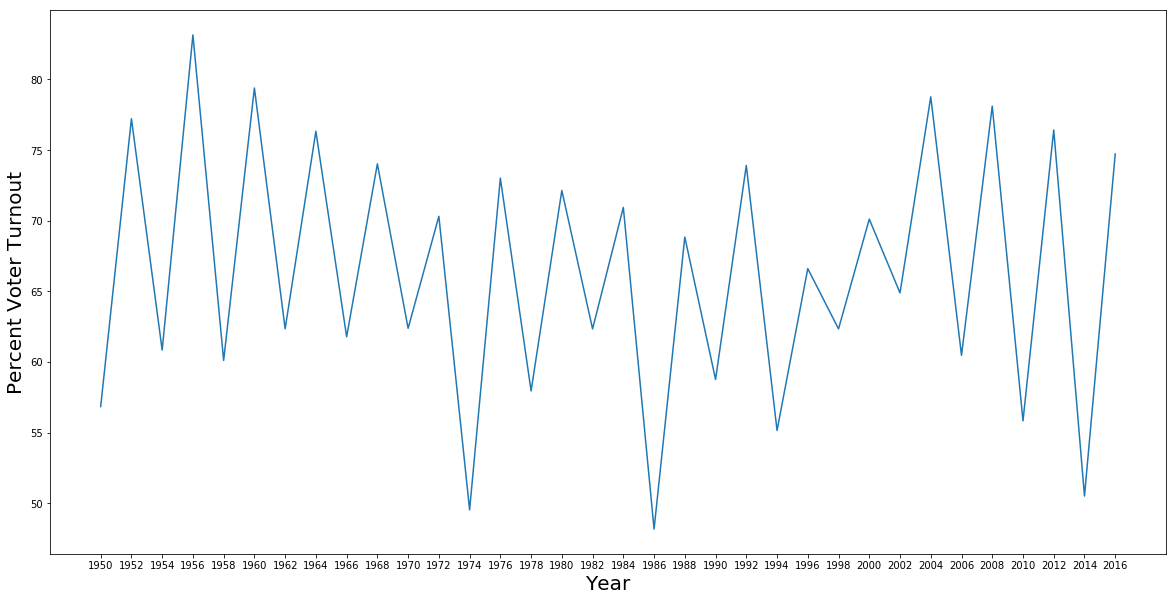

In [7]:
# General election
plt.figure(figsize=(20,10))
plt.plot(df_gen_general['Year'],df_gen_general['Percent Turnout'])
plt.ylabel('Percent Voter Turnout',fontsize=20)
plt.xlabel("Year", fontsize=20)

Text(0.5,0,'Year')

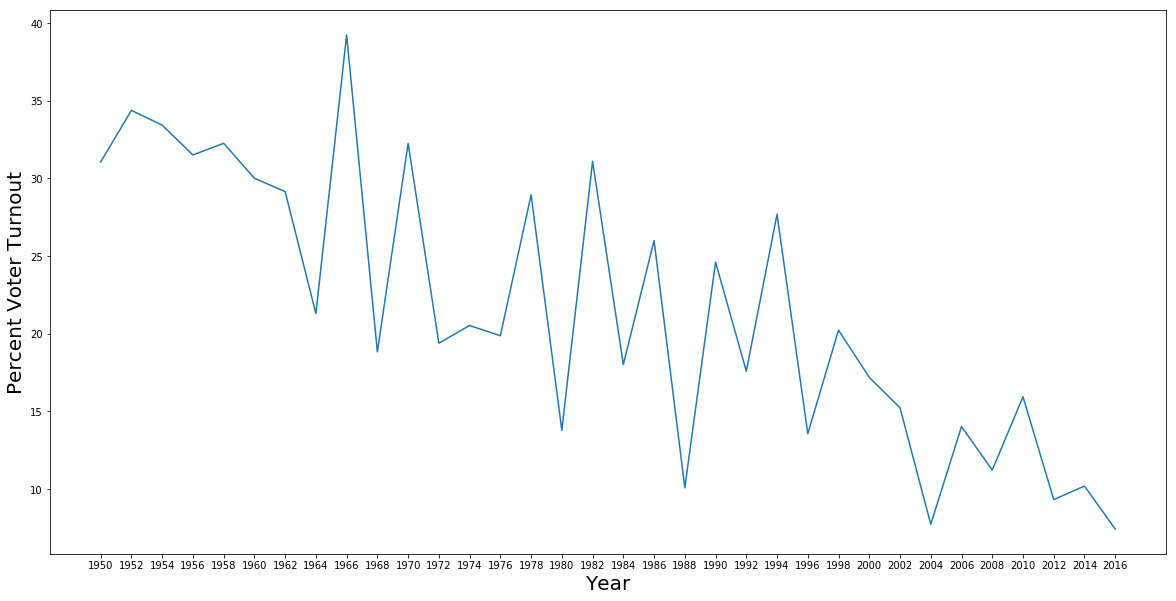

In [212]:
plt.figure(figsize=(20,10))
plt.plot(df_gen_primary['Year'],df_gen_primary['Percent Turnout'])
plt.ylabel('Percent Voter Turnout',fontsize=20)
plt.xlabel("Year", fontsize=20)

From the first plot we can see that a lot more people turn up for presidential elections (as opposed to other elections).

From the second plot we can see that percent turnout for primaries has been steadily decreasing.

Text(0.5,1,'Presidential Elections')

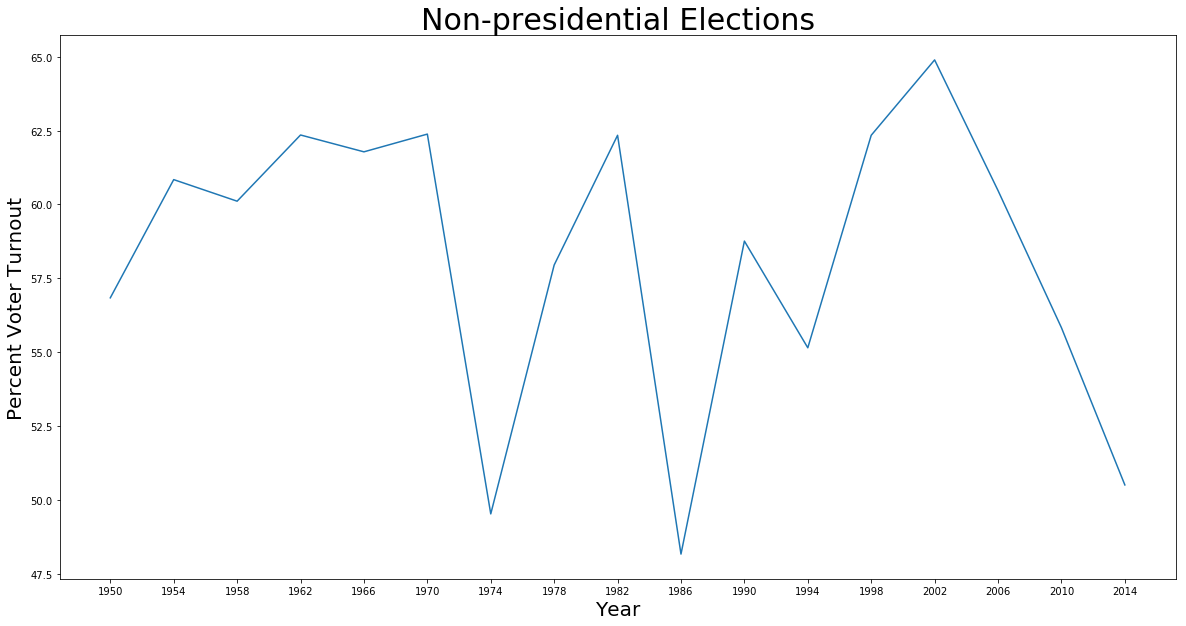

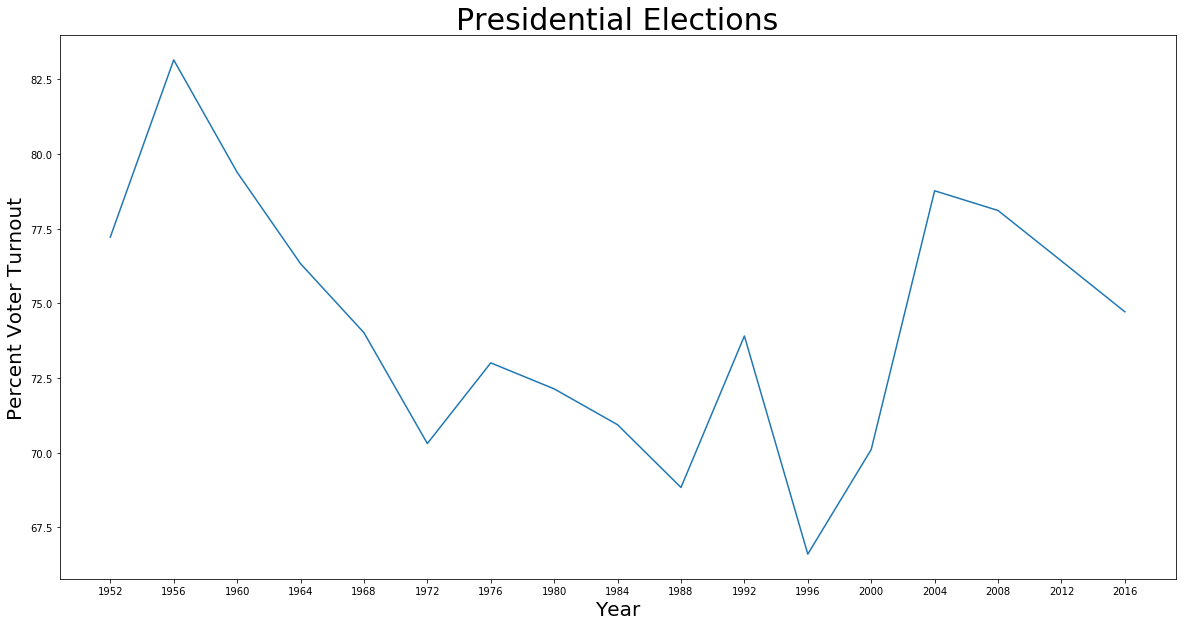

In [222]:
# Let us try the plots with presidential and other separate

# General election, non-presidential elections

plt.figure(1, figsize=(20,10))
plt.plot(df_gen_general['Year'][::2],df_gen_general['Percent Turnout'][::2])
plt.ylabel('Percent Voter Turnout',fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.title('Non-presidential Elections', fontsize=30)



plt.figure(2, figsize=(20,10))
plt.plot(df_gen_general['Year'][1::2],df_gen_general['Percent Turnout'][1::2])
plt.ylabel('Percent Voter Turnout',fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.title('Presidential Elections', fontsize=30)


## <font color='blue'> October 15, 2018 </font>

First, let us try to find the missing congressional districts using the data from 1994 rather than 2016

In [24]:
# After a quick search of the 2016 data, we see that county code and precinct code are not the
# best choice because they might change throughout the years. Let us try searching by name.

import string

translator = str.maketrans('', '', string.punctuation)

# df94['PCTNAME']=df94["PCTNAME"].str.upper() #Also convert precinct name to uppercase

#remove all punctuation and white space
df92['Precinct Name']=df92['Precinct Name'].str.translate(translator).str.replace(" ","")
df94['Precinct Name']=df94['Precinct Name'].str.translate(translator).str.replace(" ","")    
df96['Precinct Name']=df96['Precinct Name'].str.translate(translator).str.replace(" ","")
df98['Precinct Name']=df98['Precinct Name'].str.translate(translator).str.replace(" ","")

#replace "01" with "1", "02" with "2", etc.
#for i in range(0,10):
#    df16['PCTNAME']=df16['PCTNAME'].str.replace("0%d"%(i),"%d"%(i))

# Next, let us re-fill the congressional district entries using the precinct names
for i in range(0,df96.shape[0]):
    temp=df94[df94['Precinct Name'].str.contains(df96.iloc[i,1])]
    if temp.size!=0: #make sure we actually found the precinct
        df96.iloc[i,28]=temp.iloc[0,6]

for i in range(0, df98.shape[0]):
    # For each row, we locate the precinct in the 1994 data set to find its cong. district
    temp=df94[df94['Precinct Name'].str.contains(df98.iloc[i,1])]
    if temp.size!=0: #make sure we actually found the precinct
        df98.iloc[i,34]=temp.iloc[0,6]
        
# 92 is still somewhat tricky. Come back to this later.

        
print('Number of empty CG entries for 1998: ',df98.isna().sum().CG)
print('Number of empty CG entries for 1996: ',df96.isna().sum().CG)

Number of empty CG entries for 1998:  107
Number of empty CG entries for 1996:  63


In [25]:
# Save these as pd data frames
df96.to_pickle('C:\\Users\\Michelle Pin\\Desktop\\Industry\\MinneMUDAC Data Science Challenge\\Data sets\\df96')
df98.to_pickle('C:\\Users\\Michelle Pin\\Desktop\\Industry\\MinneMUDAC Data Science Challenge\\Data sets\\df98')

This is good enough. We can probably handle the rest by hand.

## <font color='blue'> Oct 17, 2018 </font>

Load the above files and try to open dat file we received from IPUMS.

In [7]:
df96=pd.read_pickle('C:\\Users\Michelle Pin\\Desktop\\Industry\\MinneMUDAC Data Science Challenge\\Data Sets\\df96')
df98=pd.read_pickle('C:\\Users\Michelle Pin\\Desktop\\Industry\\MinneMUDAC Data Science Challenge\\Data Sets\\df98')

df=pd.read_csv('C:\\Users\\Michelle Pin\\Desktop\\Industry\\MinneMUDAC Data Science Challenge\\Data sets\\ipums_extract1.csv')

In [27]:
print(df.shape)
print(df.columns.values)
print(df.YEAR.unique())

(2044399, 32)
['YEAR' 'DATANUM' 'SERIAL' 'HHWT' 'REGION' 'STATEICP' 'STATEFIP' 'COUNTY'
 'COUNTYFIPS' 'URBAN' 'METRO' 'CITYPOP' 'GQ' 'PERNUM' 'PERWT' 'SEX' 'AGE'
 'MARST' 'RACE' 'RACED' 'HISPAN' 'HISPAND' 'HCOVANY' 'HIGRADE' 'HIGRADED'
 'EDUC' 'EDUCD' 'EMPSTAT' 'EMPSTATD' 'OCC' 'IND' 'INCTOT']
[1850 1860 1870 1880 1900 1910 1920 1930 1940 1950 1960 1970 1980 1990
 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016]


Our general voter turnout goes all the way back to 1950, but our congressional district data starts at 1992, so, unfortunately, we only have 1990 from that decade. However, if we incorporate some kind of lag into our model this might be useful.

Let us do a little bit more naive exploration to get a sense of what the data looks like.

In [39]:
# Let us start by counting how many entries we have for each year as well as the missing county data.
c=[];
for i in range(1850,2010,10):
    temp=df[df['YEAR']==i]
    c.append(temp.shape[0])
    print('-',temp.shape[0], "entries for year",i,"with",temp.isna().sum().COUNTY, "missing county entries")

for i in range(2001,2017):
    temp=df[df['YEAR']==i]
    c.append(temp.shape[0])
    print('-',temp.shape[0], "entries for year",i,"with",temp.isna().sum().COUNTY, "missing county entries")


- 58 entries for year 1850 with 0 missing county entries
- 1706 entries for year 1860 with 0 missing county entries
- 4633 entries for year 1870 with 0 missing county entries
- 79030 entries for year 1880 with 0 missing county entries
- 0 entries for year 1890 with 0 missing county entries
- 89352 entries for year 1900 with 0 missing county entries
- 20821 entries for year 1910 with 0 missing county entries
- 23990 entries for year 1920 with 0 missing county entries
- 127442 entries for year 1930 with 0 missing county entries
- 28725 entries for year 1940 with 0 missing county entries
- 37832 entries for year 1950 with 0 missing county entries
- 170578 entries for year 1960 with 0 missing county entries
- 56137 entries for year 1970 with 0 missing county entries
- 203721 entries for year 1980 with 0 missing county entries
- 226174 entries for year 1990 with 0 missing county entries
- 249237 entries for year 2000 with 0 missing county entries
- 21188 entries for year 2001 with 21188 mis

Unfortunately, years 2001 to 2004 have many missing country entries. \_(".)_/

## <font color='purple'> October 21st, 2018 <font>

#### Task 1: Try to match County Code with Congressional district.
Our census data does not have the value of congressional district, but it does have a county code. We try to use that to match to congressional district.

In [9]:
print('Census data column names')
print(df.columns.values)
print('df16 column names')
print(df16.columns.values)

Census data column names
['YEAR' 'DATANUM' 'SERIAL' 'HHWT' 'REGION' 'STATEICP' 'STATEFIP' 'COUNTY'
 'COUNTYFIPS' 'URBAN' 'METRO' 'CITYPOP' 'GQ' 'PERNUM' 'PERWT' 'SEX' 'AGE'
 'MARST' 'RACE' 'RACED' 'HISPAN' 'HISPAND' 'HCOVANY' 'HIGRADE' 'HIGRADED'
 'EDUC' 'EDUCD' 'EMPSTAT' 'EMPSTATD' 'OCC' 'IND' 'INCTOT']
df16 column names
['VTDID' 'PCTNAME' 'PCTCODE' 'MCDNAME' 'COUNTYNAME' 'COUNTYCODE'
 'CONGDIST' 'MNSENDIST' 'MNLEGDIST' 'CTYCOMDIST' 'JUDDIST' 'SWCDIST'
 'WARD' 'HOSPDIST' 'PARKDIST' 'TABSYSTEM' 'TABMODEL' 'MAILBALLOT' 'REG7AM'
 'EDR' 'SIGNATURES' 'AB_MB' 'FEDONLYAB' 'PRESONLYAB' 'TOTVOTING' 'USPRSR'
 'USPRSDFL' 'USPRSCP' 'USPRSLMN' 'USPRSSWP' 'USPRSGP' 'USPRSADP' 'USPRSIP'
 'USPRSLIB' 'USPRSWI' 'USPRSTOTAL' 'USREPR' 'USREPDFL' 'USREPWI'
 'USREPTOTAL' 'MNSENR' 'MNSENDFL' 'MNSENWI' 'MNSENTOTAL' 'MNLEGR'
 'MNLEGDFL' 'MNLEGWI' 'MNLEGTOTAL' 'MNCA1YES' 'MNCA1NO' 'MNCA1EST'
 'MNCA1TOTAL']


In [19]:
print(df16.COUNTYCODE.unique())
print(df.COUNTYFIPS.unique())
print('The number of empty County Fips code entries in df is: ',df.isna().sum().COUNTYFIPS)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72.
 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. nan]
[ nan   0. 137.  53.  37. 163. 123. 109.   3. 145. 171.]
The number of empty County Fips code entries in df is:  458008


Unfortunately, about one fifth of our data is missing the county fips code and very few counties seems to have appeared. Let us see whether there is one county from each congressional district at least.

In [37]:
a=[0,137,53,37,163,123,109,3,145,171]
a.sort()
for i in a:
    temp=df16[df16['COUNTYCODE']==i]
    print('FIPS CODE %d'%(i),'unique count', temp.CONGDIST.unique())   


FIPS CODE 0 unique count []
FIPS CODE 3 unique count [7.]
FIPS CODE 37 unique count [7.]
FIPS CODE 53 unique count [1.]
FIPS CODE 109 unique count []
FIPS CODE 123 unique count []
FIPS CODE 137 unique count []
FIPS CODE 145 unique count []
FIPS CODE 163 unique count []
FIPS CODE 171 unique count []


After matching these by hand (wikipedia list of counties) + state of secretary congressional district maps, it seems that we at least have one from each congressional district.

#### Next: Some quick data exploration

In [44]:
# Let us start by loading the general turnout dataset.

turnout=[] #initialise a list
df_gen_primary=pd.read_csv("C:\\Users\Michelle Pin\\Desktop\\Industry\\MinneMUDAC Data Science Challenge\\Data sets\general_primary.csv")
df_gen_general=pd.read_csv("C:\\Users\Michelle Pin\\Desktop\\Industry\\MinneMUDAC Data Science Challenge\\Data sets\general_general.csv")

df_gen_primary.head() #Note that the first row contains the names of the columns.
df_gen_general.head()
# Rename columns, PercentEDV stands for percent voters registering on election day
# EDR stands for Election day registrations
    
df_gen_primary.columns=['Year','Eligible Voters Estimate','No of voters','Percent Turnout','EDR','PercentEDV']
df_gen_general.columns=['Year','Eligible Voters Estimate','No of voters','Percent Turnout','EDR','PercentEDV']

#DO THE BELOW ONCE - Removes first row and last row
df_gen_primary=df_gen_primary.drop([0,35]) #remove first and last row
df_gen_general=df_gen_general.drop([0,35])

#Remove '%' symbols
df_gen_general['Percent Turnout']=df_gen_general['Percent Turnout'].str.replace("%","")
df_gen_primary['Percent Turnout']=df_gen_primary['Percent Turnout'].str.replace("%","")

df_gen_general['Percent Turnout']=pd.to_numeric(df_gen_general['Percent Turnout'])
df_gen_primary['Percent Turnout']=pd.to_numeric(df_gen_primary['Percent Turnout'])


df_gen_general.head() #looks good. Let us move on
df_gen_primary.head()

Year Eligible Voters Estimate No of voters  Percent Turnout      EDR  \
1  1950                1,879,000      583,617            31.06  No data   
2  1952                1,899,000      652,825            34.38  No data   
3  1954                1,920,000      641,906            33.43  No data   
4  1956                1,940,000      611,197            31.51  No data   
5  1958                1,960,000      632,240            32.26  No data   

  PercentEDV  
1    No data  
2    No data  
3    No data  
4    No data  
5    No data

### Task 2: Build a master data set with the following column values
   - Year
   - CG (0 stands for the whole state)
   - Results (per party, per race etc)
   - Age, Income + other quantitative variables (percentages)
   - Sex, Race + other categorical variables (percentages)
   
#### <font color='red'> Note: </font>
Unfortunately, each data set has different variable names, so we'll have to deal with each of them individually.

In [37]:
# Initialise year data frame
year=[]
for i in range(1994,2018,2):
    year=year+[i]*9

df_master=pd.DataFrame(columns=['YEAR','CG','CONGTOT','CONGIR','CONGDFL','CONGTH','SENTOT','SENIR','SENDFL','SENTH','GOVTOT',
                               'GOVIR','GOVDFL','GOVTH','AGE','INCOME'])
df_master['YEAR']=year
df_master['CG']=[0,1,2,3,4,5,6,7,8]*12

#### 2000 results

In [38]:
#Fill this in for 2000

temp=df00.groupby('CG').sum() #group by congressional district

# Now let's do this for each congressional district
for i in range(1,9):
    # Congressional district house
    df_master.loc[27+i,'CONGTH']=temp.loc[i,'IND_CONG']+temp.loc[i,'OTHER_CONG']+temp.loc[i,'CP_CONG']
    df_master.loc[27+i,'CONGIR']=temp.loc[i,'R_CONG']
    df_master.loc[27+i,'CONGDFL']=temp.loc[i,'DFL_CONG']
    df_master.loc[27+i,'CONGTOT']= df_master.loc[27+i,'CONGTH']+df_master.loc[27+i,'CONGIR']+ df_master.loc[27+i,'CONGDFL']
    # US Senator
    df_master.loc[27+i,'SENTH']=temp.loc[i,'IND_USSEN']+temp.loc[i,'OTHER_USSEN']+temp.loc[i,'CP_USSEN']+temp.loc[i,'SWP_USSEN']+temp.loc[i,'LIB_USSEN']+temp.loc[i,'GRP_USSEN']
    df_master.loc[27+i,'SENIR']=temp.loc[i,'R_USSEN']
    df_master.loc[27+i,'SENDFL']=temp.loc[i,'DFL_USSEN']
    df_master.loc[27+i,'SENTOT']= df_master.loc[27+i,'SENTH']+df_master.loc[27+i,'SENIR']+ df_master.loc[27+i,'SENDFL']

# Now tally-up to get the totals for the whole state

df_master.loc[27,:]=df_master.iloc[28:36,:].sum()
df_master.loc[27,'YEAR']=2000 #correct the year & CG
df_master.loc[27,'CG']=0


In [39]:
df_master.iloc[27:36,:]


YEAR   CG      CONGTOT  CONGIR     CONGDFL  CONGTH       SENTOT  \
27  2000.0  0.0  2.38351e+06  993371  1.2342e+06  155931  2.46942e+06   
28  2000.0  1.0       283221  159835      117946    5440       292119   
29  2000.0  2.0       290799  139316      138969   12514       297993   
30  2000.0  3.0       330603  217933      101106   11564       345180   
31  2000.0  4.0       272724   83852      130403   58469       282725   
32  2000.0  5.0       256054   62470      173575   20009       277545   
33  2000.0  6.0       364408  170900      176340   17168       369641   
34  2000.0  7.0       276046   79175      185771   11100       282545   
35  2000.0  8.0       309651   79890      210094   19667       321674   

          SENIR       SENDFL   SENTH GOVTOT GOVIR GOVDFL GOVTH  AGE INCOME  
27  1.04747e+06  1.18155e+06  240395      0     0      0     0    0      0  
28       132346       135086   24687    NaN   NaN    NaN   NaN  NaN    NaN  
29       148246       124316   25431    NaN   NaN    NaN   NaN  NaN    NaN  
30       160770       150111   34299    NaN   NaN    NaN   NaN  NaN    NaN  
31        96020       154687   32018    NaN   NaN    NaN   NaN  NaN    NaN  
32        72124       165409   40012    NaN   NaN    NaN   NaN  NaN    NaN  
33       170883       162743   36015    NaN   NaN    NaN   NaN  NaN    NaN  
34       136151       124100   22294    NaN   NaN    NaN   NaN  NaN    NaN  
35       130934       165101   25639    NaN   NaN    NaN   NaN  NaN    NaN

#### 2002 Results

In [46]:
# Next one. 2002
df02=pd.read_csv("C:\\Users\Michelle Pin\\Desktop\\Industry\\MinneMUDAC Data Science Challenge\\Data sets\\2002_results.csv")

df02.head()
# This one is somewhat of a mess, with no names for the columns.

#First let's remove the first two rows. DO THIS ONCE
df02=df02.drop([0,1])

df02.head()

C:\Users\Michelle Pin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,2,3,5,6,7,8,9,13,14,15,16,17,18,19,20,21,22,23,24,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Precinct and Voting District Information       Unnamed: 1 Unnamed: 2  \
2                                270010005           AITKIN        NaN   
3                                270010010      AITKIN TWP.        NaN   
4                                270010015  BALL BLUFF TWP.        NaN   
5                                270010020      BALSAM TWP.        NaN   
6                                270010025      BEAVER TWP.        NaN   

  Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
2         08        03B         01         00        001         00   
3         08        03B         01         00        001         00   
4         08        03B         05         00        002         00   
5         08        03B         05         00        004         00   
6         08        03B         03         00        004         00   

  Unnamed: 9     ...      9TH DISTRICT COURT 4 Unnamed: 134 Unnamed: 135  \
2         00     ...                       368          336            3   
3         00     ...                       188          189            0   
4         00     ...                        73           50            0   
5         00     ...                         5            2            0   
6         00     ...                        18            9            0   

  9TH DISTRICT COURT 12 Unnamed: 137 Unnamed: 138 10TH DISTRICT COURT 14  \
2                   479          202            3                      0   
3                   246          135            1                      0   
4                    81           48            0                      0   
5                     4            6            0                      0   
6                    21            7            0                      0   

  Unnamed: 140 Unnamed: 141 Unnamed: 142  
2            0            0          NaN  
3            0            0          NaN  
4            0            0          NaN  
5            0            0          NaN  
6            0            0          NaN  

[5 rows x 143 columns]

In [47]:
# Let us rename the columns
d=pd.read_csv("C:\\Users\Michelle Pin\\Desktop\\Industry\\MinneMUDAC Data Science Challenge\\Data sets\\2002_cnames.csv")

cnames=['MCDPRCT']
for i in range(0,d.shape[0]):
    cnames.append(d.iloc[i,0])
cnames.append('mist') # an extra value at the end so that it matches the length of df02, not sure where this is coming from
df02.columns=cnames

In [50]:
# Convert columns to numeric
for i in ['CG','USSenGP','USSenIP','USSenR','USSenDFL','USSenCP','USSenWI','CongGP','CongIP','CongR','CongDFL','CongNNT','CongWI','GovGP','GovIP','GovR','GovDFL','GovCP','GovI','GovSW','GovWI']:
    df02[i]=pd.to_numeric(df02[i])
    
temp=df02.groupby('CG').sum() #group by congressional district
temp

USSenGP  USSenIP  USSenR  USSenDFL  USSenCP  USSenWI  CongGP  CongIP  \
CG                                                                         
1      1311     7819  132328    126543      302      300    9964       0   
2      1039     5022  169460    114896      210      163       0       0   
3      1041     4593  173412    123657      179      160       0       0   
4      1258     3791  119848    148405      271      192    9919       0   
5      1948     4077   85660    169347      254      218   17825       0   
6      1206     5922  174089    111939      268      376       0   21484   
7      1008     7253  134746    122261      364      170       0       0   
8      1317     6688  127596    151100      408      225       0       0   

     CongR  CongDFL  ...   CongWI  GovGP  GovIP    GovR  GovDFL  GovCP  GovI  \
CG                   ...                                                       
1   163570    92165  ...      283   3842  95582  104596   63762    271   850   
2   152970   121121  ...      339   4842  48463  155040   82854    221   916   
3   213334    82575  ...      309   5033  43687  155825   97021    222   975   
4    89705   164597  ...      319   8293  33231  110400  120863    360  1503   
5    66271   171572  ...      314  13562  34607   77101  135782    258  1976   
6   164747   100738  ...      343   5429  40023  159866   86493    352  1110   
7    90342   170234  ...      237   3802  33421  122268  103866    445  1140   
8    88673   194909  ...      349   5786  35520  114377  130627    408  1228   

    GovSW  GovWI  mist  
CG                      
1     384    142   0.0  
2     280    131   0.0  
3     225    160   0.0  
4     450    173   0.0  
5     453    180   0.0  
6     349    202   0.0  
7     461    159   0.0  
8     424    201   0.0  

[8 rows x 21 columns]

In [52]:
# Now let's do this for each congressional district
for i in range(1,9):
    # Congressional district house
    df_master.loc[36+i,'CONGTH']=temp.loc[i,'CongGP']+temp.loc[i,'CongIP']+temp.loc[i,'CongNNT']+temp.loc[i,'CongWI']
    df_master.loc[36+i,'CONGIR']=temp.loc[i,'CongR']
    df_master.loc[36+i,'CONGDFL']=temp.loc[i,'CongDFL']
    df_master.loc[36+i,'CONGTOT']= df_master.loc[36+i,'CONGTH']+df_master.loc[36+i,'CONGIR']+ df_master.loc[36+i,'CONGDFL']
    # US Senator
    df_master.loc[36+i,'SENTH']=temp.loc[i,'USSenGP']+temp.loc[i,'USSenIP']+temp.loc[i,'USSenCP']+temp.loc[i,'USSenWI']
    df_master.loc[36+i,'SENIR']=temp.loc[i,'USSenR']
    df_master.loc[36+i,'SENDFL']=temp.loc[i,'USSenDFL']
    df_master.loc[36+i,'SENTOT']= df_master.loc[36+i,'SENTH']+df_master.loc[36+i,'SENIR']+ df_master.loc[36+i,'SENDFL']

     # US Governor
    df_master.loc[36+i,'GOVTH']=temp.loc[i,'GovGP']+temp.loc[i,'GovIP']+temp.loc[i,'GovCP']+temp.loc[i,'GovI']+temp.loc[i,'GovSW']+temp.loc[i,'GovWI']
    df_master.loc[36+i,'GOVIR']=temp.loc[i,'GovR']
    df_master.loc[36+i,'GOVDFL']=temp.loc[i,'GovDFL']
    df_master.loc[36+i,'GOVTOT']= df_master.loc[36+i,'GOVTH']+df_master.loc[36+i,'GOVIR']+ df_master.loc[36+i,'GOVDFL']

    
# Now tally-up to get the totals for the whole state

df_master.loc[36,:]=df_master.iloc[37:45,:].sum()
df_master.loc[36,'YEAR']=2002 #correct the year & CG
df_master.loc[36,'CG']=0


In [53]:
df_master.iloc[36:45,:]

YEAR   CG      CONGTOT       CONGIR      CONGDFL CONGTH       SENTOT  \
36  2002.0  0.0  2.20164e+06  1.02961e+06  1.09791e+06  74115  2.24464e+06   
37  2002.0  1.0       265982       163570        92165  10247       268603   
38  2002.0  2.0       286860       152970       121121  12769       290790   
39  2002.0  3.0       296218       213334        82575    309       303042   
40  2002.0  4.0       264540        89705       164597  10238       273765   
41  2002.0  5.0       255982        66271       171572  18139       261504   
42  2002.0  6.0       287312       164747       100738  21827       293800   
43  2002.0  7.0       260813        90342       170234    237       265802   
44  2002.0  8.0       283931        88673       194909    349       287334   

          SENIR       SENDFL  SENTH       GOVTOT   GOVIR  GOVDFL   GOVTH  AGE  \
36  1.11714e+06  1.06815e+06  59353  2.25247e+06  999473  821268  431732    0   
37       132328       126543   9732       269429  104596   63762  101071  NaN   
38       169460       114896   6434       292747  155040   82854   54853  NaN   
39       173412       123657   5973       303148  155825   97021   50302  NaN   
40       119848       148405   5512       275273  110400  120863   44010  NaN   
41        85660       169347   6497       263919   77101  135782   51036  NaN   
42       174089       111939   7772       293824  159866   86493   47465  NaN   
43       134746       122261   8795       265562  122268  103866   39428  NaN   
44       127596       151100   8638       288571  114377  130627   43567  NaN   

   INCOME  
36      0  
37    NaN  
38    NaN  
39    NaN  
40    NaN  
41    NaN  
42    NaN  
43    NaN  
44    NaN

#### 2004 Results

In [57]:
# Next one. 2004

temp=df04.groupby('CG').sum() #group by congressional district

# Now let's do this for each congressional district
for i in range(1,9):
    # Congressional district house
    df_master.loc[45+i,'CONGTH']=temp.loc[i,'USCongGr']+temp.loc[i,'USCongI']+temp.loc[i,'USCongWI']
    df_master.loc[45+i,'CONGIR']=temp.loc[i,'USCongR']
    df_master.loc[45+i,'CONGDFL']=temp.loc[i,'USCongDFL']
    df_master.loc[45+i,'CONGTOT']= df_master.loc[45+i,'CONGTH']+df_master.loc[45+i,'CONGIR']+ df_master.loc[45+i,'CONGDFL']
    
    '''
    # US Senator
    df_master.loc[36+i,'SENTH']=temp.loc[i,'USSenGP']+temp.loc[i,'USSenIP']+temp.loc[i,'USSenCP']+temp.loc[i,'USSenWI']
    df_master.loc[36+i,'SENIR']=temp.loc[i,'USSenR']
    df_master.loc[36+i,'SENDFL']=temp.loc[i,'USSenDFL']
    df_master.loc[36+i,'SENTOT']= df_master.loc[36+i,'SENTH']+df_master.loc[36+i,'SENIR']+ df_master.loc[36+i,'SENDFL']

     # US Governor
    df_master.loc[36+i,'GOVTH']=temp.loc[i,'GovGP']+temp.loc[i,'GovIP']+temp.loc[i,'GovCP']+temp.loc[i,'GovI']+temp.loc[i,'GovSW']+temp.loc[i,'GovWI']
    df_master.loc[36+i,'GOVIR']=temp.loc[i,'GovR']
    df_master.loc[36+i,'GOVDFL']=temp.loc[i,'GovDFL']
    df_master.loc[36+i,'GOVTOT']= df_master.loc[36+i,'GOVTH']+df_master.loc[36+i,'GOVIR']+ df_master.loc[36+i,'GOVDFL']
    '''
    
# Now tally-up to get the totals for the whole state

df_master.loc[45,:]=df_master.iloc[46:54,:].sum()
df_master.loc[45,'YEAR']=2004 #correct the year & CG
df_master.loc[45,'CG']=0


In [75]:
df_master[45:54]

YEAR   CG      CONGTOT      CONGIR      CONGDFL CONGTH SENTOT SENIR  \
45  2004.0  0.0  2.72183e+06  1.2361e+06  1.39962e+06  86108      0     0   
46  2004.0  1.0       324052      193133       115088  15831    NaN   NaN   
47  2004.0  2.0       365945      206313       147527  12105    NaN   NaN   
48  2004.0  3.0       358892      231871       126665    356    NaN   NaN   
49  2004.0  4.0       317299      105467       182387  29445    NaN   NaN   
50  2004.0  5.0       313523       76600       218434  18489    NaN   NaN   
51  2004.0  6.0       377224      203669       173309    246    NaN   NaN   
52  2004.0  7.0       314257      106349       207628    280    NaN   NaN   
53  2004.0  8.0       350635      112693       228586   9356    NaN   NaN   

   SENDFL SENTH GOVTOT GOVIR GOVDFL GOVTH  AGE INCOME  
45      0     0      0     0      0     0    0      0  
46    NaN   NaN    NaN   NaN    NaN   NaN  NaN    NaN  
47    NaN   NaN    NaN   NaN    NaN   NaN  NaN    NaN  
48    NaN   NaN    NaN   NaN    NaN   NaN  NaN    NaN  
49    NaN   NaN    NaN   NaN    NaN   NaN  NaN    NaN  
50    NaN   NaN    NaN   NaN    NaN   NaN  NaN    NaN  
51    NaN   NaN    NaN   NaN    NaN   NaN  NaN    NaN  
52    NaN   NaN    NaN   NaN    NaN   NaN  NaN    NaN  
53    NaN   NaN    NaN   NaN    NaN   NaN  NaN    NaN

#### 2006 Results

In [70]:
# Next, 2006.
# Drop the last three rows because they contain gibberish. DO THIS ONCE
df06=df06.drop([4123,4124,4125])

In [83]:
# Next one. 2006

# Convert columns to numeric
for i in ['CG','USSenR','USSenDFL','USSenIP','USSenWI','USSenTOT','GovR','GovDFL','GovIP','GovWI','GovTOT','CongR','CongDFL','CongIP','CongWI','CongTOT']: 
    df06[i]=pd.to_numeric(df06[i])
        
temp=df06.groupby('CG').sum() #group by congressional district

# Now let's do this for each congressional district
for i in range(1,9):
    # Congressional district house
    df_master.loc[54+i,'CONGTH']=temp.loc[i,'CongIP']+temp.loc[i,'CongWI']
    df_master.loc[54+i,'CONGIR']=temp.loc[i,'CongR']
    df_master.loc[54+i,'CONGDFL']=temp.loc[i,'CongDFL']
    df_master.loc[54+i,'CONGTOT']= temp.loc[i,'CongTOT']
    
    # US Senator
    df_master.loc[54+i,'SENTH']=temp.loc[i,'USSenIP']+temp.loc[i,'USSenWI']
    df_master.loc[54+i,'SENIR']=temp.loc[i,'USSenR']
    df_master.loc[54+i,'SENDFL']=temp.loc[i,'USSenDFL']
    df_master.loc[54+i,'SENTOT']= temp.loc[i,'USSenTOT']

    # US Governor
    df_master.loc[54+i,'GOVTH']=temp.loc[i,'GovIP']+temp.loc[i,'GovWI']
    df_master.loc[54+i,'GOVIR']=temp.loc[i,'GovR']
    df_master.loc[54+i,'GOVDFL']=temp.loc[i,'GovDFL']
    df_master.loc[54+i,'GOVTOT']= temp.loc[i,'GovTOT']

    
#Now tally-up to get the totals for the whole state

df_master.loc[54,:]=df_master.iloc[55:63,:].sum()
df_master.loc[54,'YEAR']=2006 #correct the year & CG
df_master.loc[54,'CG']=0
df_master.iloc[54:63,:]

YEAR   CG      CONGTOT  CONGIR      CONGDFL CONGTH       SENTOT   SENIR  \
54  2006.0  0.0  2.17897e+06  924636  1.15262e+06  88114  2.20277e+06  835653   
55  2006.0  1.0       268421  126486       141556    379       268901  109372   
56  2006.0  2.0       290540  163269       116343  10928       293453  125891   
57  2006.0  3.0       284244  184333        99588    323       287975  118330   
58  2006.0  4.0       247466   74797       172096    573       254322   76559   
59  2006.0  5.0       244905   52263       136060  51790       249330   53006   
60  2006.0  6.0       302188  151248       127144  23796       303334  138591   
61  2006.0  7.0       257194   74557       179164    170       260046  110740   
62  2006.0  8.0       284016   97683       180670    155       285411  103164   

         SENDFL  SENTH       GOVTOT        GOVIR       GOVDFL   GOVTH  AGE  \
54  1.27885e+06  72148  2.20294e+06  1.02857e+06  1.00746e+06  142684    0   
55       147971   9482       268878       132466       117702   15036  NaN   
56       156714   9108       293755       160545       113052   17873  NaN   
57       160041   8156       288024       151609       116074   18184  NaN   
58       165913   9544       254588        96001       132250   23495  NaN   
59       184546   8875       248955        68121       155171   21946  NaN   
60       153247   9724       303371       169544       113109   18014  NaN   
61       138849   8723       260063       132683       110809   13425  NaN   
62       171568   8536       285303       117599       149293   14711  NaN   

   INCOME  
54      0  
55    NaN  
56    NaN  
57    NaN  
58    NaN  
59    NaN  
60    NaN  
61    NaN  
62    NaN

#### 2008 Results

In [97]:
temp=df08.groupby('CG').sum()

# Now let's do this for each congressional district
for i in range(1,9):
    # Congressional district house
    df_master.loc[63+i,'CONGTH']=temp.loc[i,'CONGIP']+temp.loc[i,'CONGWI']
    df_master.loc[63+i,'CONGIR']=temp.loc[i,'CONGR']
    df_master.loc[63+i,'CONGDFL']=temp.loc[i,'CONGDFL']
    df_master.loc[63+i,'CONGTOT']= temp.loc[i,'CONGTOT']
    
    # US Senator
    df_master.loc[63+i,'SENTH']=temp.loc[i,'USSENIP']+temp.loc[i,'USSENLIB']+temp.loc[i,'USSENCP']+temp.loc[i,'USSENWI']
    df_master.loc[63+i,'SENIR']=temp.loc[i,'USSENR']
    df_master.loc[63+i,'SENDFL']=temp.loc[i,'USSENDFL']
    df_master.loc[63+i,'SENTOT']= temp.loc[i,'USSENTOT']
    
    '''
    # US Governor
    df_master.loc[63+i,'GOVTH']=temp.loc[i,'GovIP']+temp.loc[i,'GovWI']
    df_master.loc[63+i,'GOVIR']=temp.loc[i,'GovR']
    df_master.loc[63+i,'GOVDFL']=temp.loc[i,'GovDFL']
    df_master.loc[63+i,'GOVTOT']= temp.loc[i,'GovTOT']
    '''

    
#Now tally-up to get the totals for the whole state

df_master.loc[63,:]=df_master.iloc[63:72,:].sum()
df_master.loc[63,'YEAR']=2008 #correct the year & CG
df_master.loc[63,'CG']=0
df_master.iloc[63:72,:]

YEAR   CG      CONGTOT       CONGIR      CONGDFL  CONGTH       SENTOT  \
63  2008.0  0.0  5.60523e+06  2.13803e+06  3.22496e+06  242238  5.77288e+06   
64  2008.0  1.0       332400       109453       207753   15194       337516   
65  2008.0  2.0       385656       220924       164093     639       396997   
66  2008.0  3.0       369104       178932       150787   39385       379212   
67  2008.0  4.0       316018        98936       216267     815       334982   
68  2008.0  5.0       322747        71020       228776   22951       339779   
69  2008.0  6.0       404725       187817       175786   41122       409630   
70  2008.0  7.0       314680        87062       227187     431       323010   
71  2008.0  8.0       357284       114871       241831     582       365315   

         SENIR      SENDFL   SENTH       GOVTOT   GOVIR  GOVDFL   GOVTH  AGE  \
63  2.4238e+06  2.4239e+06  925180  2.10702e+06  910462  919232  269811    0   
64      147745      132842   56929       247558  112742   98862   34667  NaN   
65      188408      140193   68396       289794  145660  103659   39699  NaN   
66      176697      146915   55600       277624  131668  107190   38188  NaN   
67      117196      168445   49341       235304   78957  124978   30694  NaN   
68       84817      209544   45418       233192   54382  150691   27375  NaN   
69      199513      134917   75200       304165  160619  105064   37451  NaN   
70      150893      118020   54097       242258  114104   95167   31801  NaN   
71      146632      161074   57609       277126  112330  133621   29936  NaN   

   INCOME  
63      0  
64    NaN  
65    NaN  
66    NaN  
67    NaN  
68    NaN  
69    NaN  
70    NaN  
71    NaN

#### 2010 Results

In [98]:
temp=df10.groupby('CG').sum()

# Now let's do this for each congressional district
for i in range(1,9):
    # Congressional district house
    df_master.loc[72+i,'CONGTH']=temp.loc[i,'CONGIP']+temp.loc[i,'CONGWI']
    df_master.loc[72+i,'CONGIR']=temp.loc[i,'CONGR']
    df_master.loc[72+i,'CONGDFL']=temp.loc[i,'CONGDFL']
    df_master.loc[72+i,'CONGTOT']= temp.loc[i,'CONGTOT']
    
    '''
    # US Senator
    df_master.loc[72+i,'SENTH']=temp.loc[i,'USSENIP']+temp.loc[i,'USSENLIB']+temp.loc[i,'USSENCP']+temp.loc[i,'USSENWI']
    df_master.loc[72+i,'SENIR']=temp.loc[i,'USSENR']
    df_master.loc[72+i,'SENDFL']=temp.loc[i,'USSENDFL']
    df_master.loc[72+i,'SENTOT']= temp.loc[i,'USSENTOT']
    
    '''
    # US Governor
    df_master.loc[72+i,'GOVTH']=temp.loc[i,'GOVIP']+temp.loc[i,'GOVGP']+temp.loc[i,'GOVWI']+temp.loc[i,'GOVTRP']+temp.loc[i,'GOVEDP']
    df_master.loc[72+i,'GOVIR']=temp.loc[i,'GOVR']
    df_master.loc[72+i,'GOVDFL']=temp.loc[i,'GOVDFL']
    df_master.loc[72+i,'GOVTOT']= temp.loc[i,'GOVTOT']

    
#Now tally-up to get the totals for the whole state

df_master.loc[72,:]=df_master.iloc[73:81,:].sum()
df_master.loc[72,'YEAR']=2010 #correct the year & CG
df_master.loc[72,'CG']=0
df_master.iloc[72:81,:]


YEAR   CG      CONGTOT  CONGIR      CONGDFL CONGTH SENTOT SENIR SENDFL  \
72  2010.0  0.0  2.09059e+06  970741  1.00203e+06  86455      0     0      0   
73  2010.0  1.0       248005  109242       122365  13344    NaN   NaN    NaN   
74  2010.0  2.0       286453  181341       104809    303    NaN   NaN    NaN   
75  2010.0  3.0       274092  161177       100240  12675    NaN   NaN    NaN   
76  2010.0  4.0       231426   80141       136746  14539    NaN   NaN    NaN   
77  2010.0  5.0       228746   55222       154833   7675    NaN   NaN    NaN   
78  2010.0  6.0       303691  159476       120846  17879    NaN   NaN    NaN   
79  2010.0  7.0       241097   90652       133096   8032    NaN   NaN    NaN   
80  2010.0  8.0       277081  133490       129091  12008    NaN   NaN    NaN   

   SENTH       GOVTOT   GOVIR  GOVDFL   GOVTH  AGE INCOME  
72     0  2.10702e+06  910462  919232  269811    0      0  
73   NaN       247558  112742   98862   34667  NaN    NaN  
74   NaN       289794  145660  103659   39699  NaN    NaN  
75   NaN       277624  131668  107190   38188  NaN    NaN  
76   NaN       235304   78957  124978   30694  NaN    NaN  
77   NaN       233192   54382  150691   27375  NaN    NaN  
78   NaN       304165  160619  105064   37451  NaN    NaN  
79   NaN       242258  114104   95167   31801  NaN    NaN  
80   NaN       277126  112330  133621   29936  NaN    NaN

#### 2012 Results

In [103]:
temp=df12.groupby('CONGDIST').sum()

# Now let's do this for each congressional district
for i in range(1,9):
    # Congressional district house
    df_master.loc[81+i,'CONGTH']=temp.loc[i,'USREPIP']+temp.loc[i,'USREPWI']
    df_master.loc[81+i,'CONGIR']=temp.loc[i,'USREPR']
    df_master.loc[81+i,'CONGDFL']=temp.loc[i,'USREPDFL']
    df_master.loc[81+i,'CONGTOT']= temp.loc[i,'USREPTOTAL']
    
    
    # US Senator
    df_master.loc[81+i,'SENTH']=temp.loc[i,'USSENIP']+temp.loc[i,'USSENGR']+temp.loc[i,'USSENMOP']+temp.loc[i,'USSENWI']
    df_master.loc[81+i,'SENIR']=temp.loc[i,'USSENR']
    df_master.loc[81+i,'SENDFL']=temp.loc[i,'USSENDFL']
    df_master.loc[81+i,'SENTOT']= temp.loc[i,'USSENTOTAL']
    
    '''
    # US Governor
    df_master.loc[72+i,'GOVTH']=temp.loc[i,'GOVIP']+temp.loc[i,'GOVGP']+temp.loc[i,'GOVWI']+temp.loc[i,'GOVTRP']+temp.loc[i,'GOVEDP']
    df_master.loc[72+i,'GOVIR']=temp.loc[i,'GOVR']
    df_master.loc[72+i,'GOVDFL']=temp.loc[i,'GOVDFL']
    df_master.loc[72+i,'GOVTOT']= temp.loc[i,'GOVTOT']
    '''
    
#Now tally-up to get the totals for the whole state

df_master.loc[81,:]=df_master.iloc[81:90,:].sum()
df_master.loc[81,'YEAR']=2012 #correct the year & CG
df_master.loc[81,'CG']=0
df_master.iloc[81:90,:]

YEAR   CG      CONGTOT       CONGIR      CONGDFL CONGTH       SENTOT  \
81  2012.0  0.0  2.81338e+06  1.21041e+06  1.56098e+06  41990  2.84321e+06   
82  2012.0  1.0       335880       142164       193211    505       332593   
83  2012.0  2.0       358446       193587       164338    521       366583   
84  2012.0  3.0       382705       222335       159937    433       391583   
85  2012.0  4.0       347991       109659       216685  21647       358571   
86  2012.0  5.0       351969        88753       262102   1114       361805   
87  2012.0  6.0       355153       179240       174944    969       354398   
88  2012.0  7.0       327576       114151       197791  15634       326883   
89  2012.0  8.0       353663       160520       191976   1167       350791   

     SENIR      SENDFL   SENTH GOVTOT GOVIR GOVDFL GOVTH  AGE INCOME  
81  867974  1.8546e+06  120638      0     0      0     0    0      0  
82  107055      207533   18005    NaN   NaN    NaN   NaN  NaN    NaN  
83  125988      226102   14493    NaN   NaN    NaN   NaN  NaN    NaN  
84  134333      244967   12283    NaN   NaN    NaN   NaN  NaN    NaN  
85   88336      255214   15021    NaN   NaN    NaN   NaN  NaN    NaN  
86   61738      284354   15713    NaN   NaN    NaN   NaN  NaN    NaN  
87  131551      207462   15385    NaN   NaN    NaN   NaN  NaN    NaN  
88  111575      200024   15284    NaN   NaN    NaN   NaN  NaN    NaN  
89  107398      228939   14454    NaN   NaN    NaN   NaN  NaN    NaN

### 2014 Results

In [105]:
temp=df14.groupby('CONGDIST').sum()

# Now let's do this for each congressional district
for i in range(1,9):
    # Congressional district house
    df_master.loc[90+i,'CONGTH']=temp.loc[i,'USREPIP']+temp.loc[i,'USREPWI']
    df_master.loc[90+i,'CONGIR']=temp.loc[i,'USREPR']
    df_master.loc[90+i,'CONGDFL']=temp.loc[i,'USREPDFL']
    df_master.loc[90+i,'CONGTOT']= temp.loc[i,'USREPTOTAL']
    
    
    # US Senator
    df_master.loc[90+i,'SENTH']=temp.loc[i,'USSENIP']+temp.loc[i,'USSENLIB']+temp.loc[i,'USSENWI']
    df_master.loc[90+i,'SENIR']=temp.loc[i,'USSENR']
    df_master.loc[90+i,'SENDFL']=temp.loc[i,'USSENDFL']
    df_master.loc[90+i,'SENTOT']= temp.loc[i,'USSENTOTAL']
    
    
    # US Governor
    df_master.loc[90+i,'GOVTH']=temp.loc[i,'MNGOVIP']+temp.loc[i,'MNGOVLIB']+temp.loc[i,'MNGOVLIB']+temp.loc[i,'MNGOVGLC']+temp.loc[i,'MNGOVWI']
    df_master.loc[90+i,'GOVIR']=temp.loc[i,'MNGOVR']
    df_master.loc[90+i,'GOVDFL']=temp.loc[i,'MNGOVDFL']
    df_master.loc[90+i,'GOVTOT']= temp.loc[i,'MNGOVTOTAL']
    
    
#Now tally-up to get the totals for the whole state

df_master.loc[90,:]=df_master.iloc[91:99,:].sum()
df_master.loc[90,'YEAR']=2014 #correct the year & CG
df_master.loc[90,'CG']=0
df_master.iloc[90:99,:]


    

YEAR   CG      CONGTOT  CONGIR CONGDFL CONGTH       SENTOT   SENIR  \
90  2014.0  0.0  1.96354e+06  913539  985760  52790  1.98153e+06  850227   
91  2014.0  1.0       226695  103536  122851    308       227896  103135   
92  2014.0  2.0       245848  137778   95565  12505       247680  118073   
93  2014.0  3.0       269585  167515  101846    224       272337  132492   
94  2014.0  4.0       241637   79492  147857  14288       245159   86427   
95  2014.0  5.0       236010   56577  167079  12354       239390   54666   
96  2014.0  6.0       236846  133328   90926  12592       239354  128359   
97  2014.0  7.0       240835  109955  130546    334       242617  114717   
98  2014.0  8.0       266083  125358  129090    185       267095  112358   

         SENDFL  SENTH       GOVTOT   GOVIR  GOVDFL   GOVTH  AGE INCOME  
90  1.05320e+06  78096  1.97541e+06  879257  989113  125118    0      0  
91       112651  12110       227062  109803  103235   16070  NaN    NaN  
92       120679   8928       247075  121203  113476   14845  NaN    NaN  
93       132176   7669       271967  135183  125866   13182  NaN    NaN  
94       150673   8059       244309   88571  143302   14659  NaN    NaN  
95       177016   7708       238855   55275  169222   16950  NaN    NaN  
96       101234   9761       238608  132298   93140   15304  NaN    NaN  
97       115506  12394       241519  121717  105359   16459  NaN    NaN  
98       143270  11467       266011  115207  135513   17649  NaN    NaN

#### 2016 Results

In [109]:
temp=df16.groupby('CONGDIST').sum()

# Now let's do this for each congressional district
for i in range(1,9):
    # Congressional district house
    df_master.loc[99+i,'CONGTH']=temp.loc[i,'USREPWI']
    df_master.loc[99+i,'CONGIR']=temp.loc[i,'USREPR']
    df_master.loc[99+i,'CONGDFL']=temp.loc[i,'USREPDFL']
    df_master.loc[99+i,'CONGTOT']= temp.loc[i,'USREPTOTAL']
    
    '''
    
    # US Senator
    df_master.loc[99+i,'SENTH']=temp.loc[i,'USSENIP']+temp.loc[i,'USSENLIB']+temp.loc[i,'USSENWI']
    df_master.loc[99+i,'SENIR']=temp.loc[i,'USSENR']
    df_master.loc[99+i,'SENDFL']=temp.loc[i,'USSENDFL']
    df_master.loc[99+i,'SENTOT']= temp.loc[i,'USSENTOTAL']
    
    
    # US Governor
    df_master.loc[99+i,'GOVTH']=temp.loc[i,'MNGOVIP']+temp.loc[i,'MNGOVLIB']+temp.loc[i,'MNGOVLIB']+temp.loc[i,'MNGOVGLC']+temp.loc[i,'MNGOVWI']
    df_master.loc[99+i,'GOVIR']=temp.loc[i,'MNGOVR']
    df_master.loc[99+i,'GOVDFL']=temp.loc[i,'MNGOVDFL']
    df_master.loc[99+i,'GOVTOT']= temp.loc[i,'MNGOVTOTAL']
    '''
    
#Now tally-up to get the totals for the whole state

df_master.loc[99,:]=df_master.iloc[100:108,:].sum()
df_master.loc[99,'YEAR']=2016 #correct the year & CG
df_master.loc[99,'CG']=0
df_master.iloc[99:108,:]

YEAR   CG      CONGTOT       CONGIR      CONGDFL CONGTH SENTOT SENIR  \
99   2016.0  0.0  2.86043e+06  1.33469e+06  1.43459e+06   4376      0     0   
100  2016.0  1.0       335877       166526       169074    277    NaN   NaN   
101  2016.0  2.0       370514       173970       167315    360    NaN   NaN   
102  2016.0  3.0       393464       223077       169243   1144    NaN   NaN   
103  2016.0  4.0       351944       121032       203299    461    NaN   NaN   
104  2016.0  5.0       361882        80660       249964    499    NaN   NaN   
105  2016.0  6.0       358924       235380       123008    536    NaN   NaN   
106  2016.0  7.0       330848       156952       173589    307    NaN   NaN   
107  2016.0  8.0       356979       177089       179098    792    NaN   NaN   

    SENDFL SENTH GOVTOT GOVIR GOVDFL GOVTH  AGE INCOME  
99       0     0      0     0      0     0    0      0  
100    NaN   NaN    NaN   NaN    NaN   NaN  NaN    NaN  
101    NaN   NaN    NaN   NaN    NaN   NaN  NaN    NaN  
102    NaN   NaN    NaN   NaN    NaN   NaN  NaN    NaN  
103    NaN   NaN    NaN   NaN    NaN   NaN  NaN    NaN  
104    NaN   NaN    NaN   NaN    NaN   NaN  NaN    NaN  
105    NaN   NaN    NaN   NaN    NaN   NaN  NaN    NaN  
106    NaN   NaN    NaN   NaN    NaN   NaN  NaN    NaN  
107    NaN   NaN    NaN   NaN    NaN   NaN  NaN    NaN

In [110]:
# Let us save our progress so far.

df_master.to_csv('df_master')

## <font color='purple'> October 22nd, 2018 </font>

Next, let us add a few more columns (percent turn out) and try some plots.

In [111]:
df_gen_primary.head()

Year Eligible Voters Estimate No of voters  Percent Turnout      EDR  \
1  1950                1,879,000      583,617            31.06  No data   
2  1952                1,899,000      652,825            34.38  No data   
3  1954                1,920,000      641,906            33.43  No data   
4  1956                1,940,000      611,197            31.51  No data   
5  1958                1,960,000      632,240            32.26  No data   

  PercentEDV  
1    No data  
2    No data  
3    No data  
4    No data  
5    No data

In [146]:
gen_voters=[]
primary_voters=[]
gen_percent=[]
primary_percent=[]

df_gen_primary['Year']=pd.to_numeric(df_gen_primary['Year'])
df_gen_general['Year']=pd.to_numeric(df_gen_general['Year'])

for i in range(1994,2018,2):
    primary_voters.append(df_gen_primary[df_gen_primary['Year']==i].iloc[0]['No of voters'])
    primary_percent.append(df_gen_primary[df_gen_primary['Year']==i].iloc[0]['Percent Turnout'])
    gen_voters.append(df_gen_general[df_gen_general['Year']==i].iloc[0]['No of voters'])
    gen_percent.append(df_gen_general[df_gen_general['Year']==i].iloc[0]['Percent Turnout'])



In [2]:
df_master=pd.read_csv('df_master')
df_master.head()

Unnamed: 0    YEAR   CG  CONGTOT  CONGIR  CONGDFL  CONGTH  SENTOT  SENIR  \
0           0  1994.0  0.0      NaN     NaN      NaN     NaN     NaN    NaN   
1           1  1994.0  1.0      NaN     NaN      NaN     NaN     NaN    NaN   
2           2  1994.0  2.0      NaN     NaN      NaN     NaN     NaN    NaN   
3           3  1994.0  3.0      NaN     NaN      NaN     NaN     NaN    NaN   
4           4  1994.0  4.0      NaN     NaN      NaN     NaN     NaN    NaN   

   SENDFL  SENTH  GOVTOT  GOVIR  GOVDFL  GOVTH  AGE  INCOME  
0     NaN    NaN     NaN    NaN     NaN    NaN  NaN     NaN  
1     NaN    NaN     NaN    NaN     NaN    NaN  NaN     NaN  
2     NaN    NaN     NaN    NaN     NaN    NaN  NaN     NaN  
3     NaN    NaN     NaN    NaN     NaN    NaN  NaN     NaN  
4     NaN    NaN     NaN    NaN     NaN    NaN  NaN     NaN

## <font color='purple'> October 25th, 2018 </font>

Let us now try to adress some of the simpler questions, such as the distribution of the the number of voters across each congressional district and party.

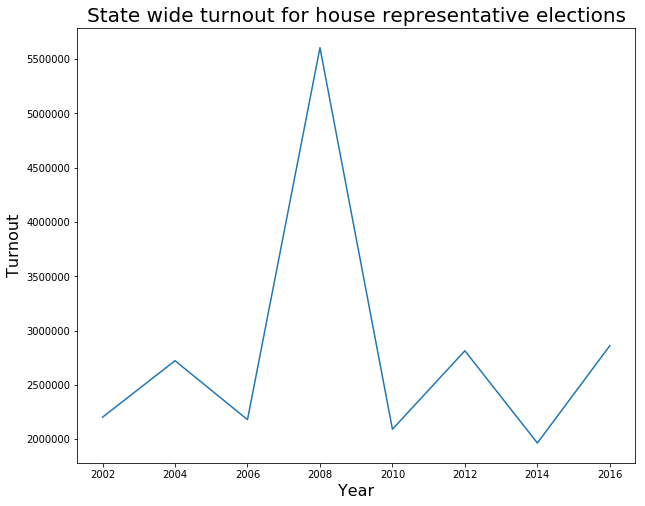

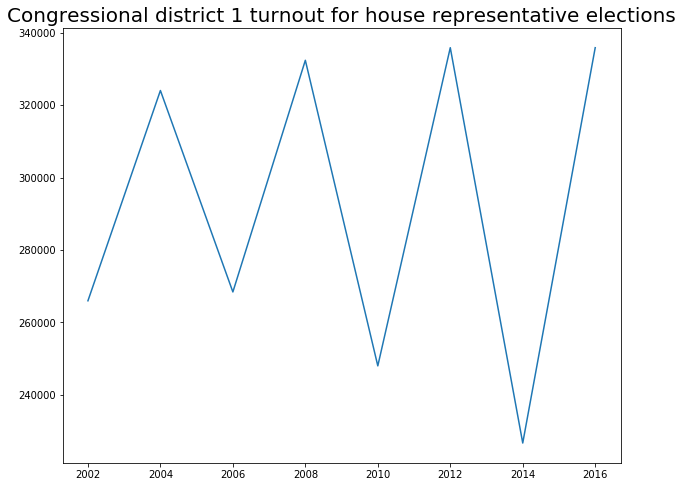

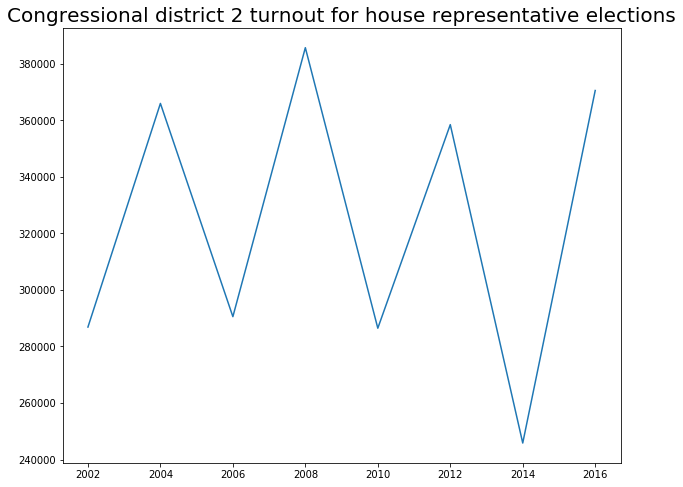

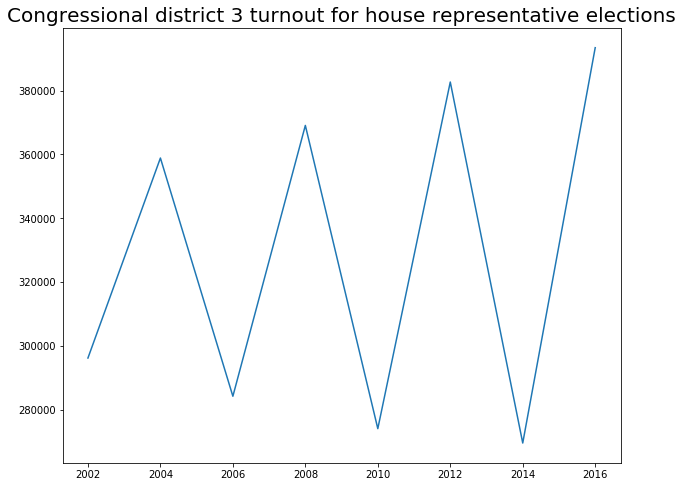

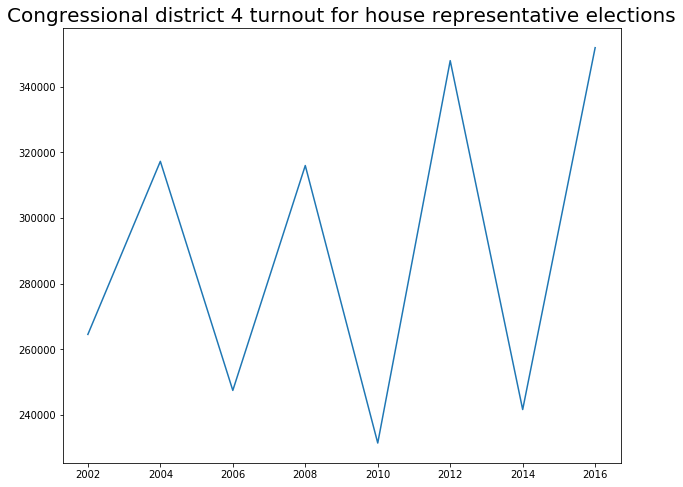

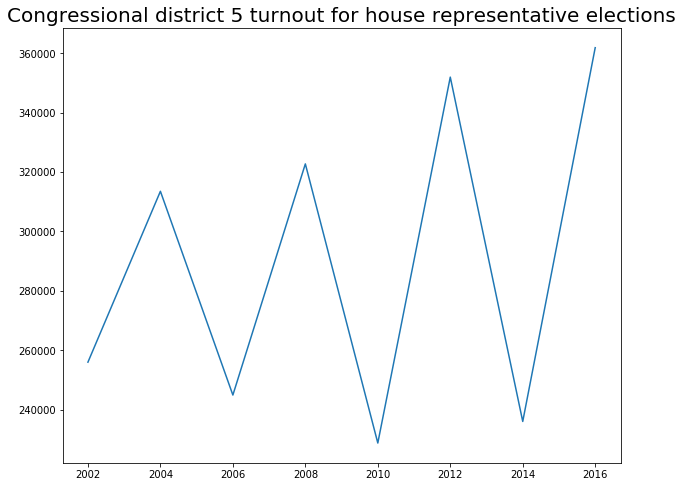

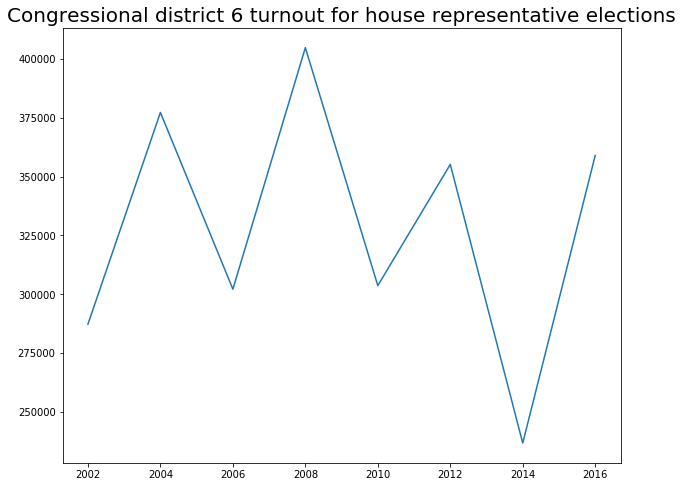

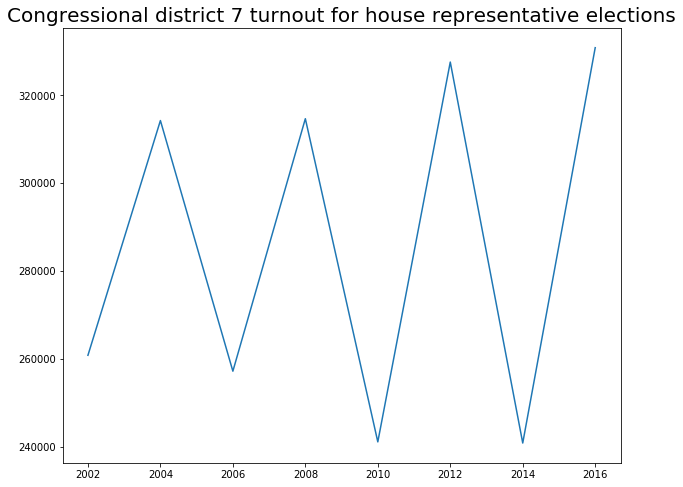

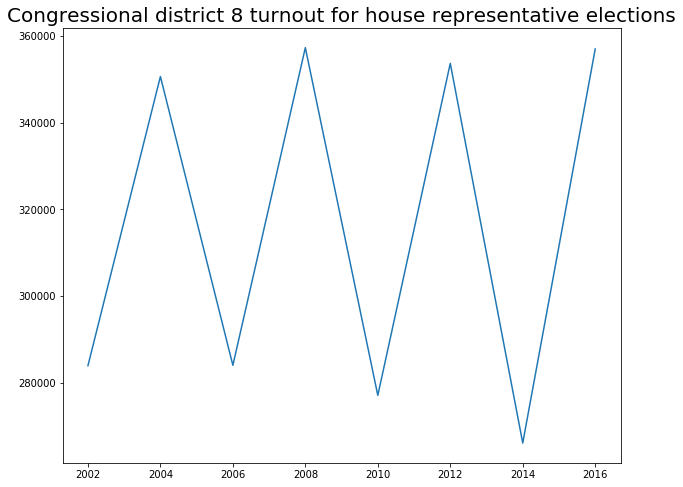

In [28]:
# For example, let us plot turn out by congressional district.
temp=[]
for j in range(0,9):
    y=[]
    for i in range(2002,2018,2):
        y.append(df_master[(df_master['YEAR']==i)&(df_master['CG']==j)].iloc[0]['CONGTOT'])
    temp.append(y)
    
# Plot total  turnout for each congressional district for the years of 2002 to 2016

# State wide turnout for congressional elections
plt.figure(1,figsize=(10,8))
plt.plot(range(2002,2018,2),temp[0])
plt.title('State wide turnout for house representative elections', Size=20)
plt.xlabel('Year', Size= 16)
plt.ylabel('Turnout', Size=16)

# State wide turnout for each congressional district 
for i in range(1,9):
    plt.figure(i+1,figsize=(10,8))
    plt.plot(range(2002,2018,2),temp[i])
    plt.title('Congressional district %d turnout for house representative elections'%(i), Size=20)

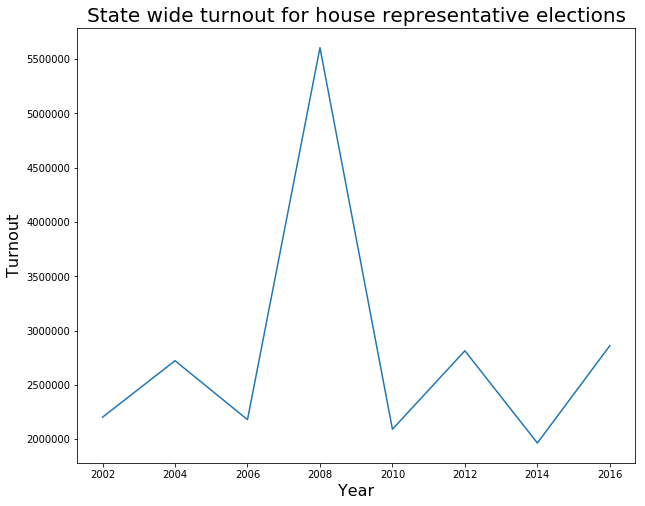

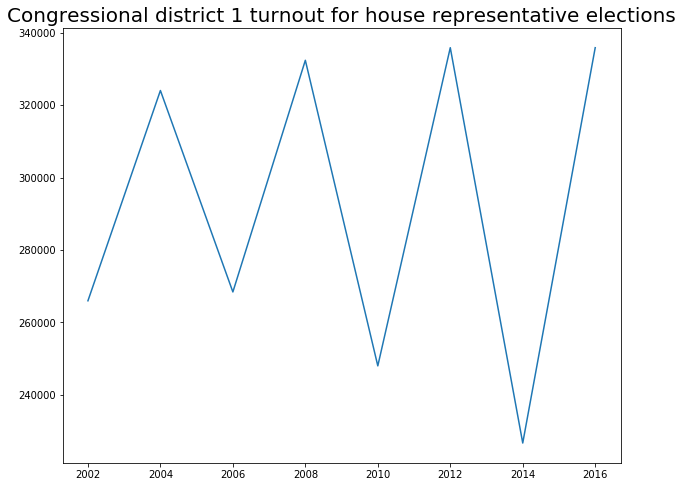

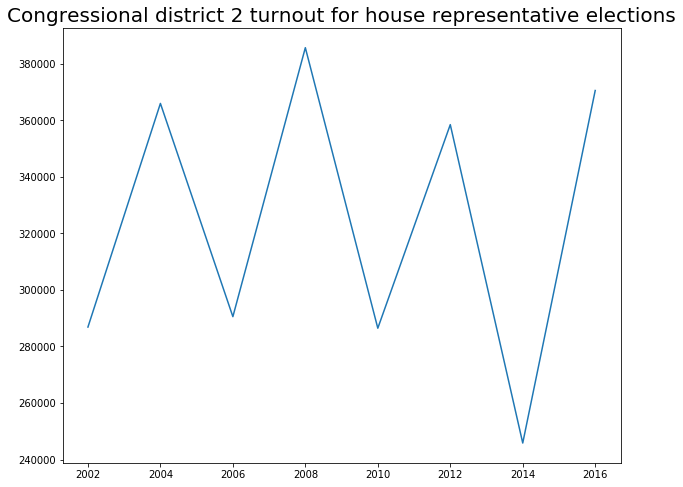

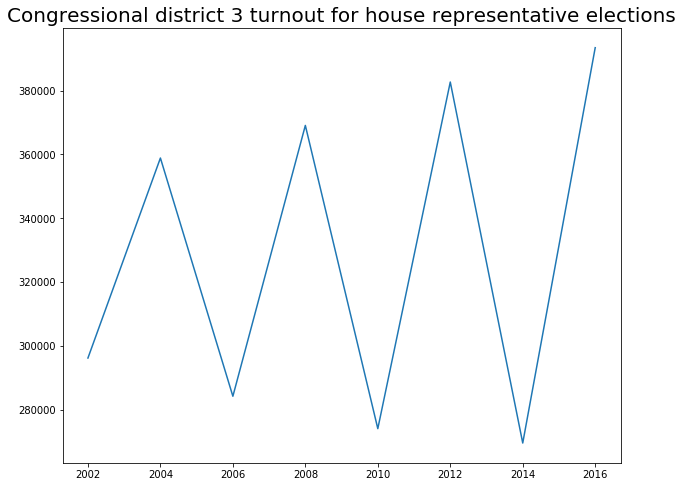

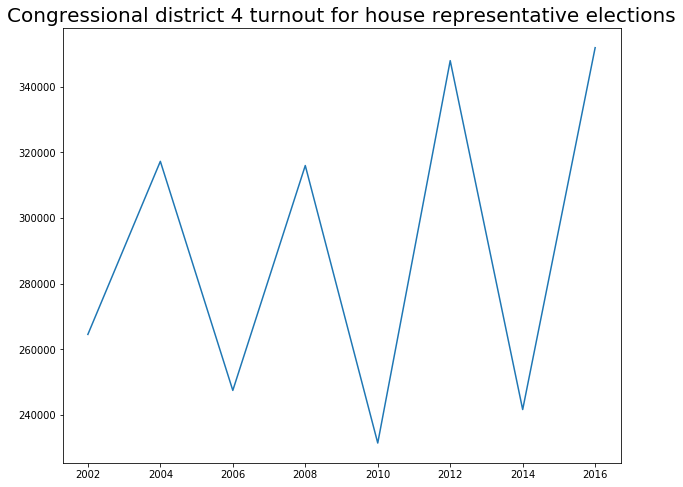

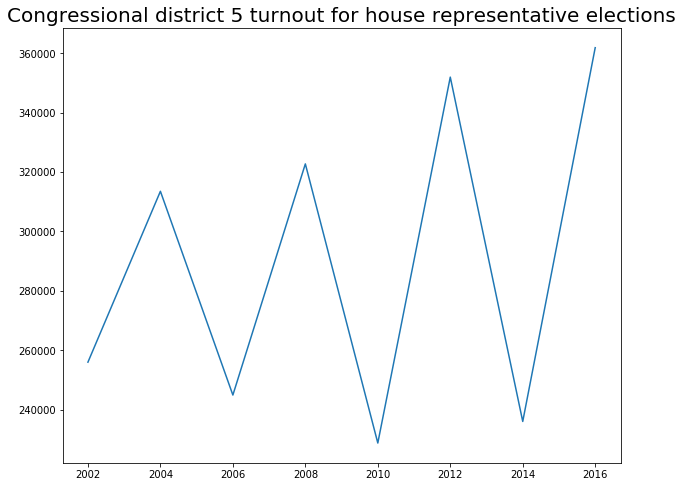

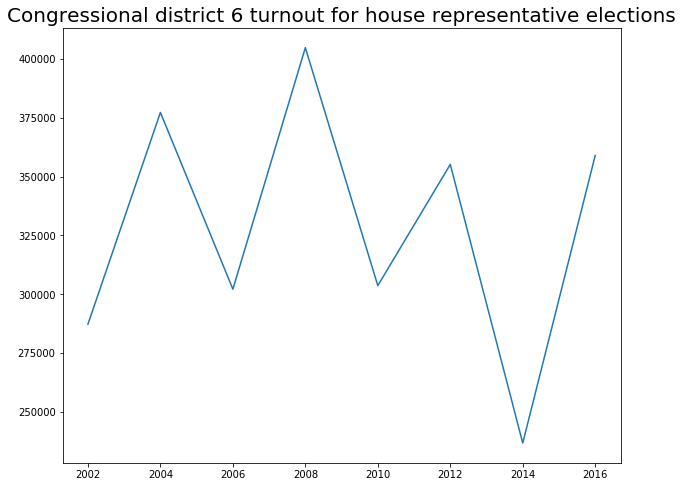

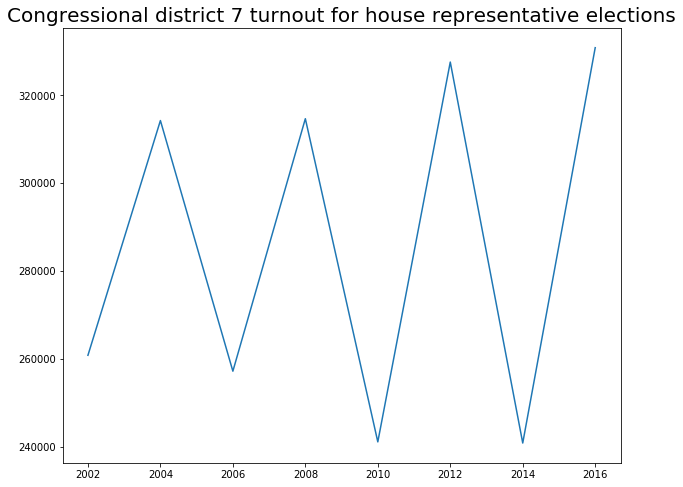

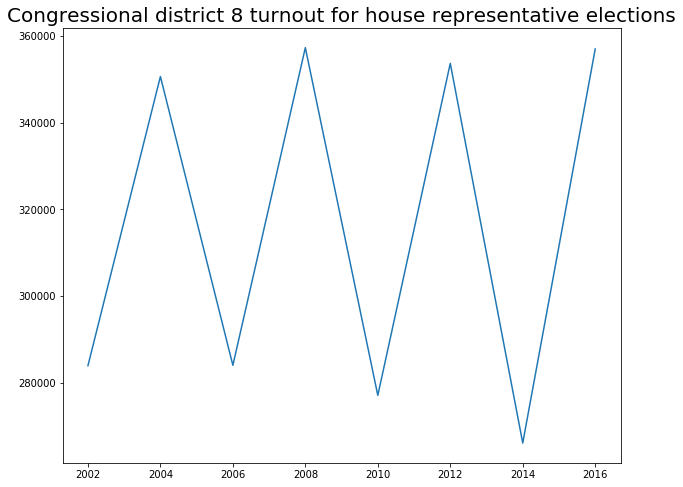

Let us plot just the non-presidential election years as well.

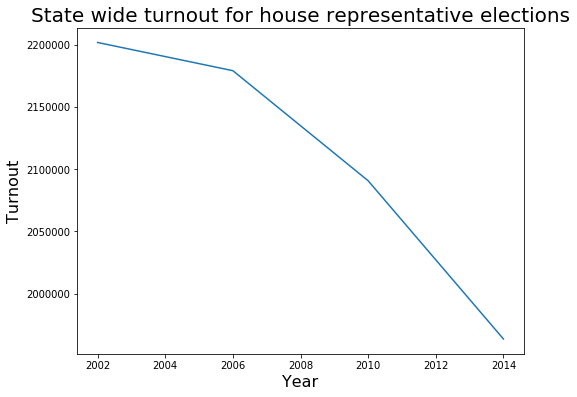

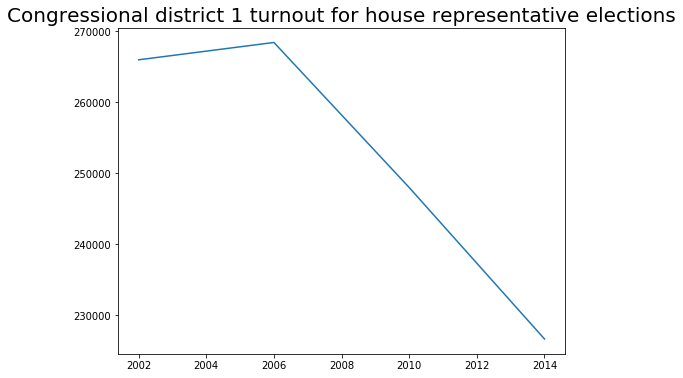

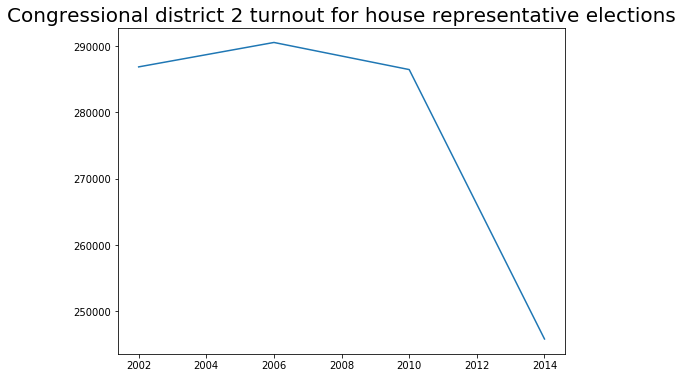

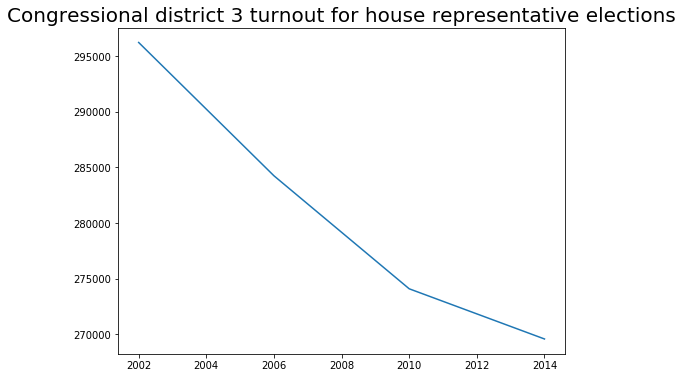

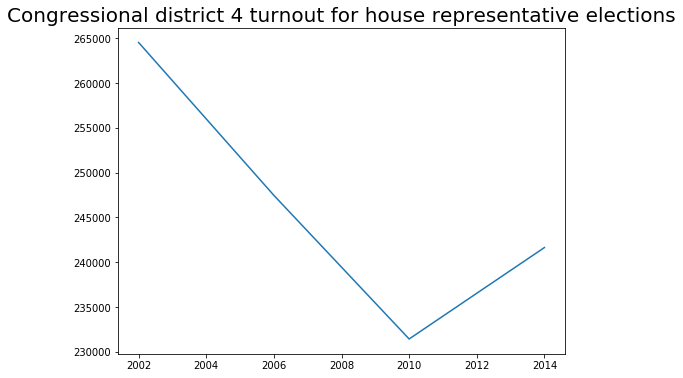

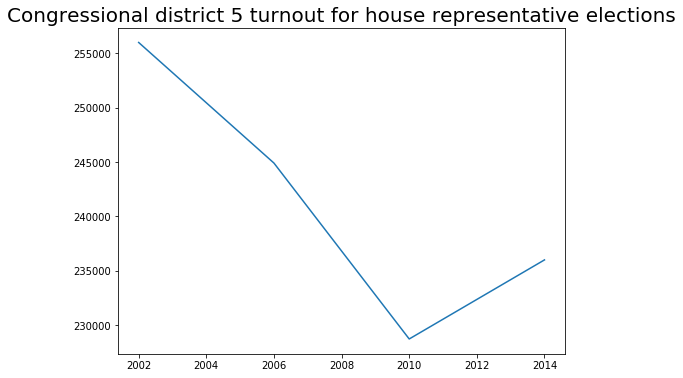

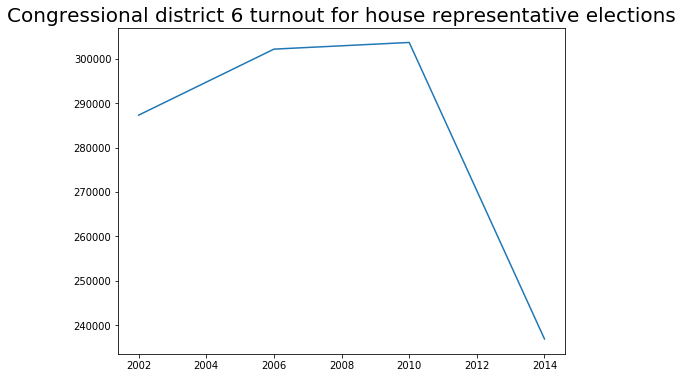

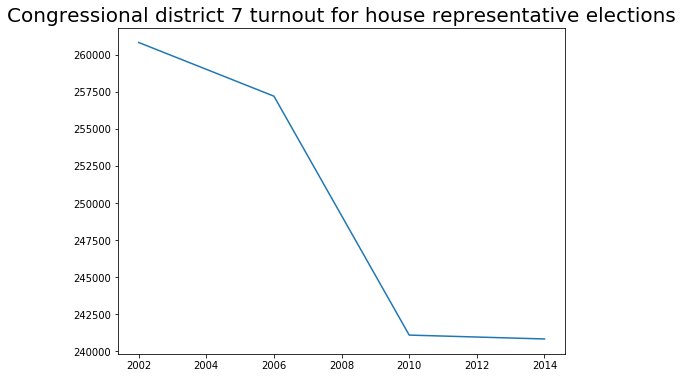

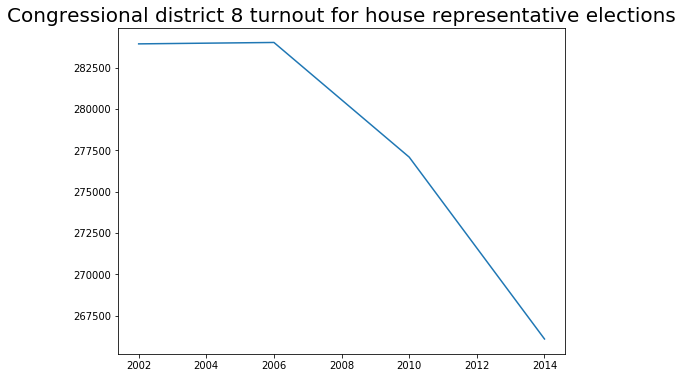

In [27]:
# For example, let us plot turn out by congressional district.
temp=[]
for j in range(0,9):
    y=[]
    for i in range(2002,2018,4):
        y.append(df_master[(df_master['YEAR']==i)&(df_master['CG']==j)].iloc[0]['CONGTOT'])
    temp.append(y)
    
# Plot total  turnout for each congressional district for the years of 2002 to 2016

# State wide turnout for congressional elections
plt.figure(1,figsize=(8,6))
plt.plot(range(2002,2018,4),temp[0])
plt.title('State wide turnout for house representative elections', Size=20)
plt.xlabel('Year', Size= 16)
plt.ylabel('Turnout', Size=16)

# State wide turnout for each congressional district 
for i in range(1,9):
    plt.figure(i+1,figsize=(8,6))
    plt.plot(range(2002,2018,4),temp[i])
    plt.title('Congressional district %d turnout for house representative elections'%(i), Size=20)

Now let us plot the turnouts by party.

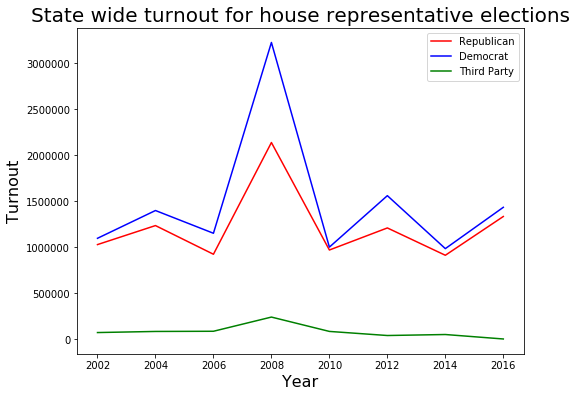

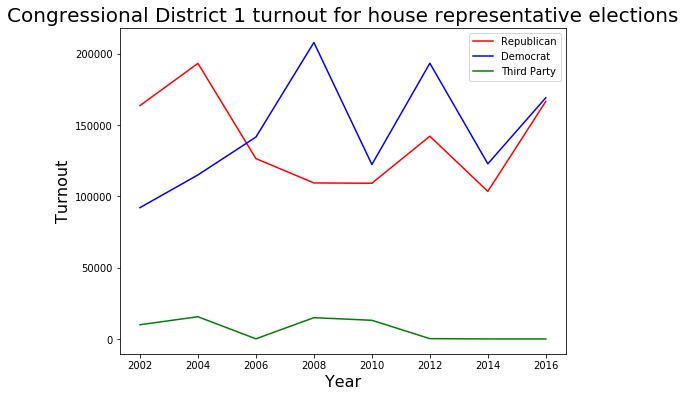

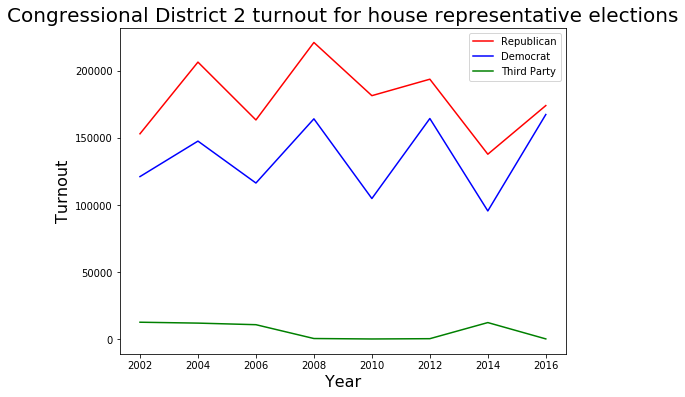

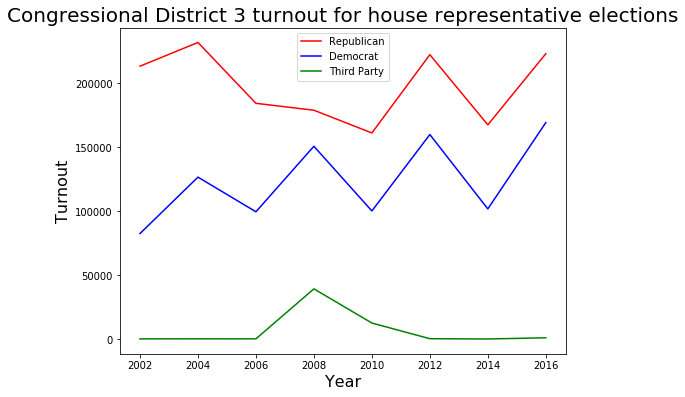

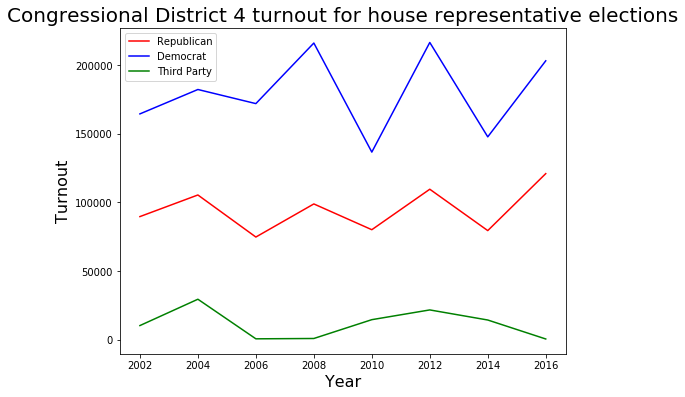

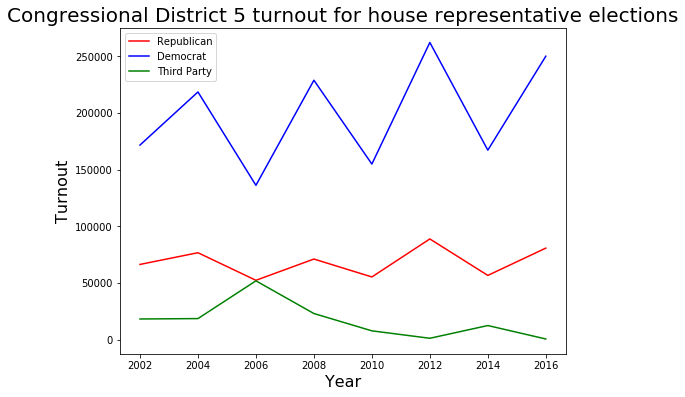

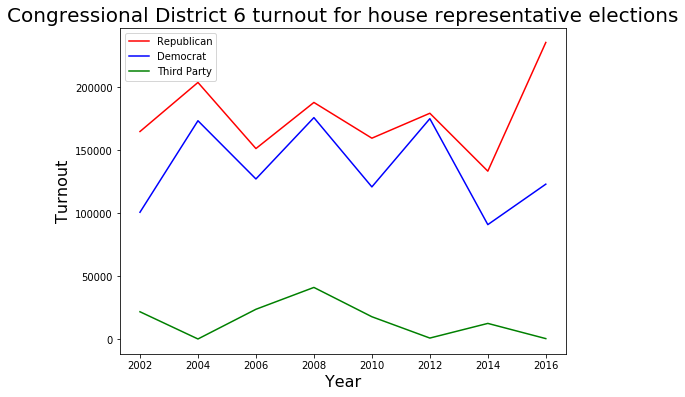

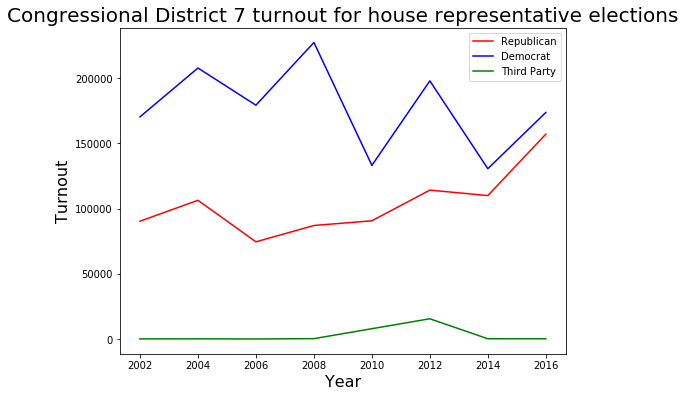

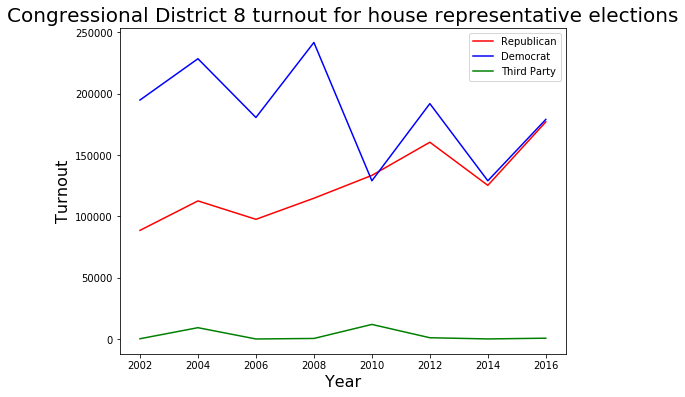

In [38]:
temp=[]
for j in range(0,9):
    rep=[]
    dem=[]
    third=[]
    for i in range(2002,2018,2):
        rep.append(df_master[(df_master['YEAR']==i)&(df_master['CG']==j)].iloc[0]['CONGIR'])
        dem.append(df_master[(df_master['YEAR']==i)&(df_master['CG']==j)].iloc[0]['CONGDFL'])
        third.append(df_master[(df_master['YEAR']==i)&(df_master['CG']==j)].iloc[0]['CONGTH'])
    temp.append([rep,dem,third])
    
# State wide turnout for congressional elections
plt.figure(1,figsize=(8,6))
plt.plot(range(2002,2018,2),temp[0][0],color='red',label='Republican')
plt.plot(range(2002,2018,2),temp[0][1],color='blue',label='Democrat')
plt.plot(range(2002,2018,2),temp[0][2],color='green',label='Third Party')
plt.title('State wide turnout for house representative elections', Size=20)
plt.legend()
plt.xlabel('Year', Size= 16)
plt.ylabel('Turnout', Size=16)


# Turnout for each congressional district, for house representative elections
for i in range(1,9):
    plt.figure(i+1,figsize=(8,6))
    plt.plot(range(2002,2018,2),temp[i][0],color='red',label='Republican')
    plt.plot(range(2002,2018,2),temp[i][1],color='blue',label='Democrat')
    plt.plot(range(2002,2018,2),temp[i][2],color='green',label='Third Party')
    plt.title('Congressional District %d turnout for house representative elections'%(i), Size=20)
    plt.legend()
    plt.xlabel('Year', Size= 16)
    plt.ylabel('Turnout', Size=16)



### Next Task: Classic Machine Learning for State wide data

While waiting for the congressional district data, we can employ classical machine learning methods using the state-wide data we have. We'll employ variety of techniques such as
   - Generalized Linear models
       - Linear Regression (Ordinary Least Squares) 
       - Ridge Regression
       - Lasso Regression
       - Logistic Regression
   - SVM
   - Decision Tree methods
   
### <font color='orange'> Let us first load the data</font>

In [3]:
df_master=pd.read_csv('../Data sets/df_master3.csv')
df_master=df_master.drop(columns=['Unnamed: 0','Unnamed: 0.1'])
df_master.head()

YEAR  CG  CONGTOT  CONGIR  CONGDFL  CONGTH  SENTOT  SENIR  SENDFL  SENTH  \
0  1994   0      NaN     NaN      NaN     NaN     NaN    NaN     NaN    NaN   
1  1994   1      NaN     NaN      NaN     NaN     NaN    NaN     NaN    NaN   
2  1994   2      NaN     NaN      NaN     NaN     NaN    NaN     NaN    NaN   
3  1994   3      NaN     NaN      NaN     NaN     NaN    NaN     NaN    NaN   
4  1994   4      NaN     NaN      NaN     NaN     NaN    NaN     NaN    NaN   

       ...       SEX_1_RACE_9  SEX_2_RACE_1  SEX_2_RACE_2  SEX_2_RACE_4  \
0      ...                0.0           0.0           0.0           0.0   
1      ...                0.0           0.0           0.0           0.0   
2      ...                0.0           0.0           0.0           0.0   
3      ...                0.0           0.0           0.0           0.0   
4      ...                0.0           0.0           0.0           0.0   

   SEX_2_RACE_3  SEX_2_RACE_8  SEX_2_RACE_6  SEX_2_RACE_7  SEX_2_RACE_5  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   SEX_2_RACE_9  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  

[5 rows x 1046 columns]

In [25]:
list(df_master.columns.values)

['YEAR',
 'CG',
 'CONGTOT',
 'CONGIR',
 'CONGDFL',
 'CONGTH',
 'SENTOT',
 'SENIR',
 'SENDFL',
 'SENTH',
 'GOVTOT',
 'GOVIR',
 'GOVDFL',
 'GOVTH',
 'AGE0-18',
 'AGE19-36',
 'AGE37-52',
 'AGE53-70',
 'AGE71-100',
 'INC0-10k',
 'INC10k-20k',
 'INC20k-40k',
 'INC40k-60k',
 'INC60k-100k',
 'INC>100k',
 'EDUC_0.0',
 'EDUC_1.0',
 'EDUC_10.0',
 'EDUC_11.0',
 'EDUC_2.0',
 'EDUC_3.0',
 'EDUC_4.0',
 'EDUC_5.0',
 'EDUC_6.0',
 'EDUC_7.0',
 'EDUC_8.0',
 'EMPSTAT_0.0',
 'EMPSTAT_1.0',
 'EMPSTAT_2.0',
 'EMPSTAT_3.0',
 'HCOVANY_1.0',
 'HCOVANY_2.0',
 'HISPAN_0',
 'HISPAN_1',
 'HISPAN_2',
 'HISPAN_3',
 'HISPAN_4',
 'IND_0.0',
 'IND_10.0',
 'IND_100.0',
 'IND_101.0',
 'IND_102.0',
 'IND_107.0',
 'IND_1070.0',
 'IND_108.0',
 'IND_1080.0',
 'IND_109.0',
 'IND_1090.0',
 'IND_11.0',
 'IND_110.0',
 'IND_111.0',
 'IND_112.0',
 'IND_117.0',
 'IND_1170.0',
 'IND_118.0',
 'IND_1180.0',
 'IND_119.0',
 'IND_1190.0',
 'IND_12.0',
 'IND_120.0',
 'IND_121.0',
 'IND_122.0',
 'IND_127.0',
 'IND_1270.0',
 'IND_128.0',
 '

In [4]:
# There are way to many ind variables so let us throw those out
temp=[]
for d in range(0,10000):
    temp.append('IND_%d.0'%(d))
# Not all of these are in the columns names so let us pick the ones that are
temp2=[]
for d in temp:
    if d in df_master.columns.values:
        temp2.append(d)
# Get rid of these columns then
df_master=df_master.drop(columns=temp2)
list(df_master.columns.values)


['YEAR',
 'CG',
 'CONGTOT',
 'CONGIR',
 'CONGDFL',
 'CONGTH',
 'SENTOT',
 'SENIR',
 'SENDFL',
 'SENTH',
 'GOVTOT',
 'GOVIR',
 'GOVDFL',
 'GOVTH',
 'AGE0-18',
 'AGE19-36',
 'AGE37-52',
 'AGE53-70',
 'AGE71-100',
 'INC0-10k',
 'INC10k-20k',
 'INC20k-40k',
 'INC40k-60k',
 'INC60k-100k',
 'INC>100k',
 'EDUC_0.0',
 'EDUC_1.0',
 'EDUC_10.0',
 'EDUC_11.0',
 'EDUC_2.0',
 'EDUC_3.0',
 'EDUC_4.0',
 'EDUC_5.0',
 'EDUC_6.0',
 'EDUC_7.0',
 'EDUC_8.0',
 'EMPSTAT_0.0',
 'EMPSTAT_1.0',
 'EMPSTAT_2.0',
 'EMPSTAT_3.0',
 'HCOVANY_1.0',
 'HCOVANY_2.0',
 'HISPAN_0',
 'HISPAN_1',
 'HISPAN_2',
 'HISPAN_3',
 'HISPAN_4',
 'MARST_1.0',
 'MARST_2.0',
 'MARST_3.0',
 'MARST_4.0',
 'MARST_5.0',
 'MARST_6.0',
 'METRO_0.0',
 'METRO_1.0',
 'METRO_2.0',
 'METRO_3.0',
 'METRO_4.0',
 'RACE_1',
 'RACE_2',
 'RACE_3',
 'RACE_4',
 'RACE_5',
 'RACE_6',
 'RACE_7',
 'RACE_8',
 'RACE_9',
 'SEX_1',
 'SEX_2',
 'URBAN_1.0',
 'URBAN_2.0',
 'URBAN_nan',
 'METRO_nan',
 'MARST_nan',
 'HCOVANY_nan',
 'EDUC_nan',
 'EDUC_9.0',
 'EMPSTAT_n

In [107]:
# Since we are only looking at state-wide results, let us isolate the pertinent entries from the master data set
df_master['CG']=pd.to_numeric(df_master3['CG'])
df=df_master.iloc[range(27,108,9),:]
df

YEAR  CG    CONGTOT     CONGIR    CONGDFL    CONGTH     SENTOT      SENIR  \
27  2000   0  2383506.0   993371.0  1234204.0  155931.0  2469422.0  1047474.0   
36  2002   0  2201638.0  1029612.0  1097911.0   74115.0  2244640.0  1117139.0   
45  2004   0  2721827.0  1236095.0  1399624.0   86108.0        0.0        0.0   
54  2006   0  2178974.0   924636.0  1152621.0   88114.0  2202772.0   835653.0   
63  2008   0  5605228.0  2138030.0  3224960.0  242238.0  5772882.0  2423802.0   
72  2010   0  2090591.0   970741.0  1002026.0   86455.0        0.0        0.0   
81  2012   0  2813383.0  1210409.0  1560984.0   41990.0  2843207.0   867974.0   
90  2014   0  1963539.0   913539.0   985760.0   52790.0  1981528.0   850227.0   
99  2016   0  2860432.0  1334686.0  1434590.0    4376.0        0.0        0.0   

       SENDFL     SENTH      ...       SEX_1_RACE_9  SEX_2_RACE_1  \
27  1181553.0  240395.0      ...           0.000551      0.454306   
36  1068148.0   59353.0      ...           0.000525      0.447614   
45        0.0       0.0      ...           0.000346      0.445140   
54  1278849.0   72148.0      ...           0.000649      0.442638   
63  2423900.0  925180.0      ...           0.000782      0.442745   
72        0.0       0.0      ...           0.001086      0.434576   
81  1854595.0  120638.0      ...           0.000892      0.429774   
90  1053205.0   78096.0      ...           0.001140      0.426637   
99        0.0       0.0      ...           0.001561      0.418851   

    SEX_2_RACE_2  SEX_2_RACE_4  SEX_2_RACE_3  SEX_2_RACE_8  SEX_2_RACE_6  \
27      0.016694      0.001685      0.005660      0.007920      0.012439   
36      0.017912      0.002526      0.004417      0.006129      0.014765   
45      0.019369      0.002482      0.004963      0.007341      0.015364   
54      0.022191      0.002012      0.005048      0.007999      0.014990   
63      0.023493      0.001500      0.005565      0.007719      0.015126   
72      0.023221      0.002548      0.005100      0.012211      0.017864   
81      0.026536      0.002812      0.005644      0.011733      0.018891   
90      0.028754      0.003172      0.004903      0.011301      0.021059   
99      0.028959      0.002872      0.005694      0.013141      0.021622   

    SEX_2_RACE_7  SEX_2_RACE_5  SEX_2_RACE_9  
27      0.005573      0.000521      0.000513  
36      0.009174      0.000500      0.000744  
45      0.007989      0.000718      0.000553  
54      0.007160      0.000293      0.000621  
63      0.005269      0.000397      0.000840  
72      0.005701      0.000643      0.001430  
81      0.006247      0.000422      0.001110  
90      0.006789      0.000227      0.001202  
99      0.009999      0.000418      0.001497  

[9 rows x 97 columns]

### <font color='burgundy'> Select features to regress on </font>

In this section we select features to regress on. Let us write this in a from of a function that takes the column numbers of the variables we want and gives us our test and training data.

In [28]:
def test_train(column_indeces,party,df):
    '''
    Inputs:
    - column_indeces: an array with the column inceces of the features from df_master that we want to use
    - party: an integer indicating the party. 0 for total, 1 for rep, 2 for dem, 3 for third
    - df is the master data set we want to use
    Returns:
    - training and testing data according to the prescribed attributes
    '''
    
    # First, the response variables
    if party==0:
        y=df['CONGTOT']
    elif party==1:
        y=df['CONGIR']
    elif party==2:
        y=df['CONGDFL']
    else:
        y=df['CONGTH']
        
    #Now build the feature matrix
    X=[]
    for i in range(0,len(y)):
        temp=[]
        for j in column_indeces:
            temp.append(df.iloc[i,:][j])
        X.append(temp)
 
    # Now separate in training and testing data
    c=int(len(y)*0.8) # index for 80% of the data
    y_train=y[0:c]
    y_test=y[c:len(y)]
    X_train=X[0:c]
    X_test=X[c:len(y)]
    
    return [y_train, y_test, X_train, X_test]
    

### <font color='orange'> Generalized Linear Models </font>

### 1. Age, Income and Education
The first set of features we use are age, income and education

In [188]:
#First select training data and test data
# To find column numbers, you can use get_loc
# print(df.columns.get_loc('AGE0-18')) etc

# General
[y_train, y_test,X_train,X_test]=temp=test_train(range(14,36),0,df)
# By party
[y_trainR, y_testR,X_trainR,X_testR]=temp=test_train(range(14,36),1,df)
[y_trainD, y_testD,X_trainD,X_testD]=temp=test_train(range(14,36),2,df)
[y_trainT, y_testT,X_trainT,X_testT]=temp=test_train(range(14,36),3,df)

#### Ordinary Least Squares

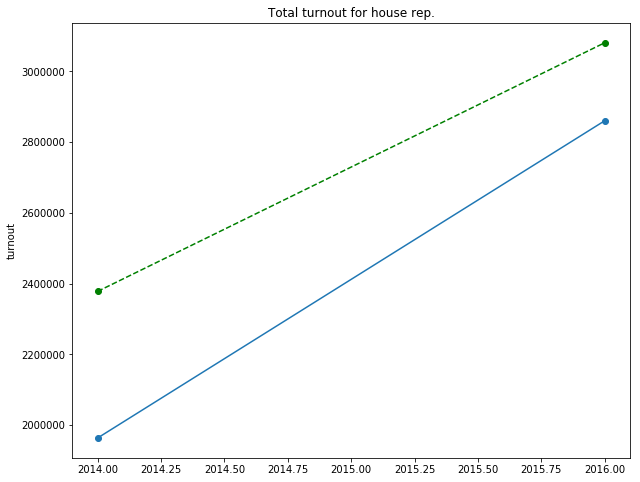

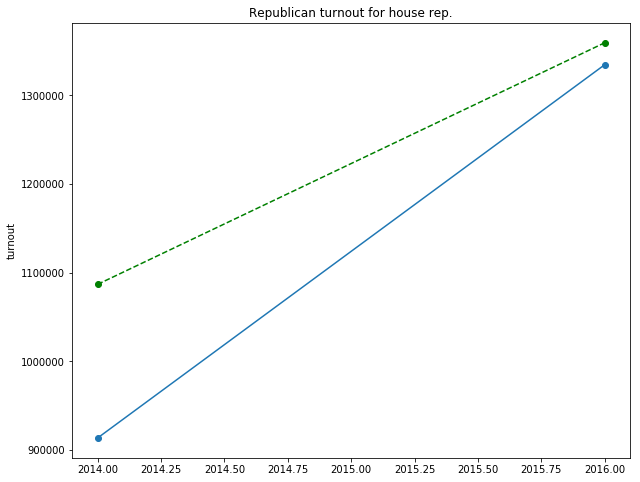

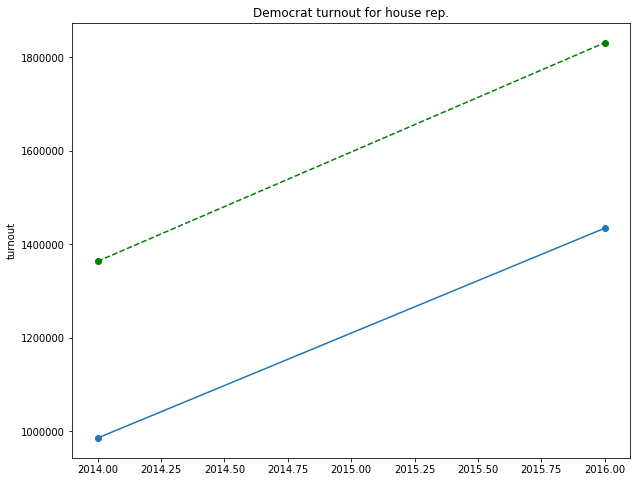

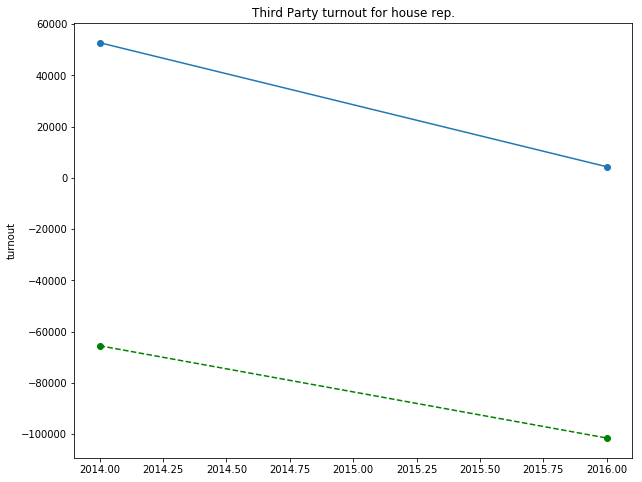

In [189]:
# Ordinary Least Squares Regression
from sklearn import linear_model
reg = linear_model.LinearRegression()

time=[2014,2016]

# State
reg.fit (X_train,y_train)
y_pred=reg.predict(X_test)
# Party
reg.fit (X_trainR,y_trainR)
y_predR=reg.predict(X_testR)
reg.fit (X_trainD,y_trainD)
y_predD=reg.predict(X_testD)
reg.fit (X_trainT,y_trainT)
y_predT=reg.predict(X_testT)

# Plot results
plt.figure(1, figsize=(10,8))
#plt.subplot(2, 1, 1)
plt.plot(time, y_test, 'o-',label='Actual Turnout')
plt.title('Total turnout for house rep.')
plt.plot(time, y_pred, 'go--',label='Predicted Turnout')
plt.ylabel('turnout')

plt.figure(2, figsize=(10,8))
#plt.subplot(2, 1, 1)
plt.plot(time, y_testR, 'o-',label='Actual Turnout')
plt.title('Republican turnout for house rep.')
plt.plot(time, y_predR, 'go--',label='Predicted Turnout')
plt.ylabel('turnout')

plt.figure(3, figsize=(10,8))
#plt.subplot(2, 1, 1)
plt.plot(time, y_testD, 'o-',label='Actual Turnout')
plt.title('Democrat turnout for house rep.')
plt.plot(time, y_predD, 'go--',label='Predicted Turnout')
plt.ylabel('turnout')

plt.figure(4, figsize=(10,8))
#plt.subplot(2, 1, 1)
plt.plot(time, y_testT, 'o-',label='Actual Turnout')
plt.title('Third Party turnout for house rep.')
plt.plot(time, y_predT, 'go--',label='Predicted Turnout')
plt.ylabel('turnout')

plt.show()


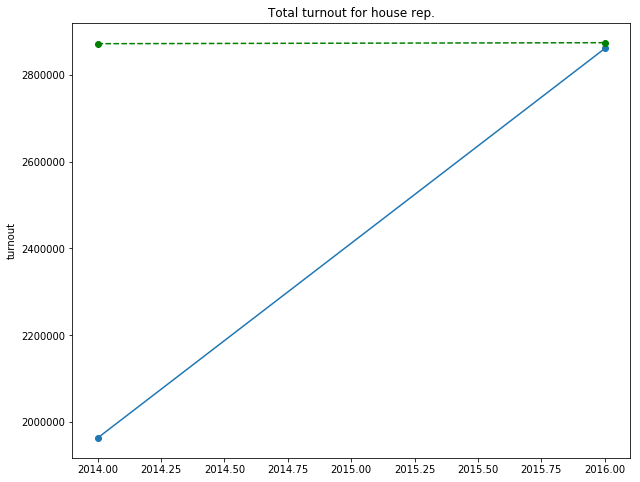

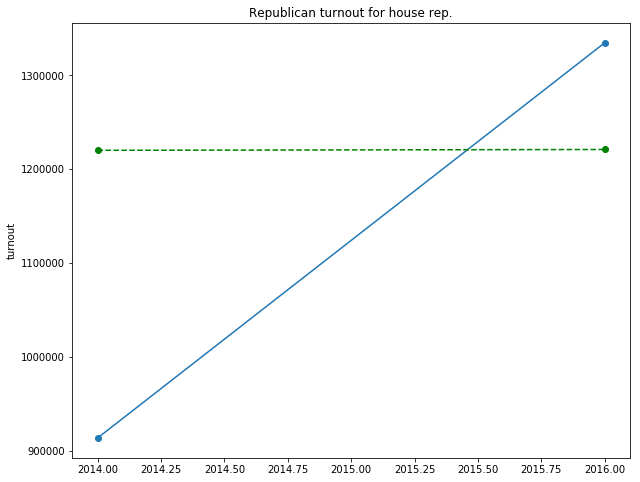

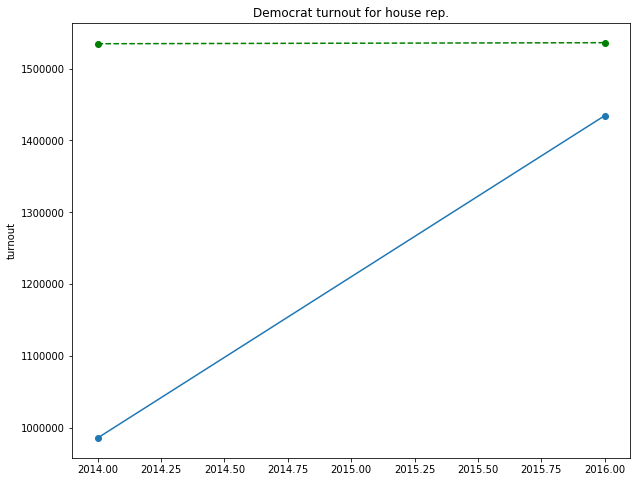

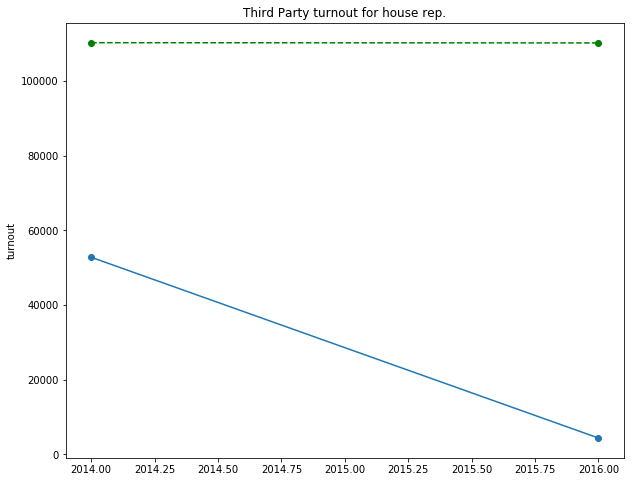

In [192]:
#### Ridge Regression

# Ordinary Least Squares Regression
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .7)

time=[2014,2016]

# State
reg.fit (X_train,y_train)
y_pred=reg.predict(X_test)
# Party
reg.fit (X_trainR,y_trainR)
y_predR=reg.predict(X_testR)
reg.fit (X_trainD,y_trainD)
y_predD=reg.predict(X_testD)
reg.fit (X_trainT,y_trainT)
y_predT=reg.predict(X_testT)

# Plot results
plt.figure(1, figsize=(10,8))
#plt.subplot(2, 1, 1)
plt.plot(time, y_test, 'o-',label='Actual Turnout')
plt.title('Total turnout for house rep.')
plt.plot(time, y_pred, 'go--',label='Predicted Turnout')
plt.ylabel('turnout')

plt.figure(2, figsize=(10,8))
#plt.subplot(2, 1, 1)
plt.plot(time, y_testR, 'o-',label='Actual Turnout')
plt.title('Republican turnout for house rep.')
plt.plot(time, y_predR, 'go--',label='Predicted Turnout')
plt.ylabel('turnout')

plt.figure(3, figsize=(10,8))
#plt.subplot(2, 1, 1)
plt.plot(time, y_testD, 'o-',label='Actual Turnout')
plt.title('Democrat turnout for house rep.')
plt.plot(time, y_predD, 'go--',label='Predicted Turnout')
plt.ylabel('turnout')

plt.figure(4, figsize=(10,8))
#plt.subplot(2, 1, 1)
plt.plot(time, y_testT, 'o-',label='Actual Turnout')
plt.title('Third Party turnout for house rep.')
plt.plot(time, y_predT, 'go--',label='Predicted Turnout')
plt.ylabel('turnout')

plt.show()


#### Logistic Regression

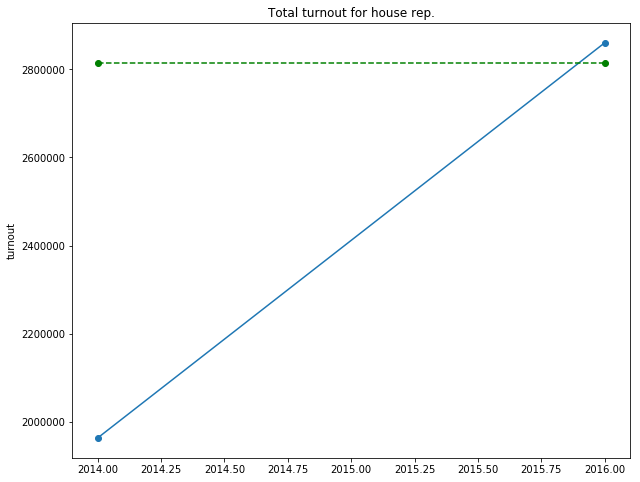

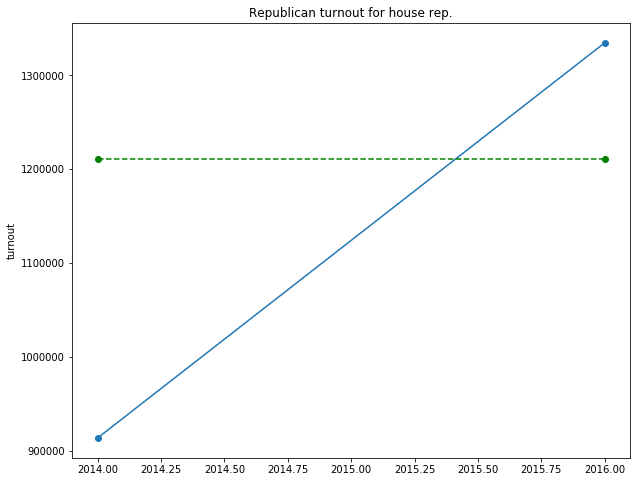

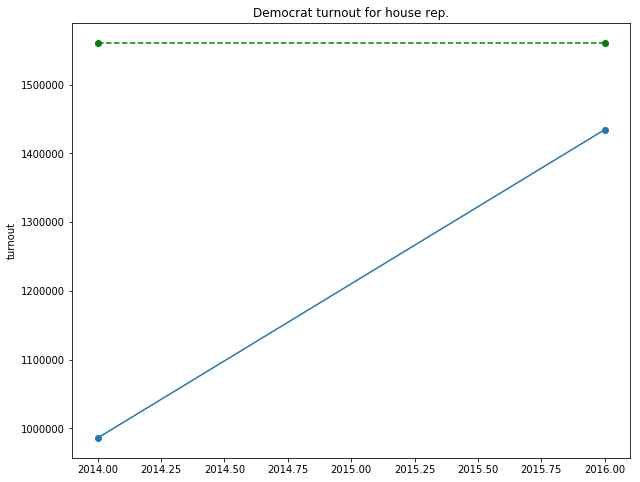

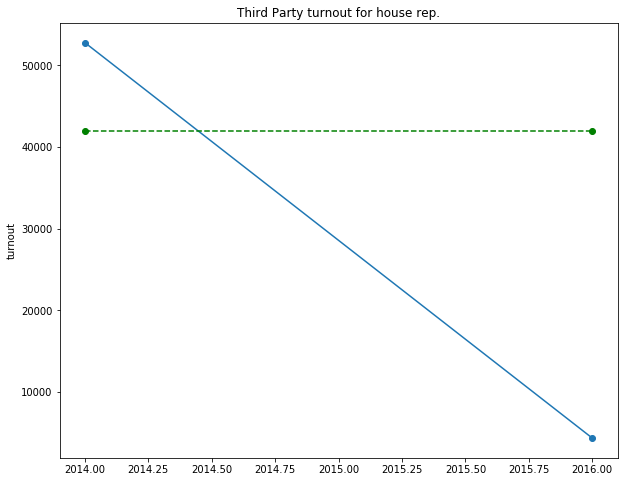

In [194]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')


time=[2014,2016]

# State
reg.fit (X_train,y_train)
y_pred=reg.predict(X_test)
# Party
reg.fit (X_trainR,y_trainR)
y_predR=reg.predict(X_testR)
reg.fit (X_trainD,y_trainD)
y_predD=reg.predict(X_testD)
reg.fit (X_trainT,y_trainT)
y_predT=reg.predict(X_testT)

# Plot results
plt.figure(1, figsize=(10,8))
#plt.subplot(2, 1, 1)
plt.plot(time, y_test, 'o-',label='Actual Turnout')
plt.title('Total turnout for house rep.')
plt.plot(time, y_pred, 'go--',label='Predicted Turnout')
plt.ylabel('turnout')

plt.figure(2, figsize=(10,8))
#plt.subplot(2, 1, 1)
plt.plot(time, y_testR, 'o-',label='Actual Turnout')
plt.title('Republican turnout for house rep.')
plt.plot(time, y_predR, 'go--',label='Predicted Turnout')
plt.ylabel('turnout')

plt.figure(3, figsize=(10,8))
#plt.subplot(2, 1, 1)
plt.plot(time, y_testD, 'o-',label='Actual Turnout')
plt.title('Democrat turnout for house rep.')
plt.plot(time, y_predD, 'go--',label='Predicted Turnout')
plt.ylabel('turnout')

plt.figure(4, figsize=(10,8))
#plt.subplot(2, 1, 1)
plt.plot(time, y_testT, 'o-',label='Actual Turnout')
plt.title('Third Party turnout for house rep.')
plt.plot(time, y_predT, 'go--',label='Predicted Turnout')
plt.ylabel('turnout')

plt.show()



#### <font color='red'> Comments </font> at the end of the day:
None of these methods yield very good results so far but there are a lot of feautures and methods we haven't used yet. Next time, try different combinations of features, or try to use Lasso/Elastic net/f-value to select the best features + SVR + Decision trees. A correlation matrix wouldn't be a bad idea.


## <font color='purple'> October 28th, 2018 </font>

Tasks for today:
- Merge the percent turnout data
- Find and add weather data
- Run some machine learning on state-wide level data

#### Let us first add the percent turnout data

In [5]:
df_gen=pd.read_csv('../Data Sets/general_general.csv')
df_pr=pd.read_csv('../Data Sets/general_primary.csv')
df_gen.head()

Minnesota State General Election Statistics, 1950-2016  \
0                                               Year       
1                                               1950       
2                                               1952       
3                                               1954       
4                                               1956       

                    Unnamed: 1        Unnamed: 2       Unnamed: 3  \
0  Estimate of Eligible Voters  Number of Voters  Percent Turnout   
1                    1,879,000         1,067,967           56.84%   
2                    1,899,000         1,466,326           77.22%   
3                    1,920,000         1,168,101           60.84%   
4                    1,940,000         1,613,138           83.15%   

                             Unnamed: 4  \
0  Number of Election Day Registrations   
1                               No data   
2                               No data   
3                               No data   
4                               No data   

                                      Unnamed: 5  
0  Percent of Voters Registering on Election Day  
1                                        No data  
2                                        No data  
3                                        No data  
4                                        No data

In [6]:
# Let us fix the column names and delete the first row and last
df_gen.columns=['Year', 'Eligible_voters','Number_voters','Per_turnout','EDR','PerEDR']
df_pr.columns=['Year', 'Eligible_voters','Number_voters','Per_turnout','EDR','PerEDR']
df_gen= df_gen.drop([0,35])
df_pr=df_pr.drop([0,35])
df_gen.head()

Year Eligible_voters Number_voters Per_turnout      EDR   PerEDR
1  1950       1,879,000     1,067,967      56.84%  No data  No data
2  1952       1,899,000     1,466,326      77.22%  No data  No data
3  1954       1,920,000     1,168,101      60.84%  No data  No data
4  1956       1,940,000     1,613,138      83.15%  No data  No data
5  1958       1,960,000     1,178,173      60.11%  No data  No data

In [7]:
# Looking good. Now let's add this to the master data set.

df_gen['Year']=pd.to_numeric(df_gen['Year'])
df_pr['Year']=pd.to_numeric(df_pr['Year'])

#Initialise lists to hold percent turnout (pt) and eligible voters (el)
prim_pt=[]
prim_el=[]
gen_pt=[]
gen_el=[]

for y in range(2000,2018,2):
    prim_pt.append(df_pr[df_pr['Year']==y].iloc[0]['Per_turnout'])
    prim_el.append(df_pr[df_pr['Year']==y].iloc[0]['Eligible_voters'])
    gen_pt.append(df_gen[df_gen['Year']==y].iloc[0]['Per_turnout'])
    gen_el.append(df_gen[df_gen['Year']==y].iloc[0]['Eligible_voters'])

In [8]:
# Now let us remove the percent, commas and convert to numeric
prim_pt = [float(item.rstrip('%')) for item in prim_pt]
prim_el = [int(item.replace(',','')) for item in prim_el]
gen_pt = [float(item.rstrip('%')) for item in gen_pt]
gem_el = [int(item.replace(',','')) for item in gen_el]


In [9]:
# Now let us add this to our data set

# Initialise new columns
df_master['prim_pt']=np.full(df_master.shape[0],np.nan)
df_master['prim_el']=np.full(df_master.shape[0],np.nan)
df_master['gen_pt']=np.full(df_master.shape[0],np.nan)
df_master['gen_el']=np.full(df_master.shape[0],np.nan)

# find column indeces
# print(df_master.columns.get_loc('prim_pt'))
for i in range(27,108,9):
    df_master.iloc[i,97]=prim_pt[int(i/9-3)]
    df_master.iloc[i,98]=prim_el[int(i/9-3)]
    df_master.iloc[i,99]=gen_pt[int(i/9-3)]
    df_master.iloc[i,100]=gen_el[int(i/9-3)]
# Quick check
df_master.iloc[range(27,108,9),97:101]


prim_pt    prim_el  gen_pt     gen_el
27    17.19  3506432.0   70.11  3,506,432
36    15.23  3518184.0   64.89  3,518,184
45     7.73  3609185.0   78.77  3,609,185
54    14.02  3667707.0   60.47  3,667,707
63    11.22  3740142.0   78.11  3,740,142
72    15.94  3803192.0   55.83  3,803,192
81     9.32  3861043.0   76.42  3,861,043
90    10.19  3945136.0   50.51  3,945,136
99     7.42  3972330.0   74.72  3,972,330

### State-wide level data

In [126]:
# Looks good. Now let us concentrate on state-wide level data
df_master['CG']=pd.to_numeric(df_master3['CG'])
df=df_master.iloc[range(27,108,9),:]
df

YEAR  CG    CONGTOT     CONGIR    CONGDFL    CONGTH     SENTOT      SENIR  \
27  2000   0  2383506.0   993371.0  1234204.0  155931.0  2469422.0  1047474.0   
36  2002   0  2201638.0  1029612.0  1097911.0   74115.0  2244640.0  1117139.0   
45  2004   0  2721827.0  1236095.0  1399624.0   86108.0        0.0        0.0   
54  2006   0  2178974.0   924636.0  1152621.0   88114.0  2202772.0   835653.0   
63  2008   0  5605228.0  2138030.0  3224960.0  242238.0  5772882.0  2423802.0   
72  2010   0  2090591.0   970741.0  1002026.0   86455.0        0.0        0.0   
81  2012   0  2813383.0  1210409.0  1560984.0   41990.0  2843207.0   867974.0   
90  2014   0  1963539.0   913539.0   985760.0   52790.0  1981528.0   850227.0   
99  2016   0  2860432.0  1334686.0  1434590.0    4376.0        0.0        0.0   

       SENDFL     SENTH    ...      SEX_2_RACE_3  SEX_2_RACE_8  SEX_2_RACE_6  \
27  1181553.0  240395.0    ...          0.005660      0.007920      0.012439   
36  1068148.0   59353.0    ...          0.004417      0.006129      0.014765   
45        0.0       0.0    ...          0.004963      0.007341      0.015364   
54  1278849.0   72148.0    ...          0.005048      0.007999      0.014990   
63  2423900.0  925180.0    ...          0.005565      0.007719      0.015126   
72        0.0       0.0    ...          0.005100      0.012211      0.017864   
81  1854595.0  120638.0    ...          0.005644      0.011733      0.018891   
90  1053205.0   78096.0    ...          0.004903      0.011301      0.021059   
99        0.0       0.0    ...          0.005694      0.013141      0.021622   

    SEX_2_RACE_7  SEX_2_RACE_5  SEX_2_RACE_9  prim_pt    prim_el  gen_pt  \
27      0.005573      0.000521      0.000513    17.19  3506432.0   70.11   
36      0.009174      0.000500      0.000744    15.23  3518184.0   64.89   
45      0.007989      0.000718      0.000553     7.73  3609185.0   78.77   
54      0.007160      0.000293      0.000621    14.02  3667707.0   60.47   
63      0.005269      0.000397      0.000840    11.22  3740142.0   78.11   
72      0.005701      0.000643      0.001430    15.94  3803192.0   55.83   
81      0.006247      0.000422      0.001110     9.32  3861043.0   76.42   
90      0.006789      0.000227      0.001202    10.19  3945136.0   50.51   
99      0.009999      0.000418      0.001497     7.42  3972330.0   74.72   

       gen_el  
27  3,506,432  
36  3,518,184  
45  3,609,185  
54  3,667,707  
63  3,740,142  
72  3,803,192  
81  3,861,043  
90  3,945,136  
99  3,972,330  

[9 rows x 101 columns]

In [132]:
### Let us add weather data on election day (MSP station)
df['high']=[48,36,48,61,71,56,44,53,59]
df['low']=[30,30,36,44,51,34,38,37,39]
df['Prec']=[0.06,0.03,0.06,0,0,0,0.31,0,0]
df['wind']=[24,12,17,15,25,17,20,29,17]

#Let us save this state-wide level data
df.to_csv('df_state_2000')

### <font color='burgundy'> Back to training </font>

In [147]:
# Let us add more features and try lasso and ridge regression or elastic net

list(df.columns.values)
print('Age0-18 location:', df.columns.get_loc('AGE0-18'))
print('URBAN_2.0 location: ',df.columns.get_loc('URBAN_2.0'))
print('prim_pt location: ',df.columns.get_loc('prim_pt'))
print('high to wind locations:',df.columns.get_loc('high'),'-',df.columns.get_loc('wind'))

Age0-18 location: 14
URBAN_2.0 location:  70
prim_pt location:  97
high to wind locations: 101 - 104


In [152]:
# Equipped with these locations, let us prepare our training and test data.

def test_train(column_indeces,party,df):
    '''
    Inputs:
    - column_indeces: an array with the column inceces of the features from df_master that we want to use
    - party: an integer indicating the party. 0 for total, 1 for rep, 2 for dem, 3 for third, 4 for general turnout percent
    - df is the master data set we want to use
    Returns:
    - training and testing data according to the prescribed attributes
    '''
    
    # First, the response variables
    if party==0:
        y=df['CONGTOT'] #general turnout percentage
    elif party==1:
        y=df['CONGIR']
    elif party==2:
        y=df['CONGDFL']
    elif party==3:
        y=df['CONGTH']
    else:
        y=df['gen_pt']
        
    #Now build the feature matrix
    X=[]
    for i in range(0,len(y)):
        temp=[]
        for j in column_indeces:
            temp.append(df.iloc[i,:][j])
        X.append(temp)
 
    # Now separate in training and testing data
    c=int(len(y)*0.8) # index for 80% of the data
    y_train=y[0:c]
    y_test=y[c:len(y)]
    X_train=X[0:c]
    X_test=X[c:len(y)]
    
    return [y_train, y_test, X_train, X_test]


#### <font color='orange'> Select features </font>

In [204]:
temp=list(range(14,71))+[97,101,102,103,104] #column indeces of features we want to use
[y_train, y_test,X_train, X_test]=test_train(temp, 4, df)

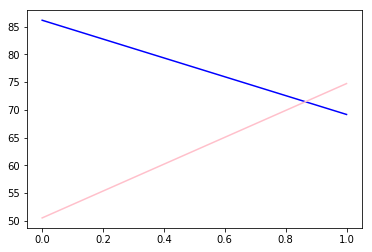

In [159]:
# Lasso
from sklearn import linear_model

clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
plt.plot([0,1],y_pred,color='blue')
plt.plot([0,1],y_test, color='pink')

# That's pretty bad

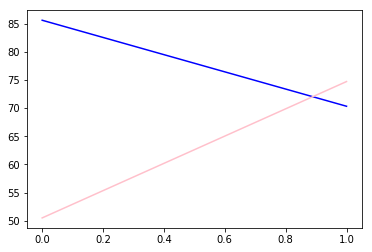

In [160]:
# Ridge
from sklearn.linear_model import Ridge

clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
plt.plot([0,1],y_pred,color='blue')
plt.plot([0,1],y_test, color='pink')

#Same as lasso

#### Let us try some feature selection first

In [205]:
# kbest

from sklearn.feature_selection import SelectKBest, f_regression

y_train = np.asarray(y_train,dtype=np.float64)

X_new = SelectKBest(f_regression, k=20).fit_transform(np.asarray(X_train), y_train)
indeces=SelectKBest(f_regression,k=20).fit(np.asarray(X_train),y_train).get_support(True) #Selected features
indeces=np.asarray(indeces).astype(int)


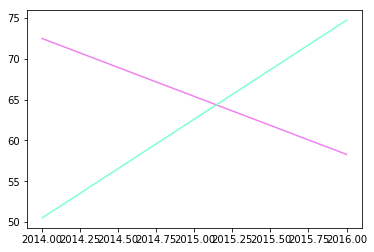

In [206]:
# Now train using the new features

# Ordinary Least Squares

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit (X_new, y_train)
X_test=np.asarray(X_test)[:,indeces]
y_pred=reg.predict(X_test)

plt.plot([2014,2016],y_pred,color='red',label='predicted')
plt.plot([2014,2016],y_test,color='green',label='actual')
plt.legend()

# Still quite bad

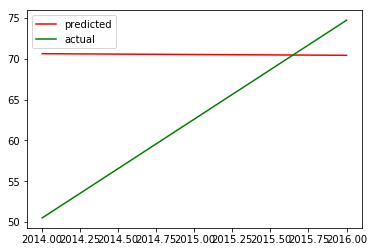

In [218]:
# SVR
from sklearn.svm import SVR
np.random.seed(0)
clf = SVR(gamma=0.001, C=1.0, epsilon=0.2)
clf.fit(X_new, y_train)
y_pred=clf.predict(X_test)


plt.plot([2014,2016],y_pred,color='red',label='predicted')
plt.plot([2014,2016],y_test,color='green',label='actual')
plt.legend()

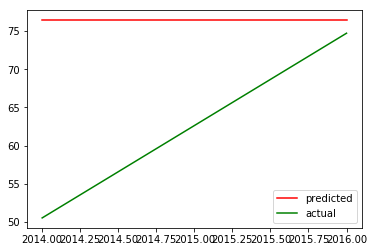

In [219]:
# Decision Tree

from sklearn import tree

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_new, y_train)
y_pred=clf.predict(X_test)

plt.plot([2014,2016],y_pred,color='red',label='predicted')
plt.plot([2014,2016],y_test,color='green',label='actual')
plt.legend()

In [11]:
# Save data set so far 
df_master.to_csv('df_master6.csv')

### <font color='burgundy'> October 29, 2018</font>

Using the general turnout numbers, we compute the percentages of turnout for each congressional district.

### <font color='red'> Important Note </font> 
The general turnout differs from CONGTOT (probably because many people just vote for president). This difference is recorded in a variable called 'dif_tot'.

In [5]:
df_master=pd.read_csv('df_master6.csv')

In [6]:
# First, let us add some empty columns to hold our new variables.
df_master['congtot_pt']=np.full(df_master.shape[0],np.nan)
df_master['congir_pt']=np.full(df_master.shape[0],np.nan)
df_master['congdfl_pt']=np.full(df_master.shape[0],np.nan)
df_master['sentot_pt']=np.full(df_master.shape[0],np.nan)
df_master['senir_pt']=np.full(df_master.shape[0],np.nan)
df_master['sendfl_pt']=np.full(df_master.shape[0],np.nan)
df_master['govtot_pt']=np.full(df_master.shape[0],np.nan)
df_master['govir_pt']=np.full(df_master.shape[0],np.nan)
df_master['govdfl_pt']=np.full(df_master.shape[0],np.nan)
df_master['dif_tot']=np.full(df_master.shape[0],np.nan)

#Strip gen_el field from commas
# df_master['gen_el']=df_master['gen_el'].str.replace(',','')
# Convert to integer
df_master['gen_el']=pd.to_numeric(df_master['gen_el'])
df_master['gen_pt']=pd.to_numeric(df_master['gen_pt'])

# Now compute percent turnout by congressional district for the years 2000-20016
for i in range(27,108,9):
    temp=df_master.iloc[i,:]
    df_master.loc[i,'dif_tot']=temp['gen_pt']/100*temp['gen_el']-temp['CONGTOT']
    total=temp['CONGTOT'] #Total number of voters that turned up
    df_master.loc[i:i+8,'congtot_pt']=df_master.loc[i:i+8,'CONGTOT']/total
    df_master.loc[i:i+8,'congir_pt']=np.divide(df_master.loc[i:i+8,'CONGIR'],df_master.loc[i:i+8,'CONGTOT'])
    df_master.loc[i:i+8,'congdfl_pt']=np.divide(df_master.loc[i:i+8,'CONGDFL'],df_master.loc[i:i+8,'CONGTOT'])
    df_master.loc[i:i+8,'sentot_pt']=df_master.loc[i:i+8,'SENTOT']/total
    df_master.loc[i:i+8,'senir_pt']=np.divide(df_master.loc[i:i+8,'SENIR'],df_master.loc[i:i+8,'SENTOT'])
    df_master.loc[i:i+8,'sendfl_pt']=np.divide(df_master.loc[i:i+8,'SENDFL'],df_master.loc[i:i+8,'SENTOT'])
    df_master.loc[i:i+8,'govtot_pt']=df_master.loc[i:i+8,'GOVTOT']/total
    df_master.loc[i:i+8,'govir_pt']=np.divide(df_master.loc[i:i+8,'GOVIR'],df_master.loc[i:i+8,'GOVTOT'])
    df_master.loc[i:i+8,'govdfl_pt']=np.divide(df_master.loc[i:i+8,'GOVDFL'],df_master.loc[i:i+8,'GOVTOT'])     
    

C:\Users\Michelle Pin\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Michelle Pin\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Michelle Pin\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Michelle Pin\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


In [52]:
# Save this

df_master.to_csv('df_master_percent')

### <font color='burgundy'> October 30th, 2018 </font>

### Next, merge with census data
Since we have so little data points, we can try and use the state-wide level census data from past years (every decade) so as to add a few more entries. Of course, this cannot be used for the congressional district level predictions, but we can use it to predict general turnout outcome.

In [25]:
df_master=pd.read_csv('df_master_percent')
df_census=pd.read_csv('clean_census_data.csv')

In [26]:
list(df_census.columns.values)
# Let us drop some columns we won't be using
df_census=df_census.drop(columns=['EDUC_9.0'])
print(df_master.columns.get_loc('IND_nan'))
print(df_master.columns.get_loc('SEX_2_RACE_9'))

# Let us drop some columns from df_master (we might add those later)
df_master=df_master.drop(df_master.columns[79:98], axis=1)

79
97


In [204]:
list(df_census.columns.values)

['Unnamed: 0',
 'AGE0-17',
 'AGE18-34',
 'AGE35-49',
 'AGE50-69',
 'AGE70-100',
 'EDUC_0.0',
 'EDUC_1.0',
 'EDUC_10.0',
 'EDUC_11.0',
 'EDUC_2.0',
 'EDUC_3.0',
 'EDUC_4.0',
 'EDUC_5.0',
 'EDUC_6.0',
 'EDUC_7.0',
 'EDUC_8.0',
 'EMPSTAT_0.0',
 'EMPSTAT_1.0',
 'EMPSTAT_2.0',
 'EMPSTAT_3.0',
 'HCOVANY_1.0',
 'HCOVANY_2.0',
 'HISPAN_0',
 'HISPAN_1',
 'HISPAN_2',
 'HISPAN_3',
 'HISPAN_4',
 'INC0-10k',
 'INC10k-20k',
 'INC20k-40k',
 'INC40k-60k',
 'INC60k-100k',
 'INC>100k',
 'MARST_1.0',
 'MARST_2.0',
 'MARST_3.0',
 'MARST_4.0',
 'MARST_5.0',
 'MARST_6.0',
 'METRO_0.0',
 'METRO_1.0',
 'METRO_2.0',
 'METRO_3.0',
 'METRO_4.0',
 'RACE_1',
 'RACE_2',
 'RACE_3',
 'RACE_4',
 'RACE_5',
 'RACE_6',
 'RACE_7',
 'RACE_8',
 'RACE_9',
 'SEX_1',
 'SEX_2',
 'URBAN_1.0',
 'URBAN_2.0',
 'YEAR',
 'CG']

In [116]:
list(df_master.columns.values)

['Unnamed: 0',
 'YEAR',
 'CG',
 'CONGTOT',
 'CONGIR',
 'CONGDFL',
 'CONGTH',
 'SENTOT',
 'SENIR',
 'SENDFL',
 'SENTH',
 'GOVTOT',
 'GOVIR',
 'GOVDFL',
 'GOVTH',
 'AGE0-18',
 'AGE19-36',
 'AGE37-52',
 'AGE53-70',
 'AGE71-100',
 'INC0-10k',
 'INC10k-20k',
 'INC20k-40k',
 'INC40k-60k',
 'INC60k-100k',
 'INC>100k',
 'EDUC_0.0',
 'EDUC_1.0',
 'EDUC_10.0',
 'EDUC_11.0',
 'EDUC_2.0',
 'EDUC_3.0',
 'EDUC_4.0',
 'EDUC_5.0',
 'EDUC_6.0',
 'EDUC_7.0',
 'EDUC_8.0',
 'EMPSTAT_0.0',
 'EMPSTAT_1.0',
 'EMPSTAT_2.0',
 'EMPSTAT_3.0',
 'HCOVANY_1.0',
 'HCOVANY_2.0',
 'HISPAN_0',
 'HISPAN_1',
 'HISPAN_2',
 'HISPAN_3',
 'HISPAN_4',
 'MARST_1.0',
 'MARST_2.0',
 'MARST_3.0',
 'MARST_4.0',
 'MARST_5.0',
 'MARST_6.0',
 'METRO_0.0',
 'METRO_1.0',
 'METRO_2.0',
 'METRO_3.0',
 'METRO_4.0',
 'RACE_1',
 'RACE_2',
 'RACE_3',
 'RACE_4',
 'RACE_5',
 'RACE_6',
 'RACE_7',
 'RACE_8',
 'RACE_9',
 'SEX_1',
 'SEX_2',
 'URBAN_1.0',
 'URBAN_2.0',
 'URBAN_nan',
 'METRO_nan',
 'MARST_nan',
 'HCOVANY_nan',
 'EDUC_nan',
 'EDUC_9.

In [27]:
# Let us drop a few more unwanted columns
print(df_master.columns.get_loc('URBAN_nan'))
print(df_master.columns.get_loc('EMPSTAT_nan'))
df_master=df_master.drop(df_master.columns[72:79], axis=1)


72
78


In [28]:
list(df_master.columns.values)
df_master=df_master.drop(columns=['Unnamed: 0'])
print(df_master.columns.get_loc('AGE0-18'))
print(df_master.columns.get_loc('URBAN_2.0'))

14
70


In [29]:
# Rename columns names in df_master data to census.
print(df_census.columns.get_loc('AGE0-17'))
print(df_census.columns.get_loc('AGE70-100'))
df_master.rename(columns={'AGE0-18':'AGE0-17', 'AGE19-36':'AGE18-34', 'AGE37-52':'AGE35-49', 'AGE53-70':'AGE50-69','AGE71-100':'AGE70-100'}, inplace=True)

1
5


In [30]:
df_master.columns.values

array(['YEAR', 'CG', 'CONGTOT', 'CONGIR', 'CONGDFL', 'CONGTH', 'SENTOT',
       'SENIR', 'SENDFL', 'SENTH', 'GOVTOT', 'GOVIR', 'GOVDFL', 'GOVTH',
       'AGE0-17', 'AGE18-34', 'AGE35-49', 'AGE50-69', 'AGE70-100',
       'INC0-10k', 'INC10k-20k', 'INC20k-40k', 'INC40k-60k',
       'INC60k-100k', 'INC>100k', 'EDUC_0.0', 'EDUC_1.0', 'EDUC_10.0',
       'EDUC_11.0', 'EDUC_2.0', 'EDUC_3.0', 'EDUC_4.0', 'EDUC_5.0',
       'EDUC_6.0', 'EDUC_7.0', 'EDUC_8.0', 'EMPSTAT_0.0', 'EMPSTAT_1.0',
       'EMPSTAT_2.0', 'EMPSTAT_3.0', 'HCOVANY_1.0', 'HCOVANY_2.0',
       'HISPAN_0', 'HISPAN_1', 'HISPAN_2', 'HISPAN_3', 'HISPAN_4',
       'MARST_1.0', 'MARST_2.0', 'MARST_3.0', 'MARST_4.0', 'MARST_5.0',
       'MARST_6.0', 'METRO_0.0', 'METRO_1.0', 'METRO_2.0', 'METRO_3.0',
       'METRO_4.0', 'RACE_1', 'RACE_2', 'RACE_3', 'RACE_4', 'RACE_5',
       'RACE_6', 'RACE_7', 'RACE_8', 'RACE_9', 'SEX_1', 'SEX_2',
       'URBAN_1.0', 'URBAN_2.0', 'prim_pt', 'prim_el', 'gen_pt', 'gen_el',
       'congtot_pt', 'cong

In [44]:
print(df_master.columns.get_loc('AGE0-17'))
print(df_master.columns.get_loc('URBAN_2.0'))
temp=['YEAR','CG']
for i in range(14,71):
    temp.append(df_master.columns[i])
df_cen=df_census[temp] # put columns in the right order

14
70


In [32]:
# Next, we go through df_master and add the relevant data when it exists. Because of the nature of the data, we might have
# to do that for each 'chunk of years separately'

print(df_master.columns.get_loc('AGE0-17'))
print(df_master.columns.get_loc('URBAN_2.0'))

df_cen['YEAR']=pd.to_numeric(df_cen['YEAR'])
df_cen['CG']=pd.to_numeric(df_cen['CG'])

# First let us do 1990. Let us add another 8 rows for 1990
s2 = pd.Series(np.full(df_master.shape[1],np.nan), index=df_master.columns) #empty row

for i in range(0,9):
    df_master=df_master.append(s2,ignore_index=True)

14
70


In [33]:
df_master.shape

(117, 85)

In [52]:
df_cen['YEAR']=pd.to_numeric(df_cen['YEAR'])
df_cen['CG']=pd.to_numeric(df_cen['CG'])

block=df_cen[df_cen['YEAR']==1990]

temp.remove('YEAR') #We don't need these anymore
temp.remove('CG')

for i in [0,1,2,3,4,5,7,8]:
    row=block[block['CG']==i]
    df_master.loc[108+i,'YEAR']=1990
    df_master.loc[108+i,'CG']=i
    for j in temp:
        df_master.loc[108+i,j]=row.iloc[0][j]

### Now add the years before 1990

In [57]:
block=df_cen[df_cen['YEAR']<1990]
print(block.shape) # So we need 13 more lines

s2 = pd.Series(np.full(df_master.shape[1],np.nan), index=df_master.columns) #empty row

for i in range(0,13):
    df_master=df_master.append(s2,ignore_index=True)
    
df_master.shape

(13, 59)


(143, 85)

In [58]:
for i in range(0,13):
    df_master.loc[117+i,'YEAR']=block.loc[i,'YEAR']
    df_master.loc[117+i,'CG']=block.loc[i,'CG']
    for j in temp:
        df_master.loc[117+i,j]=block.loc[i,j]

In [60]:
df_master.loc[108:130,['YEAR','CG']+temp]

YEAR   CG   AGE0-17  AGE18-34  AGE35-49  AGE50-69  AGE70-100  INC0-10k  \
108  1990.0  0.0  0.282009  0.228656  0.196611  0.185244   0.107480  0.438309   
109  1990.0  1.0  0.284517  0.273269  0.218571  0.157918   0.065726  0.321531   
110  1990.0  2.0  0.289417  0.296760  0.237689  0.130562   0.045572  0.289375   
111  1990.0  3.0  0.291148  0.298377  0.235810  0.139235   0.035431  0.296156   
112  1990.0  4.0  0.254285  0.292675  0.222113  0.158506   0.072422  0.327307   
113  1990.0  5.0  0.226230  0.305463  0.223363  0.164353   0.080592  0.310937   
114     NaN  NaN       NaN       NaN       NaN       NaN        NaN       NaN   
115  1990.0  7.0  0.309762  0.267925  0.197493  0.156219   0.068601  0.413519   
116  1990.0  8.0  0.253007  0.224567  0.216922  0.195209   0.110296  0.447557   
117  1850.0  0.0  0.481481  0.314815  0.185185  0.018519   0.000000       NaN   
118  1860.0  0.0  0.460327  0.324652  0.153240  0.052695   0.009085       NaN   
119  1870.0  0.0  0.468289  0.271773  0.168379  0.080840   0.010719       NaN   
120  1880.0  0.0  0.435294  0.305503  0.150366  0.095477   0.013359       NaN   
121  1900.0  0.0  0.405842  0.300195  0.173483  0.098748   0.021733       NaN   
122  1910.0  0.0  0.368232  0.317728  0.175805  0.114286   0.023949       NaN   
123  1920.0  0.0  0.356016  0.305875  0.180097  0.129957   0.028055       NaN   
124  1930.0  0.0  0.333176  0.276106  0.203786  0.149699   0.037233       NaN   
125  1940.0  0.0  0.298462  0.281952  0.202263  0.170656   0.046668       NaN   
126  1950.0  0.0  0.389130  0.237655  0.190152  0.147156   0.035906  1.000000   
127  1960.0  0.0  0.361409  0.204856  0.183872  0.185346   0.064517  0.963312   
128  1970.0  0.0  0.352826  0.246394  0.159213  0.168829   0.072739  0.837427   
129  1980.0  0.0  0.278443  0.305635  0.158309  0.175342   0.082271  0.575629   
130     NaN  NaN       NaN       NaN       NaN       NaN        NaN       NaN   

     INC10k-20k  INC20k-40k    ...        RACE_4    RACE_5    RACE_6  \
108    0.275503    0.226145    ...      0.000257  0.000257  0.004009   
109    0.251994    0.290271    ...      0.003486  0.002179  0.022004   
110    0.225156    0.326719    ...      0.002129  0.001277  0.011816   
111    0.256335    0.336321    ...      0.001634  0.000117  0.007935   
112    0.247357    0.290879    ...      0.003713  0.001109  0.033992   
113    0.253444    0.289766    ...      0.003156  0.001608  0.023547   
114         NaN         NaN    ...           NaN       NaN       NaN   
115    0.281330    0.235193    ...      0.000000  0.000139  0.002368   
116    0.241430    0.249745    ...      0.000202  0.000000  0.004536   
117         NaN         NaN    ...      0.000000  0.000000  0.000000   
118         NaN         NaN    ...      0.000000  0.000000  0.000000   
119         NaN         NaN    ...      0.000000  0.000000  0.000000   
120         NaN         NaN    ...      0.000114  0.000000  0.000000   
121         NaN         NaN    ...      0.000112  0.000078  0.000000   
122         NaN         NaN    ...      0.000000  0.000000  0.000000   
123         NaN         NaN    ...      0.000208  0.000042  0.000125   
124         NaN         NaN    ...      0.000353  0.000000  0.000086   
125         NaN         NaN    ...      0.000070  0.000000  0.000035   
126    0.000000    0.000000    ...      0.000079  0.000132  0.000106   
127    0.029216    0.007472    ...      0.000586  0.000264  0.000182   
128    0.136298    0.021257    ...      0.001015  0.000926  0.001176   
129    0.268393    0.132573    ...      0.001090  0.000805  0.005832   
130         NaN         NaN    ...           NaN       NaN       NaN   

       RACE_7  RACE_8  RACE_9     SEX_1     SEX_2  URBAN_1.0  URBAN_2.0  
108  0.003238     0.0     0.0  0.498703  0.501297   0.788749   0.211251  
109  0.001307     0.0     0.0  0.491068  0.508932   0.458170   0.541830  
110  0.003194     0.0     0.0  0.501810  0.498190   0.154247   0.845753  
111  0.002450     0.0     0.0  0.4940

In [61]:
# Looks good. Let us also add the general turnout for these older years.
df_gen=pd.read_csv('../Data Sets/general_general.csv')
df_prim=pd.read_csv('../Data Sets/general_primary.csv')
df_prim.head()

# Let us fix the column names and delete the first row and last
df_gen.columns=['Year', 'Eligible_voters','Number_voters','Per_turnout','EDR','PerEDR']
df_prim.columns=['Year', 'Eligible_voters','Number_voters','Per_turnout','EDR','PerEDR']
df_gen= df_gen.drop([0,35])
df_prim=df_prim.drop([0,35])
df_gen.head()


Year Eligible_voters Number_voters Per_turnout      EDR   PerEDR
1  1950       1,879,000     1,067,967      56.84%  No data  No data
2  1952       1,899,000     1,466,326      77.22%  No data  No data
3  1954       1,920,000     1,168,101      60.84%  No data  No data
4  1956       1,940,000     1,613,138      83.15%  No data  No data
5  1958       1,960,000     1,178,173      60.11%  No data  No data

In [62]:
df_gen['Year']=pd.to_numeric(df_gen['Year'])
df_prim['Year']=pd.to_numeric(df_prim['Year'])

df_gen['Eligible_voters']=pd.to_numeric(df_gen['Eligible_voters'].str.replace(',',''))
df_gen['Per_turnout']=pd.to_numeric(df_gen['Per_turnout'].str.rstrip('%'))

# Let us save these two data sets
df_gen.to_csv('df_general.csv')
df_prim.to_csv('df_primary.csv')

In [63]:
for i in range(126,130):
    row=df_gen[df_gen['Year']==df_master.loc[i,'YEAR']].iloc[0]
    row2=df_prim[df_prim['Year']==df_master.loc[i,'YEAR']].iloc[0]
    df_master.loc[i,'gen_pt']=row['Per_turnout']
    df_master.loc[i,'gen_el']=row['Eligible_voters']
    df_master.loc[i,'prim_pt']=row2['Per_turnout']
    df_master.loc[i,'prim_el']=row2['Eligible_voters']  
    

In [64]:
# Fill in the missing 1990 congresional district
df_master.loc[114,['YEAR','CG']]=[1990,6]
df_master.loc[108:116,:]

# Save data so far
df_master.to_csv('df_master.csv')

### Now for the 2000-2016 years

Let us add the census information for these years

In [65]:
df_census=pd.read_csv('../Data Sets/clean_census_data.csv')
df_cen2=df_census[['YEAR','CG']+temp]
df_cen2.columns.values

array(['YEAR', 'CG', 'AGE0-17', 'AGE18-34', 'AGE35-49', 'AGE50-69',
       'AGE70-100', 'INC0-10k', 'INC10k-20k', 'INC20k-40k', 'INC40k-60k',
       'INC60k-100k', 'INC>100k', 'EDUC_0.0', 'EDUC_1.0', 'EDUC_10.0',
       'EDUC_11.0', 'EDUC_2.0', 'EDUC_3.0', 'EDUC_4.0', 'EDUC_5.0',
       'EDUC_6.0', 'EDUC_7.0', 'EDUC_8.0', 'EMPSTAT_0.0', 'EMPSTAT_1.0',
       'EMPSTAT_2.0', 'EMPSTAT_3.0', 'HCOVANY_1.0', 'HCOVANY_2.0',
       'HISPAN_0', 'HISPAN_1', 'HISPAN_2', 'HISPAN_3', 'HISPAN_4',
       'MARST_1.0', 'MARST_2.0', 'MARST_3.0', 'MARST_4.0', 'MARST_5.0',
       'MARST_6.0', 'METRO_0.0', 'METRO_1.0', 'METRO_2.0', 'METRO_3.0',
       'METRO_4.0', 'RACE_1', 'RACE_2', 'RACE_3', 'RACE_4', 'RACE_5',
       'RACE_6', 'RACE_7', 'RACE_8', 'RACE_9', 'SEX_1', 'SEX_2',
       'URBAN_1.0', 'URBAN_2.0'], dtype=object)

In [66]:
df_cen2['YEAR']=pd.to_numeric(df_cen2['YEAR'])
df_cen2['CG']=pd.to_numeric(df_cen2['CG'])

df_master.iloc[27:36]

YEAR   CG    CONGTOT    CONGIR    CONGDFL    CONGTH     SENTOT  \
27  2000.0  0.0  2383506.0  993371.0  1234204.0  155931.0  2469422.0   
28  2000.0  1.0   283221.0  159835.0   117946.0    5440.0   292119.0   
29  2000.0  2.0   290799.0  139316.0   138969.0   12514.0   297993.0   
30  2000.0  3.0   330603.0  217933.0   101106.0   11564.0   345180.0   
31  2000.0  4.0   272724.0   83852.0   130403.0   58469.0   282725.0   
32  2000.0  5.0   256054.0   62470.0   173575.0   20009.0   277545.0   
33  2000.0  6.0   364408.0  170900.0   176340.0   17168.0   369641.0   
34  2000.0  7.0   276046.0   79175.0   185771.0   11100.0   282545.0   
35  2000.0  8.0   309651.0   79890.0   210094.0   19667.0   321674.0   

        SENIR     SENDFL     SENTH     ...      congtot_pt  congir_pt  \
27  1047474.0  1181553.0  240395.0     ...        1.000000   0.416769   
28   132346.0   135086.0   24687.0     ...        0.118825   0.564347   
29   148246.0   124316.0   25431.0     ...        0.122005   0.479080   
30   160770.0   150111.0   34299.0     ...        0.138704   0.659198   
31    96020.0   154687.0   32018.0     ...        0.114421   0.307461   
32    72124.0   165409.0   40012.0     ...        0.107427   0.243972   
33   170883.0   162743.0   36015.0     ...        0.152887   0.468980   
34   136151.0   124100.0   22294.0     ...        0.115815   0.286818   
35   130934.0   165101.0   25639.0     ...        0.129914   0.258000   

    congdfl_pt  sentot_pt  senir_pt  sendfl_pt  govtot_pt  govir_pt  \
27    0.517810   1.036046  0.424178   0.478474        0.0       NaN   
28    0.416445   0.122559  0.453055   0.462435        NaN       NaN   
29    0.477887   0.125023  0.497481   0.417178        NaN       NaN   
30    0.305823   0.144820  0.465757   0.434877        NaN       NaN   
31    0.478150   0.118617  0.339623   0.547129        NaN       NaN   
32    0.677884   0.116444  0.259864   0.595972        NaN       NaN   
33    0.483908   0.155083  0.462294   0.440273        NaN       NaN   
34    0.672971   0.118542  0.481874   0.439222        NaN       NaN   
35    0.678486   0.134958  0.407039   0.513256        NaN       NaN   

    govdfl_pt     dif_tot  
27        NaN  74853.4752  
28        NaN         NaN  
29        NaN         NaN  
30        NaN         NaN  
31        NaN         NaN  
32        NaN         NaN  
33        NaN         NaN  
34        NaN         NaN  
35        NaN         NaN  

[9 rows x 85 columns]

In [286]:
df_master.iloc[range(27,108,9),:]

YEAR   CG    CONGTOT     CONGIR    CONGDFL    CONGTH     SENTOT  \
27  2000.0  0.0  2383506.0   993371.0  1234204.0  155931.0  2469422.0   
36  2002.0  0.0  2201638.0  1029612.0  1097911.0   74115.0  2244640.0   
45  2004.0  0.0  2721827.0  1236095.0  1399624.0   86108.0        0.0   
54  2006.0  0.0  2178974.0   924636.0  1152621.0   88114.0  2202772.0   
63  2008.0  0.0  5605228.0  2138030.0  3224960.0  242238.0  5772882.0   
72  2010.0  0.0  2090591.0   970741.0  1002026.0   86455.0        0.0   
81  2012.0  0.0  2813383.0  1210409.0  1560984.0   41990.0  2843207.0   
90  2014.0  0.0  1963539.0   913539.0   985760.0   52790.0  1981528.0   
99  2016.0  0.0  2860432.0  1334686.0  1434590.0    4376.0        0.0   

        SENIR     SENDFL     SENTH      ...       congtot_pt  congir_pt  \
27  1047474.0  1181553.0  240395.0      ...              1.0   0.416769   
36  1117139.0  1068148.0   59353.0      ...              1.0   0.467657   
45        0.0        0.0       0.0      ...              1.0   0.454142   
54   835653.0  1278849.0   72148.0      ...              1.0   0.424345   
63  2423802.0  2423900.0  925180.0      ...              1.0   0.381435   
72        0.0        0.0       0.0      ...              1.0   0.464338   
81   867974.0  1854595.0  120638.0      ...              1.0   0.430233   
90   850227.0  1053205.0   78096.0      ...              1.0   0.465251   
99        0.0        0.0       0.0      ...              1.0   0.466603   

    congdfl_pt  sentot_pt  senir_pt  sendfl_pt  govtot_pt  govir_pt  \
27    0.517810   1.036046  0.424178   0.478474   0.000000       NaN   
36    0.498679   1.019532  0.497692   0.475866   1.023090  0.443723   
45    0.514222   0.000000       NaN        NaN   0.000000       NaN   
54    0.528974   1.010922  0.379364   0.580563   1.010997  0.466908   
63    0.575349   1.029910  0.419860   0.419877   0.375903  0.432109   
72    0.479303   0.000000       NaN        NaN   1.007859  0.432109   
81    0.554842   1.010601  0.305280   0.652290   0.000000       NaN   
90    0.502032   1.009162  0.429076   0.531512   1.006044  0.445102   
99    0.501529   0.000000       NaN        NaN   0.000000       NaN   

    govdfl_pt       dif_tot  
27        NaN  7.485348e+04  
36   0.364607  8.131160e+04  
45        NaN  1.211280e+05  
54   0.457326  3.888842e+04  
63   0.436271 -2.683803e+06  
72   0.436271  3.273109e+04  
81        NaN  1.372261e+05  
90   0.500714  2.914919e+04  
99        NaN  1.076930e+05  

[9 rows x 85 columns]

In [67]:
for i in range(27,108,9):
    block=df_cen2[df_cen2['YEAR']==df_master.loc[i,'YEAR']]
    for j in range(0,9):
        row=block[block['CG']==j].iloc[0] #find congressional district row
        for k in temp: #add data
            df_master.loc[i+j,k]=row[k]
df_master.iloc[27:36,:]
            
# Looks good.

YEAR   CG    CONGTOT    CONGIR    CONGDFL    CONGTH     SENTOT  \
27  2000.0  0.0  2383506.0  993371.0  1234204.0  155931.0  2469422.0   
28  2000.0  1.0   283221.0  159835.0   117946.0    5440.0   292119.0   
29  2000.0  2.0   290799.0  139316.0   138969.0   12514.0   297993.0   
30  2000.0  3.0   330603.0  217933.0   101106.0   11564.0   345180.0   
31  2000.0  4.0   272724.0   83852.0   130403.0   58469.0   282725.0   
32  2000.0  5.0   256054.0   62470.0   173575.0   20009.0   277545.0   
33  2000.0  6.0   364408.0  170900.0   176340.0   17168.0   369641.0   
34  2000.0  7.0   276046.0   79175.0   185771.0   11100.0   282545.0   
35  2000.0  8.0   309651.0   79890.0   210094.0   19667.0   321674.0   

        SENIR     SENDFL     SENTH     ...      congtot_pt  congir_pt  \
27  1047474.0  1181553.0  240395.0     ...        1.000000   0.416769   
28   132346.0   135086.0   24687.0     ...        0.118825   0.564347   
29   148246.0   124316.0   25431.0     ...        0.122005   0.479080   
30   160770.0   150111.0   34299.0     ...        0.138704   0.659198   
31    96020.0   154687.0   32018.0     ...        0.114421   0.307461   
32    72124.0   165409.0   40012.0     ...        0.107427   0.243972   
33   170883.0   162743.0   36015.0     ...        0.152887   0.468980   
34   136151.0   124100.0   22294.0     ...        0.115815   0.286818   
35   130934.0   165101.0   25639.0     ...        0.129914   0.258000   

    congdfl_pt  sentot_pt  senir_pt  sendfl_pt  govtot_pt  govir_pt  \
27    0.517810   1.036046  0.424178   0.478474        0.0       NaN   
28    0.416445   0.122559  0.453055   0.462435        NaN       NaN   
29    0.477887   0.125023  0.497481   0.417178        NaN       NaN   
30    0.305823   0.144820  0.465757   0.434877        NaN       NaN   
31    0.478150   0.118617  0.339623   0.547129        NaN       NaN   
32    0.677884   0.116444  0.259864   0.595972        NaN       NaN   
33    0.483908   0.155083  0.462294   0.440273        NaN       NaN   
34    0.672971   0.118542  0.481874   0.439222        NaN       NaN   
35    0.678486   0.134958  0.407039   0.513256        NaN       NaN   

    govdfl_pt     dif_tot  
27        NaN  74853.4752  
28        NaN         NaN  
29        NaN         NaN  
30        NaN         NaN  
31        NaN         NaN  
32        NaN         NaN  
33        NaN         NaN  
34        NaN         NaN  
35        NaN         NaN  

[9 rows x 85 columns]

In [68]:
test=df_master.sort_values(by=['YEAR','CG']).reset_index()
test[test['YEAR']==2000]


index    YEAR   CG    CONGTOT    CONGIR    CONGDFL    CONGTH     SENTOT  \
49     27  2000.0  0.0  2383506.0  993371.0  1234204.0  155931.0  2469422.0   
50     28  2000.0  1.0   283221.0  159835.0   117946.0    5440.0   292119.0   
51     29  2000.0  2.0   290799.0  139316.0   138969.0   12514.0   297993.0   
52     30  2000.0  3.0   330603.0  217933.0   101106.0   11564.0   345180.0   
53     31  2000.0  4.0   272724.0   83852.0   130403.0   58469.0   282725.0   
54     32  2000.0  5.0   256054.0   62470.0   173575.0   20009.0   277545.0   
55     33  2000.0  6.0   364408.0  170900.0   176340.0   17168.0   369641.0   
56     34  2000.0  7.0   276046.0   79175.0   185771.0   11100.0   282545.0   
57     35  2000.0  8.0   309651.0   79890.0   210094.0   19667.0   321674.0   

        SENIR     SENDFL     ...      congtot_pt  congir_pt  congdfl_pt  \
49  1047474.0  1181553.0     ...        1.000000   0.416769    0.517810   
50   132346.0   135086.0     ...        0.118825   0.564347    0.416445   
51   148246.0   124316.0     ...        0.122005   0.479080    0.477887   
52   160770.0   150111.0     ...        0.138704   0.659198    0.305823   
53    96020.0   154687.0     ...        0.114421   0.307461    0.478150   
54    72124.0   165409.0     ...        0.107427   0.243972    0.677884   
55   170883.0   162743.0     ...        0.152887   0.468980    0.483908   
56   136151.0   124100.0     ...        0.115815   0.286818    0.672971   
57   130934.0   165101.0     ...        0.129914   0.258000    0.678486   

    sentot_pt  senir_pt  sendfl_pt  govtot_pt  govir_pt  govdfl_pt     dif_tot  
49   1.036046  0.424178   0.478474        0.0       NaN        NaN  74853.4752  
50   0.122559  0.453055   0.462435        NaN       NaN        NaN         NaN  
51   0.125023  0.497481   0.417178        NaN       NaN        NaN         NaN  
52   0.144820  0.465757   0.434877        NaN       NaN        NaN         NaN  
53   0.118617  0.339623   0.547129        NaN       NaN        NaN         NaN  
54   0.116444  0.259864   0.595972        NaN       NaN        NaN         NaN  
55   0.155083  0.462294   0.440273        NaN       NaN        NaN         NaN  
56   0.118542  0.481874   0.439222        NaN       NaN        NaN         NaN  
57   0.134958  0.407039   0.513256        NaN       NaN        NaN         NaN  

[9 rows x 86 columns]

In [69]:
# A final sort by year and congressional district
df_master=df_master.sort_values(by=['YEAR','CG']).reset_index()
df_master.to_csv('df_master.csv')


### <font color='burgundy'> October 31st, 2018 </font>

Task for today: Train model to predict _state wide_ turnout.

In [15]:
# Let us start by loading the data
df_master=pd.read_csv('df_master_wed.csv')
df_master.head()

#Now let us separate the state-wide data
df_state=df_master[df_master['CG']==0]
df_state.head()

YEAR  CG  CONGTOT  CONGIR  CONGDFL  CONGTH  SENTOT  SENIR  SENDFL  SENTH  \
0  1850   0      NaN     NaN      NaN     NaN     NaN    NaN     NaN    NaN   
1  1860   0      NaN     NaN      NaN     NaN     NaN    NaN     NaN    NaN   
2  1870   0      NaN     NaN      NaN     NaN     NaN    NaN     NaN    NaN   
3  1880   0      NaN     NaN      NaN     NaN     NaN    NaN     NaN    NaN   
4  1900   0      NaN     NaN      NaN     NaN     NaN    NaN     NaN    NaN   

    ...     congtot_pt  congir_pt  congdfl_pt  sentot_pt  senir_pt  sendfl_pt  \
0   ...            NaN        NaN         NaN        NaN       NaN        NaN   
1   ...            NaN        NaN         NaN        NaN       NaN        NaN   
2   ...            NaN        NaN         NaN        NaN       NaN        NaN   
3   ...            NaN        NaN         NaN        NaN       NaN        NaN   
4   ...            NaN        NaN         NaN        NaN       NaN        NaN   

   govtot_pt  govir_pt  govdfl_pt  dif_tot  
0        NaN       NaN        NaN      NaN  
1        NaN       NaN        NaN      NaN  
2        NaN       NaN        NaN      NaN  
3        NaN       NaN        NaN      NaN  
4        NaN       NaN        NaN      NaN  

[5 rows x 85 columns]

In [16]:
# Next, let us add weather data as well as the categorical variable for presidential or non-presidential

df_state['Pres']=np.full(df_state.shape[0],np.nan)
df_state['high']=np.full(df_state.shape[0],np.nan)
df_state['low']=np.full(df_state.shape[0],np.nan)
df_state['precipitation']=np.full(df_state.shape[0],np.nan)
df_state['wind']=np.full(df_state.shape[0],np.nan)

In [18]:
#df_state=df_state.reset_index()

#df_state=df_state.drop(columns=['index','level_0'])
df_state.head(30)

YEAR  CG    CONGTOT     CONGIR    CONGDFL    CONGTH     SENTOT  \
0    1850   0        NaN        NaN        NaN       NaN        NaN   
1    1860   0        NaN        NaN        NaN       NaN        NaN   
2    1870   0        NaN        NaN        NaN       NaN        NaN   
3    1880   0        NaN        NaN        NaN       NaN        NaN   
4    1900   0        NaN        NaN        NaN       NaN        NaN   
5    1910   0        NaN        NaN        NaN       NaN        NaN   
6    1920   0        NaN        NaN        NaN       NaN        NaN   
7    1930   0        NaN        NaN        NaN       NaN        NaN   
8    1940   0        NaN        NaN        NaN       NaN        NaN   
9    1950   0        NaN        NaN        NaN       NaN        NaN   
10   1960   0        NaN        NaN        NaN       NaN        NaN   
11   1970   0        NaN        NaN        NaN       NaN        NaN   
12   1980   0        NaN        NaN        NaN       NaN        NaN   
13   1990   0        NaN        NaN        NaN       NaN        NaN   
22   1994   0        NaN        NaN        NaN       NaN        NaN   
31   1996   0        NaN        NaN        NaN       NaN        NaN   
40   1998   0        NaN        NaN        NaN       NaN        NaN   
49   2000   0  2383506.0   993371.0  1234204.0  155931.0  2469422.0   
58   2002   0  2201638.0  1029612.0  1097911.0   74115.0  2244640.0   
67   2004   0  2721827.0  1236095.0  1399624.0   86108.0        0.0   
76   2006   0  2178974.0   924636.0  1152621.0   88114.0  2202772.0   
85   2008   0  5605228.0  2138030.0  3224960.0  242238.0  5772882.0   
94   2010   0  2090591.0   970741.0  1002026.0   86455.0        0.0   
103  2012   0  2813383.0  1210409.0  1560984.0   41990.0  2843207.0   
112  2014   0  1963539.0   913539.0   985760.0   52790.0  1981528.0   
121  2016   0  2860432.0  1334686.0  1434590.0    4376.0        0.0   

         SENIR     SENDFL     SENTH  ...   sendfl_pt  govtot_pt  govir_pt  \
0          NaN        NaN       NaN  ...         NaN        NaN       NaN   
1          NaN        NaN       NaN  ...         NaN        NaN       NaN   
2          NaN        NaN       NaN  ...         NaN        NaN       NaN   
3          NaN        NaN       NaN  ...         NaN        NaN       NaN   
4          NaN        NaN       NaN  ...         NaN        NaN       NaN   
5          NaN        NaN       NaN  ...         NaN        NaN       NaN   
6          NaN        NaN       NaN  ...         NaN        NaN       NaN   
7          NaN        NaN       NaN  ...         NaN        NaN       NaN   
8          NaN        NaN       NaN  ...         NaN        NaN       NaN   
9          NaN        NaN       NaN  ...         NaN        NaN       NaN   
10         NaN        NaN       NaN  ...         NaN        NaN       NaN   
11         NaN        NaN       NaN  ...         NaN        NaN       NaN   
12         NaN        NaN       NaN  ...         NaN        NaN       NaN   
13         NaN        NaN       NaN  ...         NaN        NaN       NaN   
22         NaN        NaN       NaN  ...         NaN        NaN       NaN   
31         NaN        NaN       NaN  ...         NaN        NaN       NaN   
40         NaN        NaN       NaN  ...         NaN        NaN       NaN   
49   1047474.0  1181553.0  240395.0  ...    0.478474   0.000000       NaN   
58   1117139.0  1068148.0   59353.0  ...    0.475866   1.023090  0.443723   
67         0.0        0.0       0.0  ...         NaN   0.000000       NaN   
76    835653.0  1278849.0   72148.0  ...    0.580563   1.010997  0.466908   
85   2423802.0  2423900.0  925180.0  ...    0.419877   0.375903  0.432109   
94         0.0        0.0       0.0  ...         NaN   1.007859  0.432109   
103   867974.0  1854595.0  120638.0  ...    0.652290   0.000000       NaN   
112   850227.0  1053205.0   78096.0  ...    0.531512   1.006044  0.445102   
121        0.0        0.0       0.0  ...         NaN   0.000000       NaN   

     go

In [100]:
# Save this
df_state.to_csv('df_state1.csv')

In [19]:
# Let us focus further on the years we want to use
df_state2=df_state.iloc[[9,10,11,12,13]+list(range(17,26)),:]
#df_state2=df_state2.drop(columns=['level_0','Unnamed: 0'])
df_state2=df_state2.reset_index()
df_state2.head()

index  YEAR  CG  CONGTOT  CONGIR  CONGDFL  CONGTH  SENTOT  SENIR  SENDFL  \
0      9  1950   0      NaN     NaN      NaN     NaN     NaN    NaN     NaN   
1     10  1960   0      NaN     NaN      NaN     NaN     NaN    NaN     NaN   
2     11  1970   0      NaN     NaN      NaN     NaN     NaN    NaN     NaN   
3     12  1980   0      NaN     NaN      NaN     NaN     NaN    NaN     NaN   
4     13  1990   0      NaN     NaN      NaN     NaN     NaN    NaN     NaN   

   ...   sendfl_pt  govtot_pt  govir_pt  govdfl_pt  dif_tot  Pres  high  low  \
0  ...         NaN        NaN       NaN        NaN      NaN   NaN   NaN  NaN   
1  ...         NaN        NaN       NaN        NaN      NaN   NaN   NaN  NaN   
2  ...         NaN        NaN       NaN        NaN      NaN   NaN   NaN  NaN   
3  ...         NaN        NaN       NaN        NaN      NaN   NaN   NaN  NaN   
4  ...         NaN        NaN       NaN        NaN      NaN   NaN   NaN  NaN   

   precipitation  wind  
0            NaN   NaN  
1            NaN   NaN  
2            NaN   NaN  
3            NaN   NaN  
4            NaN   NaN  

[5 rows x 91 columns]

In [20]:
df_state2=df_state2.drop(columns=['index'])

In [21]:
df_state2

YEAR  CG    CONGTOT     CONGIR    CONGDFL    CONGTH     SENTOT      SENIR  \
0   1950   0        NaN        NaN        NaN       NaN        NaN        NaN   
1   1960   0        NaN        NaN        NaN       NaN        NaN        NaN   
2   1970   0        NaN        NaN        NaN       NaN        NaN        NaN   
3   1980   0        NaN        NaN        NaN       NaN        NaN        NaN   
4   1990   0        NaN        NaN        NaN       NaN        NaN        NaN   
5   2000   0  2383506.0   993371.0  1234204.0  155931.0  2469422.0  1047474.0   
6   2002   0  2201638.0  1029612.0  1097911.0   74115.0  2244640.0  1117139.0   
7   2004   0  2721827.0  1236095.0  1399624.0   86108.0        0.0        0.0   
8   2006   0  2178974.0   924636.0  1152621.0   88114.0  2202772.0   835653.0   
9   2008   0  5605228.0  2138030.0  3224960.0  242238.0  5772882.0  2423802.0   
10  2010   0  2090591.0   970741.0  1002026.0   86455.0        0.0        0.0   
11  2012   0  2813383.0  1210409.0  1560984.0   41990.0  2843207.0   867974.0   
12  2014   0  1963539.0   913539.0   985760.0   52790.0  1981528.0   850227.0   
13  2016   0  2860432.0  1334686.0  1434590.0    4376.0        0.0        0.0   

       SENDFL     SENTH  ...   sendfl_pt  govtot_pt  govir_pt  govdfl_pt  \
0         NaN       NaN  ...         NaN        NaN       NaN        NaN   
1         NaN       NaN  ...         NaN        NaN       NaN        NaN   
2         NaN       NaN  ...         NaN        NaN       NaN        NaN   
3         NaN       NaN  ...         NaN        NaN       NaN        NaN   
4         NaN       NaN  ...         NaN        NaN       NaN        NaN   
5   1181553.0  240395.0  ...    0.478474   0.000000       NaN        NaN   
6   1068148.0   59353.0  ...    0.475866   1.023090  0.443723   0.364607   
7         0.0       0.0  ...         NaN   0.000000       NaN        NaN   
8   1278849.0   72148.0  ...    0.580563   1.010997  0.466908   0.457326   
9   2423900.0  925180.0  ...    0.419877   0.375903  0.432109   0.436271   
10        0.0       0.0  ...         NaN   1.007859  0.432109   0.436271   
11  1854595.0  120638.0  ...    0.652290   0.000000       NaN        NaN   
12  1053205.0   78096.0  ...    0.531512   1.006044  0.445102   0.500714   
13        0.0       0.0  ...         NaN   0.000000       NaN        NaN   

         dif_tot  Pres  high  low  precipitation  wind  
0            NaN   NaN   NaN  NaN            NaN   NaN  
1            NaN   NaN   NaN  NaN            NaN   NaN  
2            NaN   NaN   NaN  NaN            NaN   NaN  
3            NaN   NaN   NaN  NaN            NaN   NaN  
4            NaN   NaN   NaN  NaN            NaN   NaN  
5   7.485348e+04   NaN   NaN  NaN            NaN   NaN  
6   8.131160e+04   NaN   NaN  NaN            NaN   NaN  
7   1.211280e+05   NaN   NaN  NaN            NaN   NaN  
8   3.888842e+04   NaN   NaN  NaN            NaN   NaN  
9  -2.683803e+06   NaN   NaN  NaN            NaN   NaN  
10  3.273109e+04   NaN   NaN  NaN            NaN   NaN  
11  1.372261e+05   NaN   NaN  NaN            NaN   NaN  
12  2.914919e+04   NaN   NaN  NaN            NaN   NaN  
13  1.076930e+05   NaN   NaN  NaN            NaN   NaN  

[14 rows x 90 columns]

In [22]:
# Now let us enter the new data (weather etc)
df_state2['high']=[48,45,43,50,45,48,36,48,61,71,56,44,53,59]
df_state2['low']=[37,37,34,25,30,30,30,36,44,51,34,38,37,39]
df_state2['precipitation']=[0,0,0.53,0.02,0,0.06,0.03,0.06,0,0,0,0.31,0,0]
df_state2['wind']=[10,18,22,21,16,24,12,17,15,25,17,20,29,17]

df_state2['YEAR']=pd.to_numeric(df_state2['YEAR'])

#Finally, let us add the categorical variable 
for i in range(0,df_state2.shape[0]):
    if df_state2.loc[i,'YEAR']%4==0:
        df_state2.loc[i,'pres']=1
    else:
        df_state2.loc[i,'pres']=0
# let us save this one too
df_state2.to_csv('df_state2.csv')

### A bit of further cleaning

In [264]:
print(df_state2.shape)
list(df_state2.columns.values)

(14, 91)


['YEAR',
 'CG',
 'CONGTOT',
 'CONGIR',
 'CONGDFL',
 'CONGTH',
 'SENTOT',
 'SENIR',
 'SENDFL',
 'SENTH',
 'GOVTOT',
 'GOVIR',
 'GOVDFL',
 'GOVTH',
 'AGE0-17',
 'AGE18-34',
 'AGE35-49',
 'AGE50-69',
 'AGE70-100',
 'INC0-10k',
 'INC10k-20k',
 'INC20k-40k',
 'INC40k-60k',
 'INC60k-100k',
 'INC>100k',
 'EDUC_0.0',
 'EDUC_1.0',
 'EDUC_10.0',
 'EDUC_11.0',
 'EDUC_2.0',
 'EDUC_3.0',
 'EDUC_4.0',
 'EDUC_5.0',
 'EDUC_6.0',
 'EDUC_7.0',
 'EDUC_8.0',
 'EMPSTAT_0.0',
 'EMPSTAT_1.0',
 'EMPSTAT_2.0',
 'EMPSTAT_3.0',
 'HCOVANY_1.0',
 'HCOVANY_2.0',
 'HISPAN_0',
 'HISPAN_1',
 'HISPAN_2',
 'HISPAN_3',
 'HISPAN_4',
 'MARST_1.0',
 'MARST_2.0',
 'MARST_3.0',
 'MARST_4.0',
 'MARST_5.0',
 'MARST_6.0',
 'METRO_0.0',
 'METRO_1.0',
 'METRO_2.0',
 'METRO_3.0',
 'METRO_4.0',
 'RACE_1',
 'RACE_2',
 'RACE_3',
 'RACE_4',
 'RACE_5',
 'RACE_6',
 'RACE_7',
 'RACE_8',
 'RACE_9',
 'SEX_1',
 'SEX_2',
 'URBAN_1.0',
 'URBAN_2.0',
 'prim_pt',
 'prim_el',
 'gen_pt',
 'gen_el',
 'congtot_pt',
 'congir_pt',
 'congdfl_pt',
 'sen

In [23]:
print(df_state2.columns.get_loc('AGE0-17'),' to ',df_state2.columns.get_loc('EMPSTAT_3.0'))
print(df_state2.columns.get_loc('HISPAN_0'),' to ',df_state2.columns.get_loc('MARST_6.0'))
print(df_state2.columns.get_loc('RACE_1'),' to ',df_state2.columns.get_loc('SEX_2'))
print(df_state2.columns.get_loc('high'), ' to ', df_state2.columns.get_loc('pres'))


14  to  39
42  to  52
58  to  68
86  to  90


In [24]:
names=list(range(14,40))+list(range(42,53))+list(range(58,69))+list(range(86,91))
names=df_state2.columns[names]

In [25]:
df=df_state2[['YEAR']+list(names)+['prim_pt','gen_pt']]

# For some reason, there are some missing values for 1990, let us fix those
df.loc[4,'gen_pt']=58.76
df.loc[4,'prim_pt']= 24.61

df.head(14)

YEAR   AGE0-17  AGE18-34  AGE35-49  AGE50-69  AGE70-100  INC0-10k  \
0   1950  0.297810  0.249623  0.193565  0.202865   0.056138  1.000000   
1   1960  0.361409  0.204856  0.183872  0.185346   0.064517  0.963312   
2   1970  0.352826  0.246394  0.159213  0.168829   0.072739  0.837427   
3   1980  0.278443  0.305635  0.158309  0.175342   0.082271  0.575629   
4   1990  0.256264  0.283639  0.208312  0.162653   0.089132  0.375774   
5   2000  0.252168  0.234014  0.245508  0.177051   0.091259  0.240205   
6   2002  0.256116  0.206406  0.248813  0.195660   0.093005  0.223972   
7   2004  0.237914  0.231197  0.243956  0.203409   0.083523  0.223805   
8   2006  0.231908  0.233324  0.232045  0.212188   0.090535  0.222246   
9   2008  0.229741  0.232569  0.221081  0.228030   0.088579  0.215141   
10  2010  0.232409  0.229923  0.209534  0.237433   0.090701  0.208226   
11  2012  0.227169  0.233475  0.197402  0.246634   0.095320  0.203558   
12  2014  0.223994  0.234500  0.188894  0.254655   0.097957  0.194530   
13  2016  0.223559  0.228840  0.189935  0.255783   0.101882  0.172630   

    INC10k-20k  INC20k-40k  INC40k-60k   ...      RACE_9     SEX_1     SEX_2  \
0     0.000000    0.000000    0.000000   ...    0.000000  0.503318  0.496682   
1     0.029216    0.007472    0.000000   ...    0.000000  0.495410  0.504590   
2     0.136298    0.021257    0.005018   ...    0.000000  0.484921  0.515079   
3     0.268393    0.132573    0.014349   ...    0.000000  0.488968  0.511032   
4     0.256768    0.265430    0.066446   ...    0.000000  0.490965  0.509035   
5     0.197448    0.323408    0.136962   ...    0.001064  0.494689  0.505311   
6     0.181371    0.311775    0.157329   ...    0.001134  0.491880  0.508120   
7     0.179948    0.305835    0.157301   ...    0.000899  0.496082  0.503918   
8     0.180971    0.285945    0.164764   ...    0.001269  0.497048  0.502952   
9     0.165183    0.277027    0.169232   ...    0.001623  0.497344  0.502656   
10    0.185385    0.271024    0.162818   ...    0.002515  0.496704  0.503296   
11    0.170426    0.268786    0.168697   ...    0.002002  0.496830  0.503170   
12    0.167217    0.260471    0.172163   ...    0.002342  0.495957  0.504043   
13    0.157558    0.267416    0.176150   ...    0.003058  0.496947  0.503053   

    high  low  precipitation  wind  pres  prim_pt  gen_pt  
0     48   37           0.00    10   0.0   31.06%   56.84  
1     45   37           0.00    18   1.0   30.01%   79.39  
2     43   34           0.53    22   0.0   32.26%   62.38  
3     50   25           0.02    21   1.0   13.78%   72.14  
4     45   30           0.00    16   0.0    24.61   58.76  
5     48   30           0.06    24   1.0    17.19   70.11  
6     36   30           0.03    12   0.0    15.23   64.89  
7     48   36           0.06    17   1.0     7.73   78.77  
8     61   44           0.00    15   0.0    14.02   60.47  
9     71   51           0.00    25   1.0    11.22   78.11  
10    56   34           0.00    17   0.0    15.94   55.83  
11    44   38           0.31    20   1.0     9.32   76.42  
12    53   37           0.00    29   0.0    10.19   50.51  
13    59   39           0.00    17   1.0     7.42   74.72  

[14 rows x 56 columns]

In [26]:
# Check whether there are any zero entries
df.isna().sum()

YEAR             0
AGE0-17          0
AGE18-34         0
AGE35-49         0
AGE50-69         0
AGE70-100        0
INC0-10k         0
INC10k-20k       0
INC20k-40k       0
INC40k-60k       0
INC60k-100k      0
INC>100k         0
EDUC_0.0         0
EDUC_1.0         0
EDUC_10.0        0
EDUC_11.0        0
EDUC_2.0         0
EDUC_3.0         0
EDUC_4.0         0
EDUC_5.0         0
EDUC_6.0         0
EDUC_7.0         0
EDUC_8.0         0
EMPSTAT_0.0      0
EMPSTAT_1.0      0
EMPSTAT_2.0      0
EMPSTAT_3.0      0
HISPAN_0         0
HISPAN_1         0
HISPAN_2         0
HISPAN_3         0
HISPAN_4         0
MARST_1.0        0
MARST_2.0        0
MARST_3.0        0
MARST_4.0        0
MARST_5.0        0
MARST_6.0        0
RACE_1           0
RACE_2           0
RACE_3           0
RACE_4           0
RACE_5           0
RACE_6           0
RACE_7           0
RACE_8           0
RACE_9           0
SEX_1            0
SEX_2            0
high             0
low              0
precipitation    0
wind        

### Finally, training!

In [27]:
# Save this data set just in case
df.to_csv('df_state_ml.csv')

In [29]:
#Read it if needed
df=pd.read_csv('df_state_ml.csv')
df.head()
df=df.drop(columns=['Unnamed: 0'])

In [30]:
df.head()

YEAR   AGE0-17  AGE18-34  AGE35-49  AGE50-69  AGE70-100  INC0-10k  \
0  1950  0.297810  0.249623  0.193565  0.202865   0.056138  1.000000   
1  1960  0.361409  0.204856  0.183872  0.185346   0.064517  0.963312   
2  1970  0.352826  0.246394  0.159213  0.168829   0.072739  0.837427   
3  1980  0.278443  0.305635  0.158309  0.175342   0.082271  0.575629   
4  1990  0.256264  0.283639  0.208312  0.162653   0.089132  0.375774   

   INC10k-20k  INC20k-40k  INC40k-60k   ...    RACE_9     SEX_1     SEX_2  \
0    0.000000    0.000000    0.000000   ...       0.0  0.503318  0.496682   
1    0.029216    0.007472    0.000000   ...       0.0  0.495410  0.504590   
2    0.136298    0.021257    0.005018   ...       0.0  0.484921  0.515079   
3    0.268393    0.132573    0.014349   ...       0.0  0.488968  0.511032   
4    0.256768    0.265430    0.066446   ...       0.0  0.490965  0.509035   

   high  low  precipitation  wind  pres  prim_pt  gen_pt  
0    48   37           0.00    10   0.0   31.06%   56.84  
1    45   37           0.00    18   1.0   30.01%   79.39  
2    43   34           0.53    22   0.0   32.26%   62.38  
3    50   25           0.02    21   1.0   13.78%   72.14  
4    45   30           0.00    16   0.0    24.61   58.76  

[5 rows x 56 columns]

In [31]:
print(df.shape)
# Okay, we have 14 points and 54 features. We should probably get rid of some of them first. Maybe PCA or lasso, or kbest

# Let us get our training data ready
y=df['gen_pt']
features=df.iloc[:,1:54]

# Get this into the form we want
X=[]

for row in features.iterrows():
    index, data = row
    X.append(data.tolist())

y_train=y[:int(0.75*len(y))]
y_test=y[int(0.75*len(y)):]

X_train=X[:int(0.75*len(y))]
X_test=X[int(0.75*len(y)):]

(14, 56)


## <font color='orange'> Lasso </font>

[ 0.          0.         -0.          0.          0.         -0.
  0.         -0.         -0.          0.         -0.         -6.54037624
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.          0.          0.          0.
  0.         -0.          0.         -0.          0.         -0.
 -0.          0.         -0.          0.          0.         -0.
  0.          0.         -0.         -0.          0.          0.
  0.         -0.         -0.         -0.         -0.          0.
 -0.40944408  0.60157623  0.         -0.04923745 16.07721748]


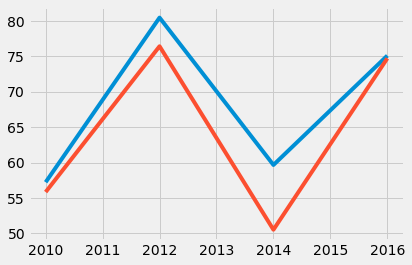

In [33]:
# let us first try leaving out 4 and training on the rest
from sklearn import linear_model

clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train,y_train)

print(clf.coef_)

y_pred=clf.predict(X_test)

# Quick plot
plt.style.use('fivethirtyeight')
plt.plot(range(2010,2018,2),y_pred)
plt.plot(range(2010,2018,2),y_test)


In [34]:
# Let us see which features it picked
t=[]
for i in range(0,len(clf.coef_)):
    if clf.coef_[i]!=0:
        t.append(i)
print(features.columns[t])
# Weird. Hm

Index(['EDUC_0.0', 'high', 'low', 'wind', 'pres'], dtype='object')


In [124]:
# Let us try different samples and compute average error rates
import random

def test_train_sample(X,y):
    t=random.sample(range(0,len(y)),int(0.75*len(y)))
    t.sort()
    X_train=[]
    X_test=[]
    y_train=[]
    y_test=[]
    for j in range(0,len(y)):
        if j in t:
            X_train.append(X[j])
            y_train.append(y[j])
        else:
            X_test.append(X[j])
            y_test.append(y[j])
            
    return [X_train, y_train, X_test, y_test]
    

Index(['INC0-10k', 'high', 'low', 'wind', 'pres'], dtype='object')
Index(['INC0-10k', 'EDUC_0.0', 'high', 'low', 'wind', 'pres'], dtype='object')
Index(['INC0-10k', 'high', 'low', 'wind', 'pres'], dtype='object')
Index(['INC0-10k', 'EDUC_0.0', 'high', 'low', 'precipitation', 'wind', 'pres'], dtype='object')
Index(['EDUC_0.0', 'high', 'low', 'wind', 'pres'], dtype='object')
Index(['EDUC_0.0', 'high', 'low', 'wind', 'pres'], dtype='object')
Index(['INC0-10k', 'high', 'low', 'precipitation', 'wind', 'pres'], dtype='object')
Index(['EDUC_0.0', 'high', 'low', 'wind', 'pres'], dtype='object')
Index(['EDUC_0.0', 'high', 'low', 'precipitation', 'wind', 'pres'], dtype='object')
Index(['INC0-10k', 'EDUC_0.0', 'high', 'low', 'wind', 'pres'], dtype='object')
The average error for Lasso is  4.175542689814749


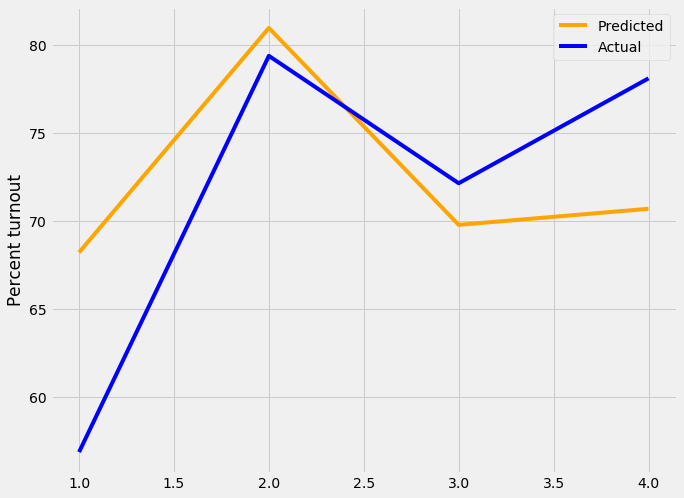

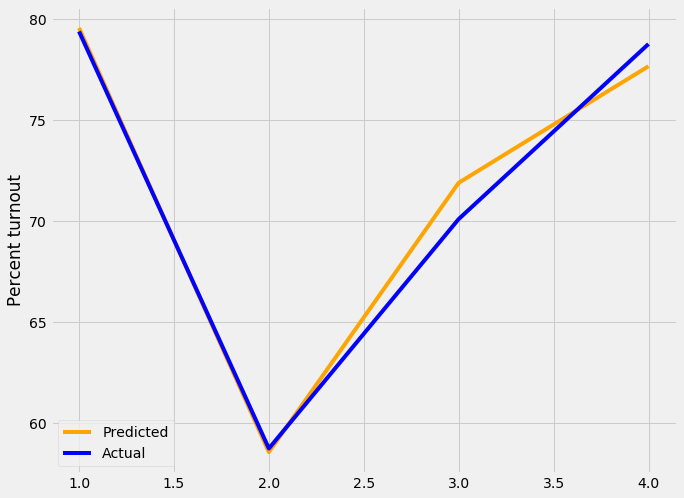

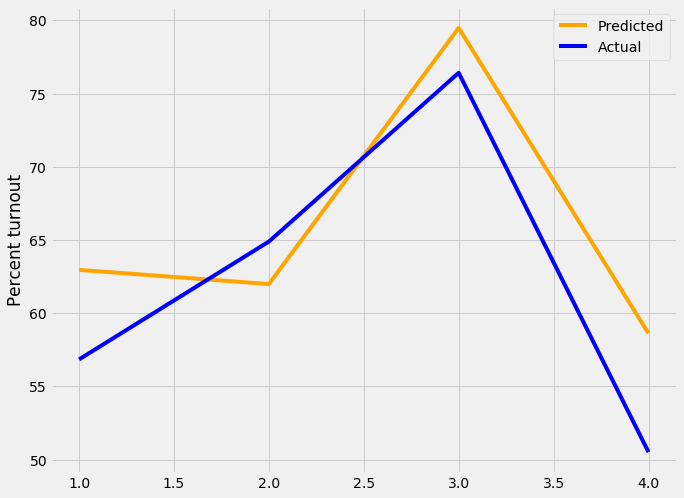

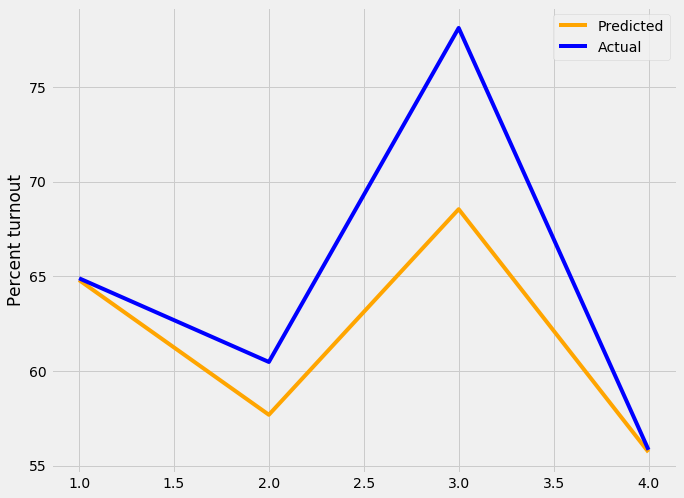

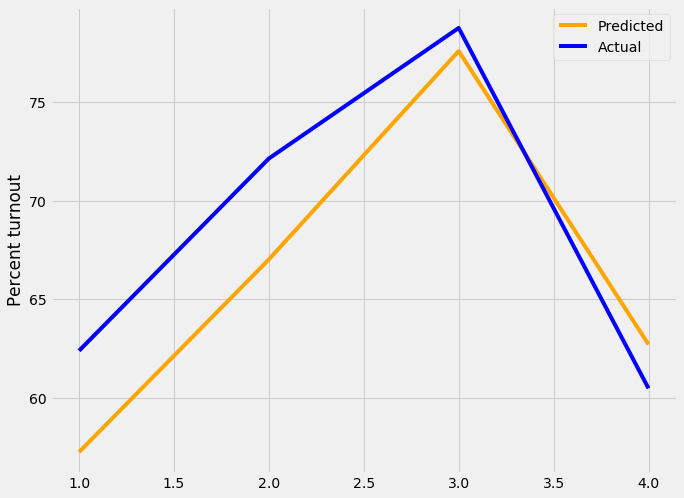

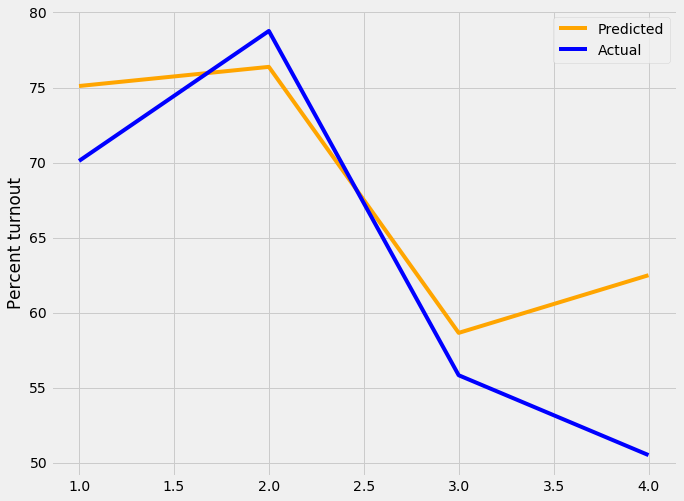

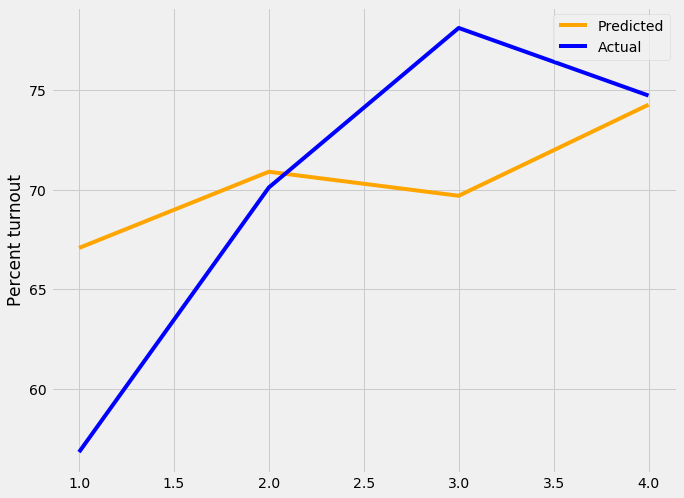

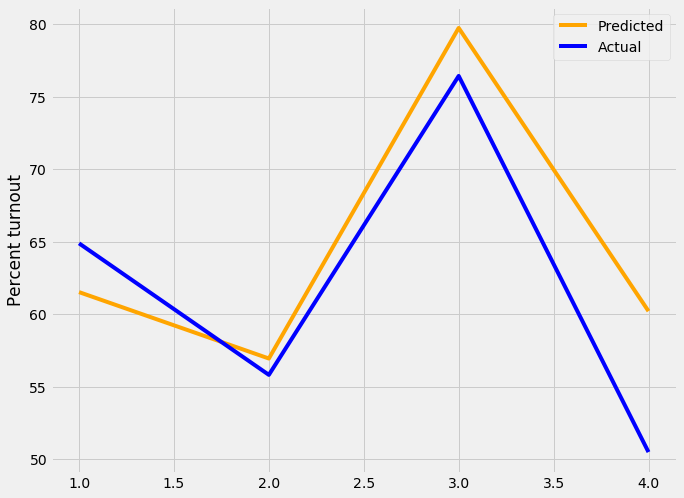

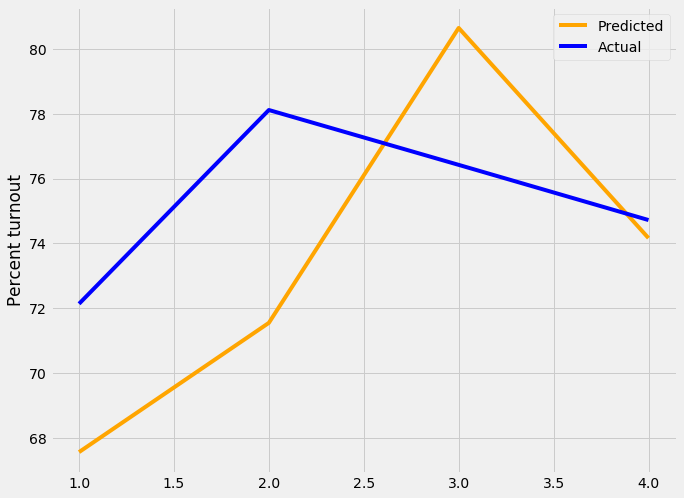

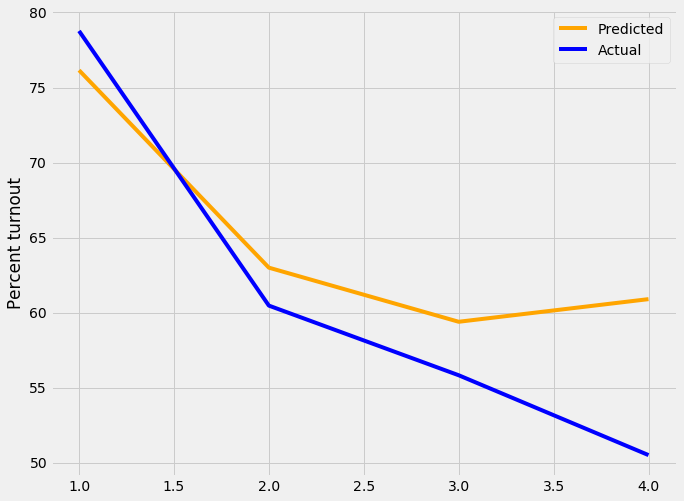

In [36]:
errors=[]
for i in range(0,10):
    [X_train, y_train, X_test, y_test]=test_train_sample(X,y)
    clf = linear_model.Lasso(alpha=0.1)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    
    t=[]
    for j in range(0,len(clf.coef_)):
        if clf.coef_[j]!=0:
            t.append(j)
    print(features.columns[t])
    
    # Compute average error
    errors.append(np.mean(abs(np.array(y_test)-np.array(y_pred))))
    
    # Quick plot
    plt.figure(i,figsize=(10,8))
    plt.ylabel('Percent turnout')
    plt.plot([1,2,3,4],y_pred,color='orange',label='Predicted')
    plt.plot([1,2,3,4],y_test,color='blue',label='Actual')
    plt.legend()

error=np.mean(errors)
print('The average error for Lasso is ',error)

### Let us now try some different methods

First let us reduce dimensionality by 'SelectKBest'.

In [37]:
from sklearn.feature_selection import SelectKBest, f_regression

y= np.asarray(y,dtype=np.float64)

X_new = SelectKBest(f_regression, k=10).fit_transform(np.asarray(X), y)
indeces=SelectKBest(f_regression,k=10).fit(np.asarray(X),y).get_support(True) #Selected features
indeces=np.asarray(indeces).astype(int)
indeces

array([11, 12, 15, 16, 17, 18, 19, 28, 35, 52])

Let us train with this new data

### Ordinary Least Squares

The average error for OLS is  37.93971368991465


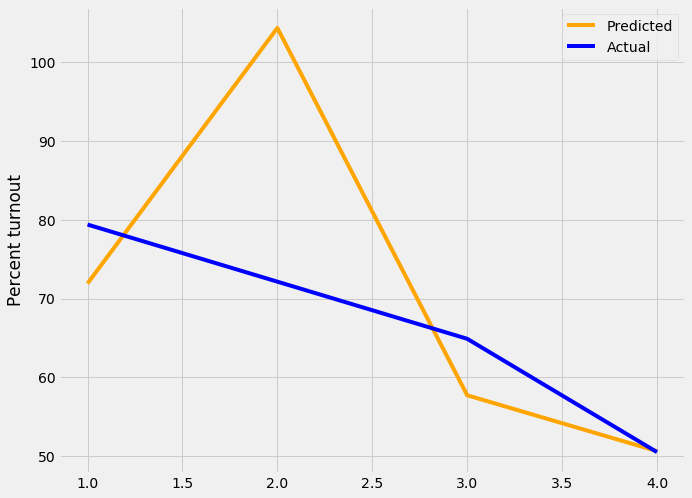

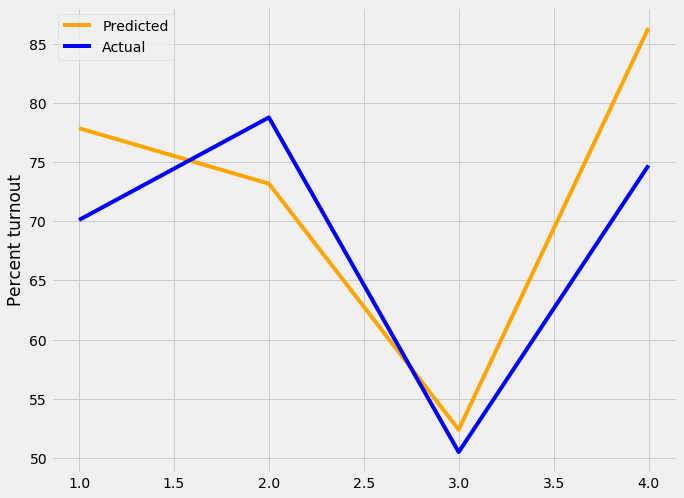

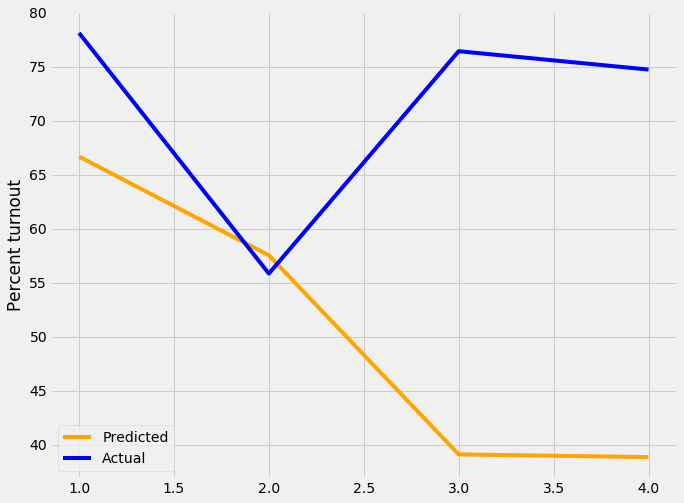

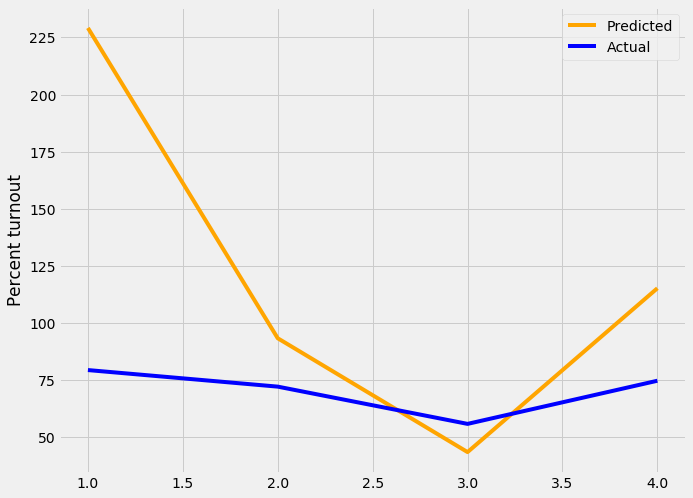

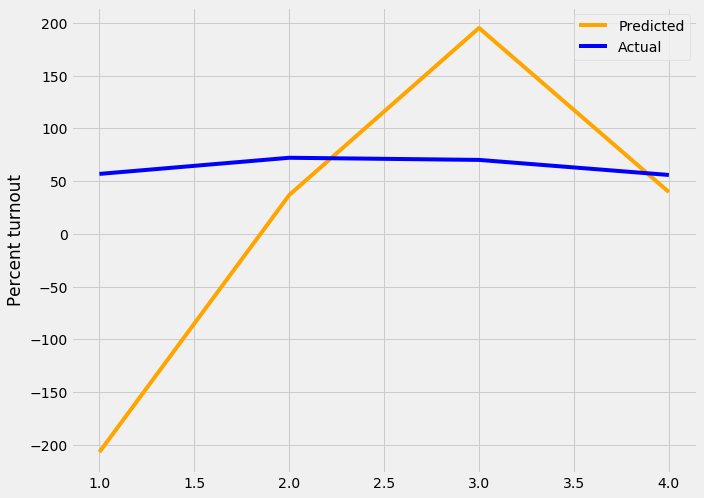

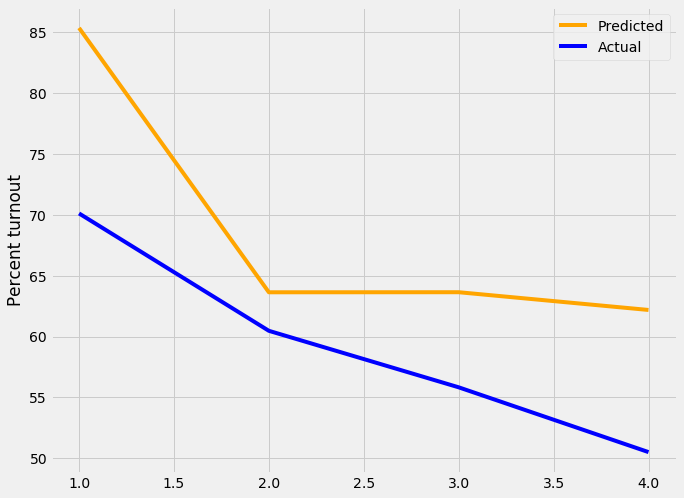

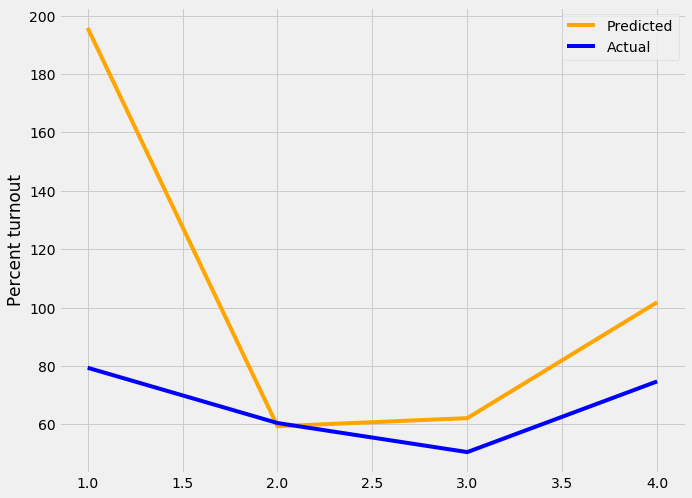

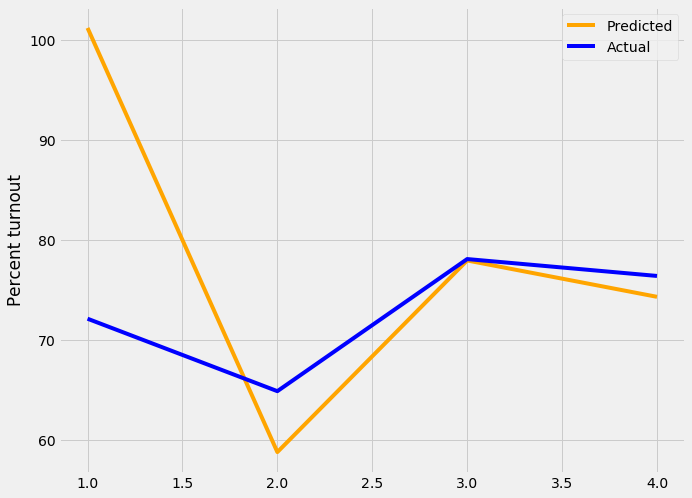

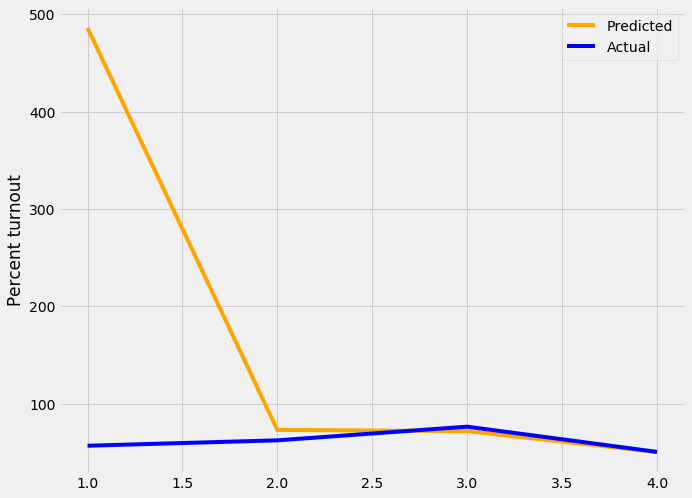

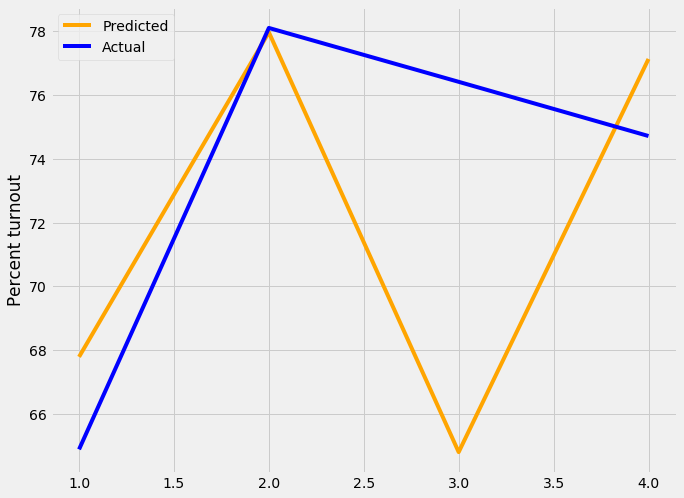

In [38]:
from sklearn import linear_model

errors=[]
for i in range(0,10):
    [X_train, y_train, X_test, y_test]=test_train_sample(X_new,y)
    reg = linear_model.LinearRegression()
    reg.fit (X_train, y_train)
    y_pred=reg.predict(X_test)
      
    # Compute average error
    errors.append(np.mean(abs(np.array(y_test)-np.array(y_pred))))
    
    # Quick plot
    plt.figure(i,figsize=(10,8))
    plt.ylabel('Percent turnout')
    plt.plot([1,2,3,4],y_pred,color='orange',label='Predicted')
    plt.plot([1,2,3,4],y_test,color='blue',label='Actual')
    plt.legend()

error=np.mean(errors)
print('The average error for OLS is ',error)

As expected, this performs horribly. Let us try some different methods. Let us try

### SVR

In [123]:
def plot_svr(X,y,ker,gam=0,deg=0,supress=False):
    # kernel can be 'rbf', 'linear', or 'poly'. If 'rbf' is given then a value for gamma is needed. If 'poly' is selected,
    # a value for the degree is needed
    # if supress is true, no plots are made

    from sklearn import svm
    errors=[]
    for i in range(0,10):
        [X_train, y_train, X_test, y_test]=test_train_sample(X,y)
        if ker=='rbf':
            clf = svm.SVR(kernel='rbf', C=1e3, gamma=gam)
        elif ker=='poly':
            clf = svm.SVR(kernel='poly', C=1e3, degree=deg)
        else:
            clf = svm.SVR(kernel=ker, C=1e3)
        clf.fit(X_train, y_train) 
        y_pred=clf.predict(X_test)
      
        # Compute average error
        errors.append(np.mean(abs(np.array(y_test)-np.array(y_pred))))
        
        if supress==False:    
            # Quick plot
            plt.figure(i,figsize=(10,8))
            plt.ylabel('Percent turnout')
            plt.plot([1,2,3,4],y_pred,color='orange',label='Predicted')
            plt.plot([1,2,3,4],y_test,color='blue',label='Actual')
            plt.legend()

    error=np.mean(errors)
    print('The average error for SVR and 10 features is ',error)

The average error for SVR and 10 features is  4.555611585621781


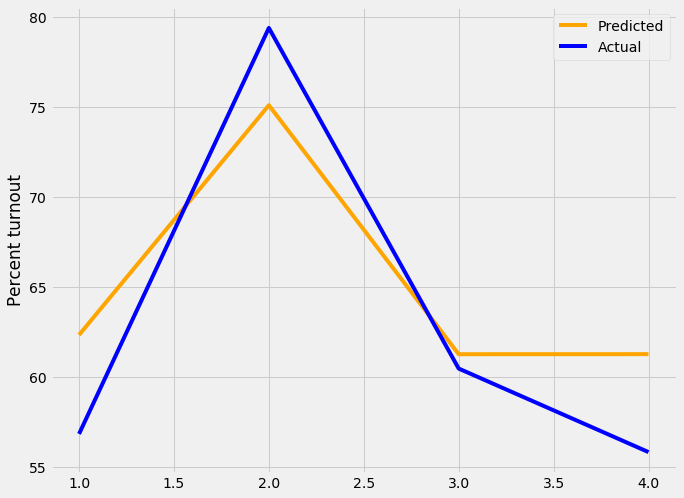

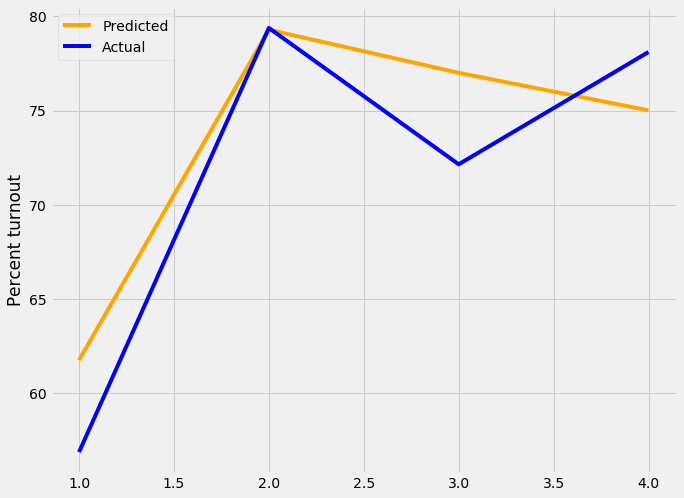

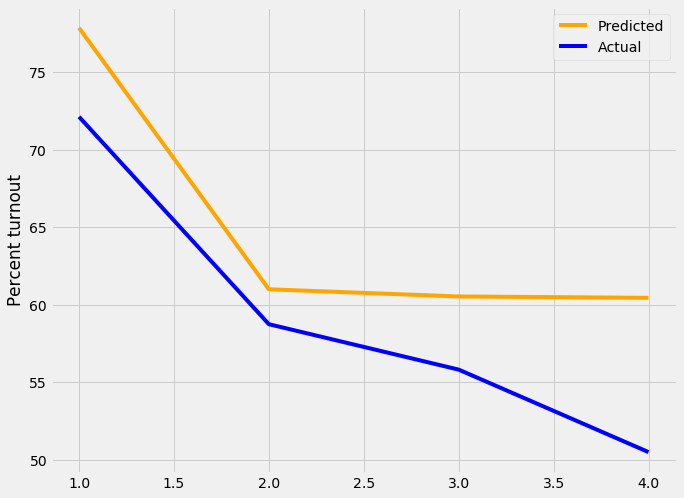

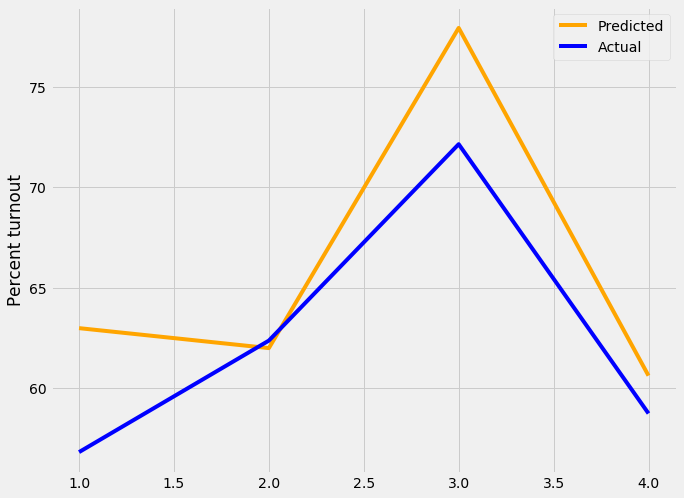

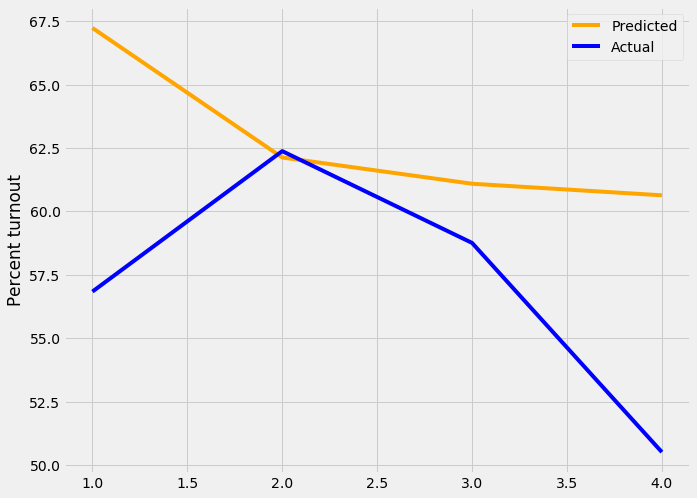

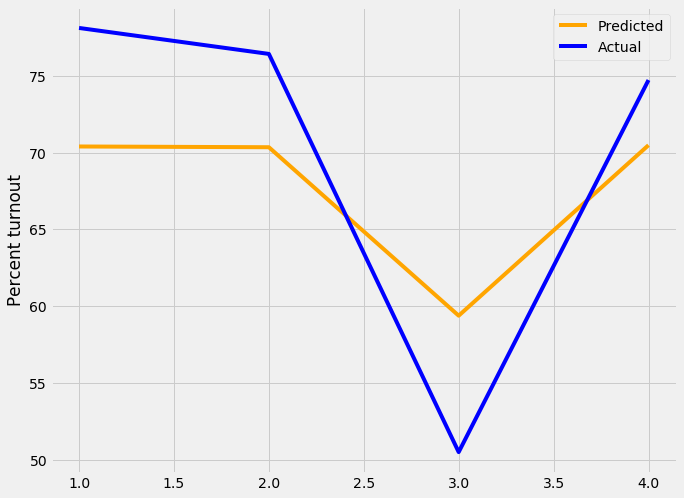

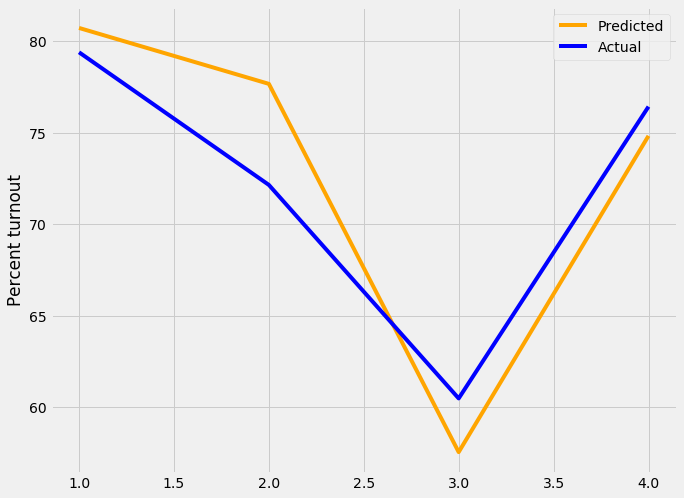

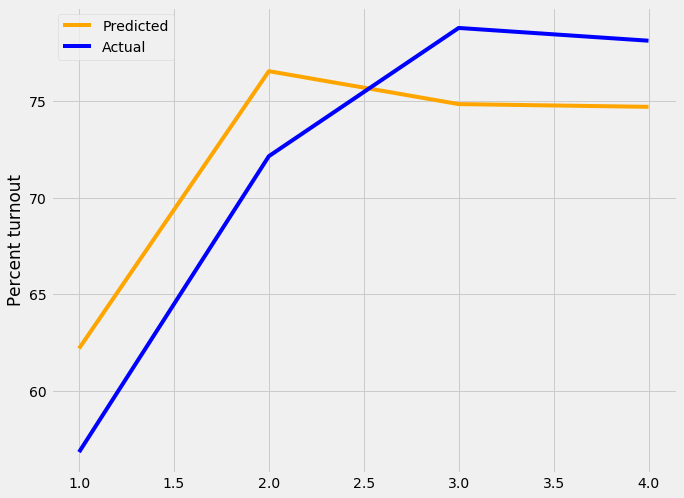

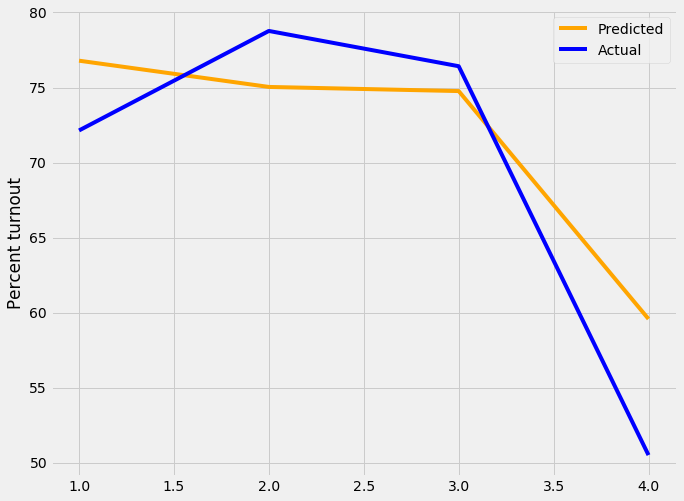

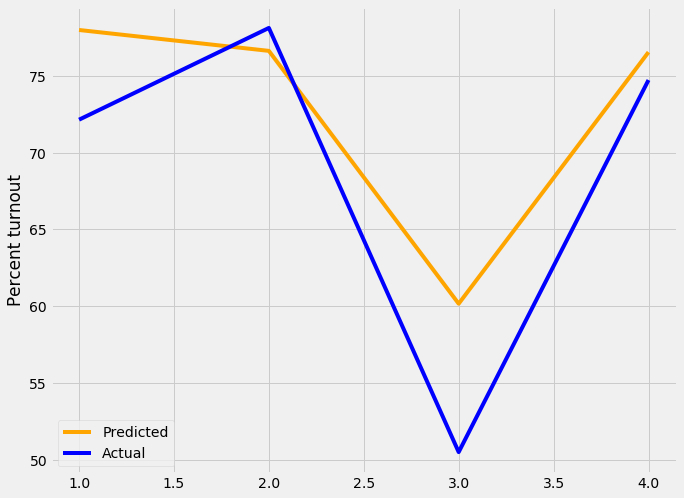

In [40]:
plot_svr(X_new,y,'rbf',gam=0.1)

The error fluctuates between 4 to 5 %, so SVR with radial kernel seems to be pretty good.

Let us tweak play around with the kernel a bit and see what we get.

In [43]:
plot_svr(X_new,y,'poly',deg=2,supress=True)

The average error for SVR and 10 features is  4.954521122698403


Polynomial kernel with degree 2 seems to be performing about the same. Let us now try SVR with more features.

In [47]:
plot_svr(X,y,'rbf',gam=0.1,supress=True)

The average error for SVR and 10 features is  7.831953810715393


In [48]:
# The error is much higher, so it seems that the feature selection worked. Let us take a look at the features it selected.
selected=[]
for i in indeces:
    selected.append(features.columns[i])
    
selected

['EDUC_0.0',
 'EDUC_1.0',
 'EDUC_2.0',
 'EDUC_3.0',
 'EDUC_4.0',
 'EDUC_5.0',
 'EDUC_6.0',
 'HISPAN_2',
 'MARST_5.0',
 'pres']

Interesting. It seems that education is one of the most important predictors (plus whether these are presidential elections or not) This is very different from Lasso, which seems to pick weather data instead.

Let us now try SVR with more features

In [380]:
X_new = SelectKBest(f_regression, k=10).fit_transform(np.asarray(X), y)
indeces=SelectKBest(f_regression,k=10).fit(np.asarray(X),y).get_support(True) #Selected features
indeces=np.asarray(indeces).astype(int)

plot_svr(X_new,y,'rbf',gam=0.1,supress=True)


The average error for SVR and 10 features is  4.554853409267429


Okay, so more features than 10 don't seem to help. Less features (e.g.7) seem to help somewhat, but not too much. Next, before calling it a night, let us try:
   - PCA
   - Decision Trees
   
### <font color='orange'> Decision tree + select k best </font>

In [374]:
def plot_dtree(X,y,d,supress=False):
    # Takes feature matrix and output vector and fits the decision tree model on it 10 times with random samples
    # d is max_depth of the tree
    # if supress is true, no plots are made

    from sklearn.tree import DecisionTreeRegressor
    errors=[]
    for i in range(0,10):
        [X_train, y_train, X_test, y_test]=test_train_sample(X,y)
        regr = DecisionTreeRegressor(max_depth=d)
        regr.fit(X_train, y_train)
        y_pred=regr.predict(X_test)
      
        # Compute average error
        errors.append(np.mean(abs(np.array(y_test)-np.array(y_pred))))
        
        if supress==False:    
            # Quick plot
            plt.figure(i,figsize=(10,8))
            plt.ylabel('Percent turnout')
            plt.plot([1,2,3,4],y_pred,color='orange',label='Predicted')
            plt.plot([1,2,3,4],y_test,color='blue',label='Actual')
            plt.legend()

    error=np.mean(errors)
    print('The average error for SVR and 10 features is ',error)

In [395]:
plot_dtree(X_new,y,2,supress=True)

# This depth seems to be doing okay. SVR with 10 features is still the best

The average error for SVR and 10 features is  4.536650000000002


### PCA

In [415]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X,y)

X_new=pca.fit_transform(X,y)
plot_svr(X_new,y,'rbf',gam=0.1,supress=True)

The average error for SVR and 10 features is  8.725452736073896


Hm... Not very good. I think the best we can do for now is SVR + 10 features from select k best. Let us try with less test data.

In [121]:
import random

def test_train_sample2(X,y):
    t=random.sample(range(0,len(y)),int(0.85*len(y)))
    t.sort()
    X_train=[]
    X_test=[]
    y_train=[]
    y_test=[]
    for j in range(0,len(y)):
        if j in t:
            X_train.append(X[j])
            y_train.append(y[j])
        else:
            X_test.append(X[j])
            y_test.append(y[j])
            
    return [X_train, y_train, X_test, y_test]

def plot_svr2(X,y,ker,gam=0,deg=0,supress=False):
    # kernel can be 'rbf', 'linear', or 'poly'. If 'rbf' is given then a value for gamma is needed. If 'poly' is selected,
    # a value for the degree is needed
    # if supress is true, no plots are made
    
    plt.style.use('fivethirtyeight')

    from sklearn import svm
    errors=[]
    for i in range(0,10):
        [X_train, y_train, X_test, y_test]=test_train_sample2(X,y)
        if ker=='rbf':
            clf = svm.SVR(kernel='rbf', C=1e3, gamma=gam)
        elif ker=='poly':
            clf = svm.SVR(kernel='poly', C=1e3, degree=deg)
        else:
            clf = svm.SVR(kernel=ker, C=1e3)
        clf.fit(X_train, y_train) 
        y_pred=clf.predict(X_test)
      
        # Compute average error
        errors.append(np.mean(abs(np.array(y_test)-np.array(y_pred))))
        
        if supress==False:    
            # Quick plot
            plt.figure(i,figsize=(10,8))
            plt.ylabel('Percent turnout')
            plt.plot([1,2,3,4],y_pred,color='orange',label='Predicted')
            plt.plot([1,2,3,4],y_test,color='blue',label='Actual')
            plt.legend()

    error=np.mean(errors)
    print('The average error for SVR and 10 features is ',error)

In [427]:
X_new = SelectKBest(f_regression, k=10).fit_transform(np.asarray(X), y)
indeces=SelectKBest(f_regression,k=10).fit(np.asarray(X),y).get_support(True) #Selected features
indeces=np.asarray(indeces).astype(int)

plot_svr2(X_new,y,'rbf',gam=0.1,supress=True)

The average error for SVR and 10 features is  4.561900033368909


The error dropped, but that's just because we regressed on more points.

## <font color='orange'> November 1st, 2018 </font>

   - Finish off the model by predicting turnout for senator and governor races as well
   - Make pretty plots (e.g. the congressional district that are most likely to flip)   
   
### Governor and Senator models


In [75]:
df_master=pd.read_csv('df_master_wed.csv')
df_main=df_master[df_master['YEAR']>1992]
df_main=df_main[df_main['CG']==0]
df_main.head(20)


YEAR  CG    CONGTOT     CONGIR    CONGDFL    CONGTH     SENTOT  \
22   1994   0        NaN        NaN        NaN       NaN        NaN   
31   1996   0        NaN        NaN        NaN       NaN        NaN   
40   1998   0        NaN        NaN        NaN       NaN        NaN   
49   2000   0  2383506.0   993371.0  1234204.0  155931.0  2469422.0   
58   2002   0  2201638.0  1029612.0  1097911.0   74115.0  2244640.0   
67   2004   0  2721827.0  1236095.0  1399624.0   86108.0        0.0   
76   2006   0  2178974.0   924636.0  1152621.0   88114.0  2202772.0   
85   2008   0  5605228.0  2138030.0  3224960.0  242238.0  5772882.0   
94   2010   0  2090591.0   970741.0  1002026.0   86455.0        0.0   
103  2012   0  2813383.0  1210409.0  1560984.0   41990.0  2843207.0   
112  2014   0  1963539.0   913539.0   985760.0   52790.0  1981528.0   
121  2016   0  2860432.0  1334686.0  1434590.0    4376.0        0.0   

         SENIR     SENDFL     SENTH      ...       congtot_pt  congir_pt  \
22         NaN        NaN       NaN      ...              NaN        NaN   
31         NaN        NaN       NaN      ...              NaN        NaN   
40         NaN        NaN       NaN      ...              NaN        NaN   
49   1047474.0  1181553.0  240395.0      ...              1.0   0.416769   
58   1117139.0  1068148.0   59353.0      ...              1.0   0.467657   
67         0.0        0.0       0.0      ...              1.0   0.454142   
76    835653.0  1278849.0   72148.0      ...              1.0   0.424345   
85   2423802.0  2423900.0  925180.0      ...              1.0   0.381435   
94         0.0        0.0       0.0      ...              1.0   0.464338   
103   867974.0  1854595.0  120638.0      ...              1.0   0.430233   
112   850227.0  1053205.0   78096.0      ...              1.0   0.465251   
121        0.0        0.0       0.0      ...              1.0   0.466603   

     congdfl_pt  sentot_pt  senir_pt  sendfl_pt  govtot_pt  govir_pt  \
22          NaN        NaN       NaN        NaN        NaN       NaN   
31          NaN        NaN       NaN        NaN        NaN       NaN   
40          NaN        NaN       NaN        NaN        NaN       NaN   
49     0.517810   1.036046  0.424178   0.478474   0.000000       NaN   
58     0.498679   1.019532  0.497692   0.475866   1.023090  0.443723   
67     0.514222   0.000000       NaN        NaN   0.000000       NaN   
76     0.528974   1.010922  0.379364   0.580563   1.010997  0.466908   
85     0.575349   1.029910  0.419860   0.419877   0.375903  0.432109   
94     0.479303   0.000000       NaN        NaN   1.007859  0.432109   
103    0.554842   1.010601  0.305280   0.652290   0.000000       NaN   
112    0.502032   1.009162  0.429076   0.531512   1.006044  0.445102   
121    0.501529   0.000000       NaN        NaN   0.000000       NaN   

     govdfl_pt       dif_tot  
22         NaN           NaN  
31         NaN           NaN  
40         NaN           NaN  
49         NaN  7.485348e+04  
58    0.364607  8.131160e+04  
67         NaN  1.211280e+05  
76    0.457326  3.888842e+04  
85    0.436271 -2.683803e+06  
94    0.436271  3.273109e+04  
103        NaN  1.372261e+05  
112   0.500714  2.914919e+04  
121        NaN  1.076930e+05  

[12 rows x 85 columns]

In [76]:
df_main=df_main.reset_index()
df_main.head()

index  YEAR  CG    CONGTOT     CONGIR    CONGDFL    CONGTH     SENTOT  \
0     22  1994   0        NaN        NaN        NaN       NaN        NaN   
1     31  1996   0        NaN        NaN        NaN       NaN        NaN   
2     40  1998   0        NaN        NaN        NaN       NaN        NaN   
3     49  2000   0  2383506.0   993371.0  1234204.0  155931.0  2469422.0   
4     58  2002   0  2201638.0  1029612.0  1097911.0   74115.0  2244640.0   

       SENIR     SENDFL     ...      congtot_pt  congir_pt  congdfl_pt  \
0        NaN        NaN     ...             NaN        NaN         NaN   
1        NaN        NaN     ...             NaN        NaN         NaN   
2        NaN        NaN     ...             NaN        NaN         NaN   
3  1047474.0  1181553.0     ...             1.0   0.416769    0.517810   
4  1117139.0  1068148.0     ...             1.0   0.467657    0.498679   

   sentot_pt  senir_pt  sendfl_pt  govtot_pt  govir_pt  govdfl_pt     dif_tot  
0        NaN       NaN        NaN        NaN       NaN        NaN         NaN  
1        NaN       NaN        NaN        NaN       NaN        NaN         NaN  
2        NaN       NaN        NaN        NaN       NaN        NaN         NaN  
3   1.036046  0.424178   0.478474    0.00000       NaN        NaN  74853.4752  
4   1.019532  0.497692   0.475866    1.02309  0.443723   0.364607  81311.5976  

[5 rows x 86 columns]

In [77]:
#df_main=df_main.drop(columns=['index'])
df_main.head()

index  YEAR  CG    CONGTOT     CONGIR    CONGDFL    CONGTH     SENTOT  \
0     22  1994   0        NaN        NaN        NaN       NaN        NaN   
1     31  1996   0        NaN        NaN        NaN       NaN        NaN   
2     40  1998   0        NaN        NaN        NaN       NaN        NaN   
3     49  2000   0  2383506.0   993371.0  1234204.0  155931.0  2469422.0   
4     58  2002   0  2201638.0  1029612.0  1097911.0   74115.0  2244640.0   

       SENIR     SENDFL     ...      congtot_pt  congir_pt  congdfl_pt  \
0        NaN        NaN     ...             NaN        NaN         NaN   
1        NaN        NaN     ...             NaN        NaN         NaN   
2        NaN        NaN     ...             NaN        NaN         NaN   
3  1047474.0  1181553.0     ...             1.0   0.416769    0.517810   
4  1117139.0  1068148.0     ...             1.0   0.467657    0.498679   

   sentot_pt  senir_pt  sendfl_pt  govtot_pt  govir_pt  govdfl_pt     dif_tot  
0        NaN       NaN        NaN        NaN       NaN        NaN         NaN  
1        NaN       NaN        NaN        NaN       NaN        NaN         NaN  
2        NaN       NaN        NaN        NaN       NaN        NaN         NaN  
3   1.036046  0.424178   0.478474    0.00000       NaN        NaN  74853.4752  
4   1.019532  0.497692   0.475866    1.02309  0.443723   0.364607  81311.5976  

[5 rows x 86 columns]

In [78]:
# Let us fill in the missing values for years 1994 to 1998.
df_94=pd.read_csv('../Data Sets/1994_results.csv')
df_96=pd.read_csv('../Data Sets/1996_results.csv')
df_98=pd.read_csv('../Data Sets/1998_results.csv')

In [84]:
#Sum all of the rows to get state-wide level data
sum94=np.sum(df_94,axis=0)
sum96=np.sum(df_96,axis=0)
sum98=np.sum(df_98,axis=0)

# Now add to our data set
#1994
df_main.loc[0,'CONGIR']=sum94['CongIR']
df_main.loc[0,'CONGDFL']=sum94['CongDFL']
df_main.loc[0,'CONGTH']=sum94['CongOther']
df_main.loc[0,'SENIR']=sum94['USSenIR']
df_main.loc[0,'SENDFL']=sum94['USSenDFL']
df_main.loc[0,'SENTH']=sum94['USSenOther']
df_main.loc[0,'GOVIR']=sum94['GovIR']
df_main.loc[0,'GOVDFL']=sum94['GovDFL']
df_main.loc[0,'GOVTH']=sum94['GovOther']

#1996
df_main.loc[1,'CONGIR']=sum96['CongIR']
df_main.loc[1,'CONGDFL']=sum96['CongDFL']
df_main.loc[1,'CONGTH']=sum96['CongOther']
df_main.loc[1,'SENIR']=sum96['USSenIR']
df_main.loc[1,'SENDFL']=sum96['USSenDFL']
df_main.loc[1,'SENTH']=sum96['USSenOther']


#1998
df_main.loc[2,'CONGIR']=sum98['CongIR']
df_main.loc[2,'CONGDFL']=sum98['CongDFL']
df_main.loc[2,'CONGTH']=sum98['CongOther']
df_main.loc[2,'GOVIR']=sum98['GovIR']
df_main.loc[2,'GOVDFL']=sum98['GovDFL']
df_main.loc[2,'GOVTH']=sum98['GovOther']+sum98['GovRP']

df_main.loc[0:2,'CONGTOT']=df_main.loc[0:2,'CONGIR']+df_main.loc[0:2,'CONGTH']+df_main.loc[0:2,'CONGDFL']
df_main.loc[0:2,'SENTOT']=df_main.loc[0:2,'SENIR']+df_main.loc[0:2,'SENTH']+df_main.loc[0:2,'SENDFL']
df_main.loc[0:2,'GOVTOT']=df_main.loc[0:2,'GOVIR']+df_main.loc[0:2,'GOVTH']+df_main.loc[0:2,'GOVDFL']

df_main.head()

index  YEAR  CG    CONGTOT     CONGIR    CONGDFL    CONGTH     SENTOT  \
0     22  1994   0  1794618.0   846950.0   883905.0   63763.0  1794618.0   
1     31  1996   0  2212193.0   894735.0  1178847.0  138611.0  2212471.0   
2     40  1998   0  2106479.0   862507.0  1089767.0  154205.0        NaN   
3     49  2000   0  2383506.0   993371.0  1234204.0  155931.0  2469422.0   
4     58  2002   0  2201638.0  1029612.0  1097911.0   74115.0  2244640.0   

       SENIR     SENDFL     ...      congtot_pt  congir_pt  congdfl_pt  \
0   869653.0   781860.0     ...             NaN        NaN         NaN   
1   901282.0  1098493.0     ...             NaN        NaN         NaN   
2        NaN        NaN     ...             NaN        NaN         NaN   
3  1047474.0  1181553.0     ...             1.0   0.416769    0.517810   
4  1117139.0  1068148.0     ...             1.0   0.467657    0.498679   

   sentot_pt  senir_pt  sendfl_pt  govtot_pt  govir_pt  govdfl_pt     dif_tot  
0        NaN       NaN        NaN        NaN       NaN        NaN         NaN  
1        NaN       NaN        NaN        NaN       NaN        NaN         NaN  
2        NaN       NaN        NaN        NaN       NaN        NaN         NaN  
3   1.036046  0.424178   0.478474    0.00000       NaN        NaN  74853.4752  
4   1.019532  0.497692   0.475866    1.02309  0.443723   0.364607  81311.5976  

[5 rows x 86 columns]

In [86]:
df_main=df_main.drop(columns=['index'])

In [88]:
# Now compute percentages
for i in range(0,3):
    df_main.loc[i,'congir_pt']=df_main.loc[i,'CONGIR']/df_main.loc[i,'CONGTOT']
    df_main.loc[i,'congdfl_pt']=df_main.loc[i,'CONGDFL']/df_main.loc[i,'CONGTOT']
    df_main.loc[i,'congth_pt']=df_main.loc[i,'CONGTH']/df_main.loc[i,'CONGTOT']
    df_main.loc[i,'senir_pt']=df_main.loc[i,'CONGIR']/df_main.loc[i,'SENTOT']
    df_main.loc[i,'sendfl_pt']=df_main.loc[i,'CONGDFL']/df_main.loc[i,'SENTOT']
    df_main.loc[i,'senth_pt']=df_main.loc[i,'CONGTH']/df_main.loc[i,'SENTOT']
    df_main.loc[i,'govir_pt']=df_main.loc[i,'GOVIR']/df_main.loc[i,'GOVTOT']
    df_main.loc[i,'govdfl_pt']=df_main.loc[i,'GOVDFL']/df_main.loc[i,'GOVTOT']
    df_main.loc[i,'govth_pt']=df_main.loc[i,'GOVTH']/df_main.loc[i,'GOVTOT'] 
    

In [100]:
df_main.loc[0:2,'gen_pt']=[73.91,55.15,66.61]
df_main.loc[0:2,'gen_el']=[3253779,3319509,3378089]
df_main.loc[0:2,'prim_pt']=[27.69,13.56,20.23]
df_main.loc[0:2,'prim_el']=[3253779,3319509,3378089]

df_main['gen_pt']=pd.to_numeric(df_main['gen_pt'])
df_main['gen_el']=pd.to_numeric(df_main['gen_el'])

for i in range(0,3):
    df_main.loc[i,'dif_tot']=df_main.loc[i,'gen_pt']*df_main.loc[i,'gen_el']-df_main.loc[i,'CONGTOT']

In [101]:
df_main.head()

YEAR  CG    CONGTOT     CONGIR    CONGDFL    CONGTH     SENTOT      SENIR  \
0  1994   0  1794618.0   846950.0   883905.0   63763.0  1794618.0   869653.0   
1  1996   0  2212193.0   894735.0  1178847.0  138611.0  2212471.0   901282.0   
2  1998   0  2106479.0   862507.0  1089767.0  154205.0        NaN        NaN   
3  2000   0  2383506.0   993371.0  1234204.0  155931.0  2469422.0  1047474.0   
4  2002   0  2201638.0  1029612.0  1097911.0   74115.0  2244640.0  1117139.0   

      SENDFL     SENTH    ...     sentot_pt  senir_pt  sendfl_pt  govtot_pt  \
0   781860.0  143105.0    ...           NaN  0.471939   0.492531        NaN   
1  1098493.0  212696.0    ...           NaN  0.404405   0.532819        NaN   
2        NaN       NaN    ...           NaN       NaN        NaN        NaN   
3  1181553.0  240395.0    ...      1.036046  0.424178   0.478474    0.00000   
4  1068148.0   59353.0    ...      1.019532  0.497692   0.475866    1.02309   

   govir_pt  govdfl_pt       dif_tot  congth_pt  senth_pt  govth_pt  
0  0.609692   0.328395  2.386922e+08   0.035530   0.03553  0.061912  
1       NaN        NaN  1.808587e+08   0.062658   0.06265       NaN  
2  0.340297   0.278673  2.229080e+08   0.073205       NaN  0.381030  
3       NaN        NaN  7.485348e+04        NaN       NaN       NaN  
4  0.443723   0.364607  8.131160e+04        NaN       NaN       NaN  

[5 rows x 88 columns]

In [102]:
# Save this
df_main.to_csv('df_main.csv')

### Back to training

Okay, it seems that we are all set. We build models to predict the following
- Senator turnout (8 points)
- Governor turnout (6 points)
- Difference in general turnout and congtot

In [67]:
df_main=pd.read_csv('df_main.csv')

df_main[['YEAR','CONGTOT','SENTOT','GOVTOT']] # It seems that all of these numbers are close

YEAR  CONGTOT     SENTOT     GOVTOT
0   1994  1794618  1794618.0  1794618.0
1   1996  2212193  2212471.0        NaN
2   1998  2106479        NaN  2106628.0
3   2000  2383506  2469422.0        0.0
4   2002  2201638  2244640.0  2252473.0
5   2004  2721827        0.0        0.0
6   2006  2178974  2202772.0  2202937.0
7   2008  5605228  5772882.0  2107021.0
8   2010  2090591        0.0  2107021.0
9   2012  2813383  2843207.0        0.0
10  2014  1963539  1981528.0  1975406.0
11  2016  2860432        0.0        0.0

First, let us predict senator turnout

Pertinent years: 00, 02, 06, 08, 12, 14

In [68]:
df_sen=df_main.loc[[3,4,6,7,9,10],:]
df_sen=df_sen.reset_index()
df_sen.head()

index  Unnamed: 0  YEAR  CG  CONGTOT   CONGIR  CONGDFL  CONGTH     SENTOT  \
0      3           3  2000   0  2383506   993371  1234204  155931  2469422.0   
1      4           4  2002   0  2201638  1029612  1097911   74115  2244640.0   
2      6           6  2006   0  2178974   924636  1152621   88114  2202772.0   
3      7           7  2008   0  5605228  2138030  3224960  242238  5772882.0   
4      9           9  2012   0  2813383  1210409  1560984   41990  2843207.0   

       SENIR    ...     sentot_pt  senir_pt  sendfl_pt  govtot_pt  govir_pt  \
0  1047474.0    ...      1.036046  0.424178   0.478474   0.000000       NaN   
1  1117139.0    ...      1.019532  0.497692   0.475866   1.023090  0.443723   
2   835653.0    ...      1.010922  0.379364   0.580563   1.010997  0.466908   
3  2423802.0    ...      1.029910  0.419860   0.419877   0.375903  0.432109   
4   867974.0    ...      1.010601  0.305280   0.652290   0.000000       NaN   

   govdfl_pt       dif_tot  congth_pt  senth_pt  govth_pt  
0        NaN  7.485348e+04        NaN       NaN       NaN  
1   0.364607  8.131160e+04        NaN       NaN       NaN  
2   0.457326  3.888842e+04        NaN       NaN       NaN  
3   0.436271 -2.683803e+06        NaN       NaN       NaN  
4        NaN  1.372261e+05        NaN       NaN       NaN  

[5 rows x 81 columns]

In [69]:
df_sen=df_sen.drop(columns=['index','Unnamed: 0'])

In [70]:
df_main.columns.values
print(df_main.columns.get_loc('AGE0-17'), 'to', df_main.columns.get_loc('prim_pt'))

15 to 63


In [71]:
names=[]
for i in range (14,64):
    names.append(df_sen.columns[i])

features=df_sen[names]
features.head()

X=[]

for row in features.iterrows():
    index, data = row
    X.append(data.tolist())

In [72]:
# We have to build two models for senate races, one is two predict percentage
# for democrat and one is for republican.

print(len(X))
y_rep=df_sen.loc[:,'senir_pt']
y_dfl=df_sen.loc[:,'sendfl_pt']

6


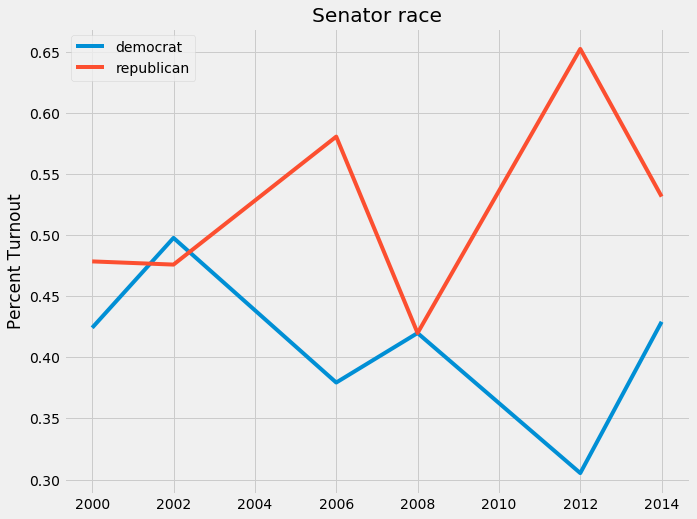

In [77]:
plt.figure(figsize=(10,8))
plt.plot([2000,2002,2006,2008,2012,2014],y_rep,label='democrat')
plt.plot([2000,2002,2006,2008,2012,2014],y_dfl,label='republican')
plt.title('Senator race')
plt.ylabel('Percent Turnout')

plt.legend()

In [181]:
# Let us try lasso first, leaving one point

X_train=X[:4]
y_train=y_rep[:4]
z_train=y_dfl[:4]
X_test=X[4:]

from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

print('Error republican:',np.asarray(y_rep[4:6])-np.asarray(y_pred))

clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, z_train)
z_pred=clf.predict(X_test)

print('Error democrat:',np.asarray(y_dfl[4:6])-np.asarray(z_pred))


Error republican: [-0.06176775  0.08305007]
Error democrat: [0.17269382 0.05494077]


The errors seem to be better when we fit the model to less points, whcih suggests that there may be overfitting. :(

### Let us try governor.

There are only 4 points to train our model on so we might as well just guess. Let us plot the governor turnouts

Text(0,0.5,'Percent Turnout')

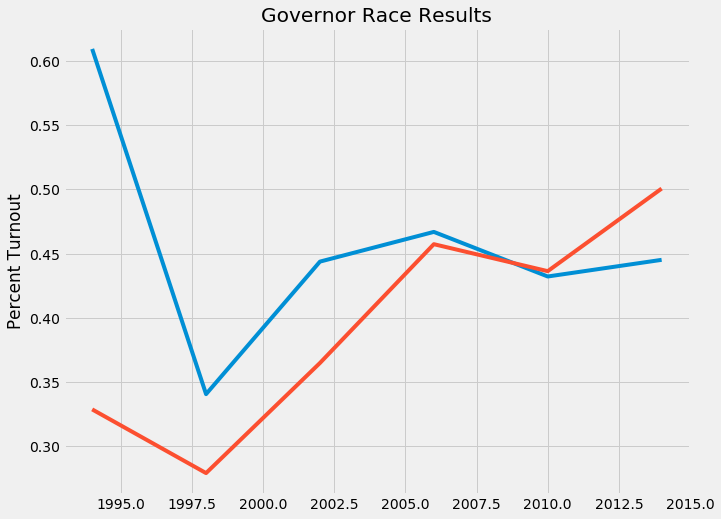

In [81]:
plt.figure(figsize=(10,8))
y=df_main.loc[[0,2,4,6,8,10],'govir_pt']
z=df_main.loc[[0,2,4,6,8,10],'govdfl_pt']
plt.plot([1994,1998,2002,2006,2010,2014],y,label='republican')
plt.plot([1994,1998,2002,2006,2010,2014],z,label='democrat')
plt.title('Governor Race Results')
plt.ylabel('Percent Turnout')

#### dif_tot

Let us train a model to predict the difference between general turnout and cong_tot


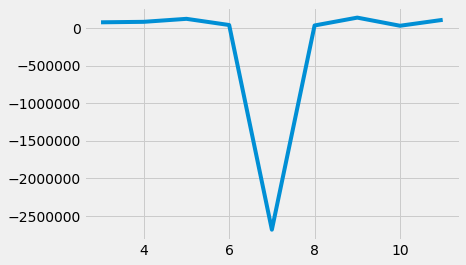

In [201]:
names=[]
for i in range (15,64):
    names.append(df_main.columns[i])

features=df_main[names]

X=[]

for row in features.iterrows():
    index, data = row
    X.append(data.tolist())
    
y=df_main['dif_tot']
y=y[3:]
plt.plot(y)




In [199]:
df_main['gen_tot']=df_main['gen_pt']*df_main['gen_el']
df_main[['gen_tot','CONGTOT','dif_tot']]

gen_tot  CONGTOT       dif_tot
0   2.404868e+08  1794618  2.386922e+08
1   1.830709e+08  2212193  1.808587e+08
2   2.250145e+08  2106479  2.229080e+08
3   2.458359e+08  2383506  7.485348e+04
4   2.282950e+08  2201638  8.131160e+04
5   2.842955e+08  2721827  1.211280e+05
6   2.217862e+08  2178974  3.888842e+04
7   2.921425e+08  5605228 -2.683803e+06
8   2.123322e+08  2090591  3.273109e+04
9   2.950609e+08  2813383  1.372261e+05
10  1.992688e+08  1963539  2.914919e+04
11  2.968125e+08  2860432  1.076930e+05

### <font color='burgundy'> November 2nd, 2018 </font>

Today's tasks:
   - Find _current_ census data so that we can run our models and get our predictions
   - Make graphs for presentations
   - Finish slides

In [86]:
# Let us begin by loading the data
df_master=pd.read_csv('df_master_31.csv')
df_master.head()

Unnamed: 0  index    YEAR   CG  CONGTOT  CONGIR  CONGDFL  CONGTH  SENTOT  \
0           0    117  1850.0  0.0      NaN     NaN      NaN     NaN     NaN   
1           1    118  1860.0  0.0      NaN     NaN      NaN     NaN     NaN   
2           2    119  1870.0  0.0      NaN     NaN      NaN     NaN     NaN   
3           3    120  1880.0  0.0      NaN     NaN      NaN     NaN     NaN   
4           4    121  1900.0  0.0      NaN     NaN      NaN     NaN     NaN   

   SENIR   ...     congtot_pt  congir_pt  congdfl_pt  sentot_pt  senir_pt  \
0    NaN   ...            NaN        NaN         NaN        NaN       NaN   
1    NaN   ...            NaN        NaN         NaN        NaN       NaN   
2    NaN   ...            NaN        NaN         NaN        NaN       NaN   
3    NaN   ...            NaN        NaN         NaN        NaN       NaN   
4    NaN   ...            NaN        NaN         NaN        NaN       NaN   

   sendfl_pt  govtot_pt  govir_pt  govdfl_pt  dif_tot  
0        NaN        NaN       NaN        NaN      NaN  
1        NaN        NaN       NaN        NaN      NaN  
2        NaN        NaN       NaN        NaN      NaN  
3        NaN        NaN       NaN        NaN      NaN  
4        NaN        NaN       NaN        NaN      NaN  

[5 rows x 87 columns]

In [87]:
# Let's look at the years we want to plot (for flips)
#df_master=df_master.drop(columns=['Unnamed: 0','index'])

df=df_master[df_master['YEAR']>1998]
df.head()

Unnamed: 0  index    YEAR   CG    CONGTOT    CONGIR    CONGDFL    CONGTH  \
49          49     27  2000.0  0.0  2383506.0  993371.0  1234204.0  155931.0   
50          50     28  2000.0  1.0   283221.0  159835.0   117946.0    5440.0   
51          51     29  2000.0  2.0   290799.0  139316.0   138969.0   12514.0   
52          52     30  2000.0  3.0   330603.0  217933.0   101106.0   11564.0   
53          53     31  2000.0  4.0   272724.0   83852.0   130403.0   58469.0   

       SENTOT      SENIR     ...      congtot_pt  congir_pt  congdfl_pt  \
49  2469422.0  1047474.0     ...        1.000000   0.416769    0.517810   
50   292119.0   132346.0     ...        0.118825   0.564347    0.416445   
51   297993.0   148246.0     ...        0.122005   0.479080    0.477887   
52   345180.0   160770.0     ...        0.138704   0.659198    0.305823   
53   282725.0    96020.0     ...        0.114421   0.307461    0.478150   

    sentot_pt  senir_pt  sendfl_pt  govtot_pt  govir_pt  govdfl_pt     dif_tot  
49   1.036046  0.424178   0.478474        0.0       NaN        NaN  74853.4752  
50   0.122559  0.453055   0.462435        NaN       NaN        NaN         NaN  
51   0.125023  0.497481   0.417178        NaN       NaN        NaN         NaN  
52   0.144820  0.465757   0.434877        NaN       NaN        NaN         NaN  
53   0.118617  0.339623   0.547129        NaN       NaN        NaN         NaN  

[5 rows x 87 columns]

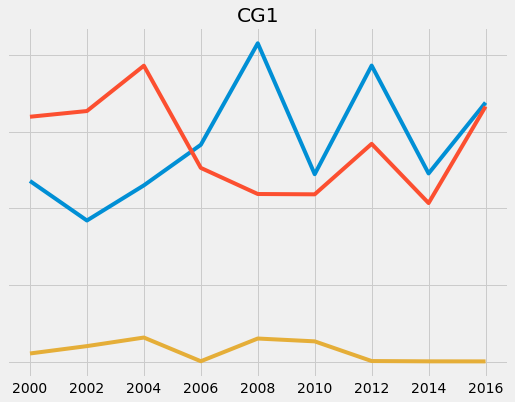

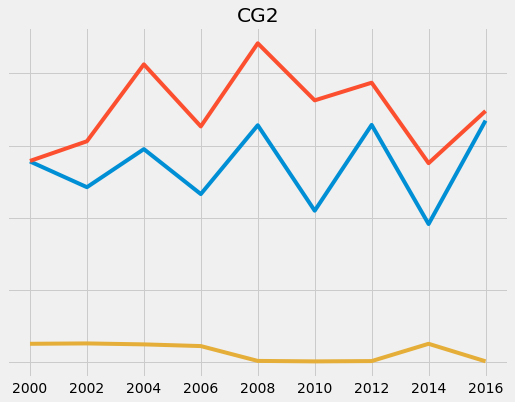

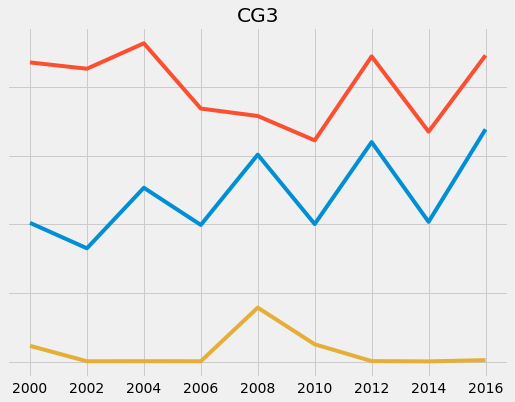

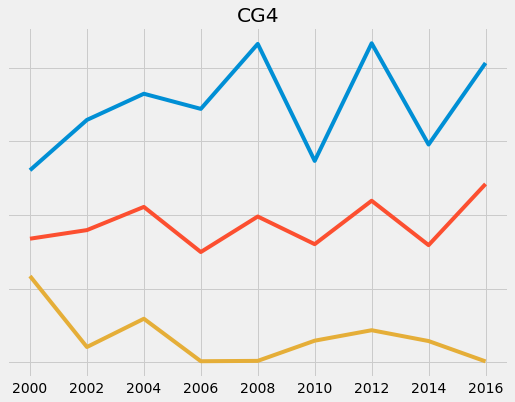

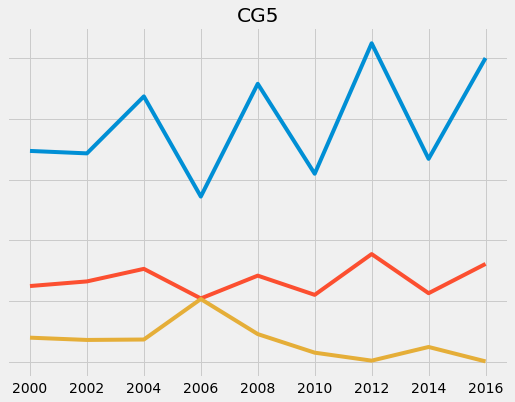

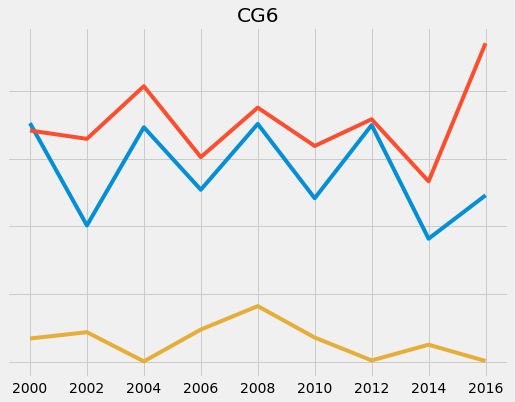

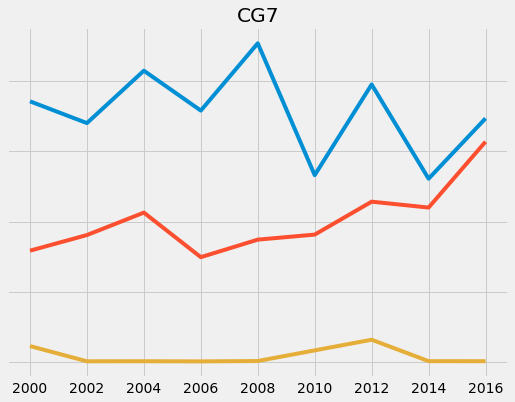

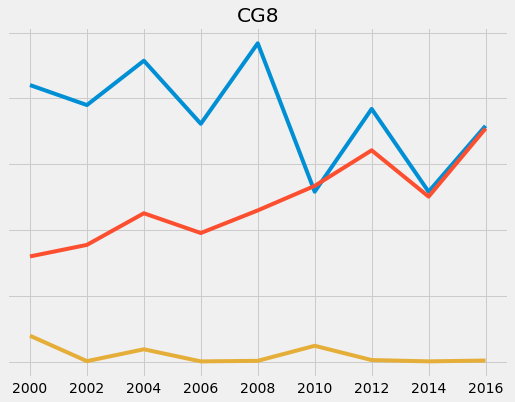

In [49]:
# Now let us make a plot for each congressional district.
x=range(2000,2018,2)

plt.style.use('fivethirtyeight')
for i in range(1,9):
    temp=df[df['CG']==i]
    y=temp['CONGIR']
    z=temp['CONGDFL']
    t=temp['CONGTH']
    plt.figure(i,figsize=(8,6))
    plt.plot(x,z, label='democrat')
    plt.plot(x,y, label='republican')
    plt.plot(x,t,label='third')
    plt.title('CG%d'%(i))
    plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    labelleft=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
    #plt.legend()
    plt.show()

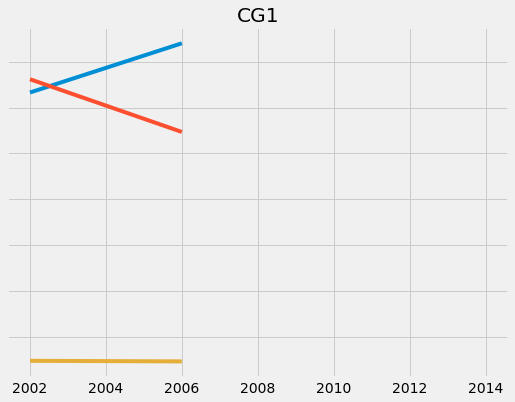

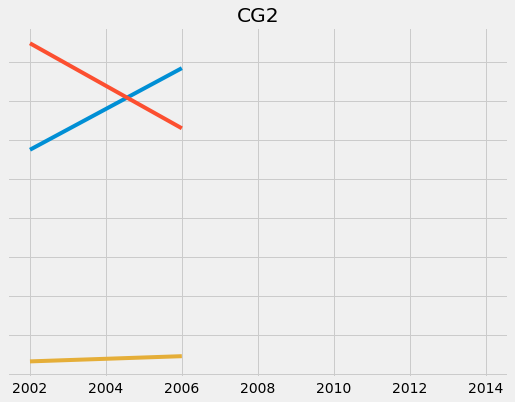

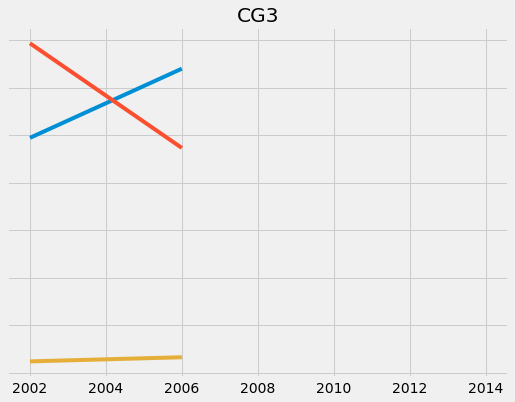

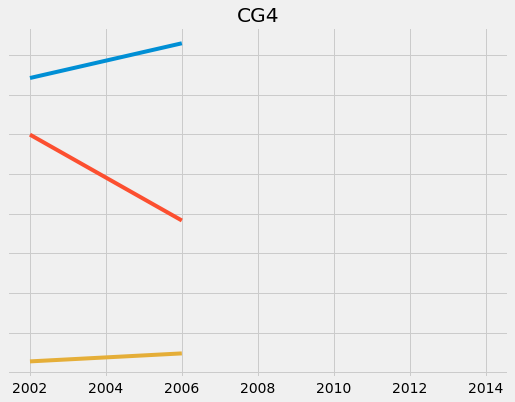

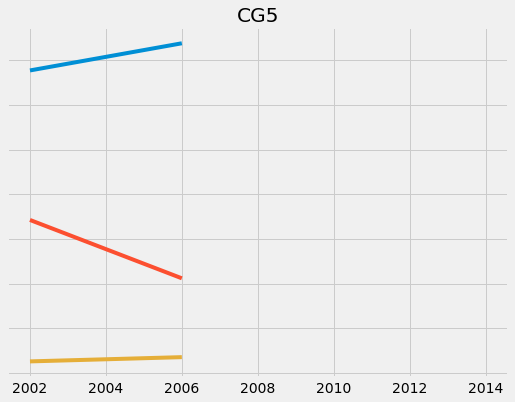

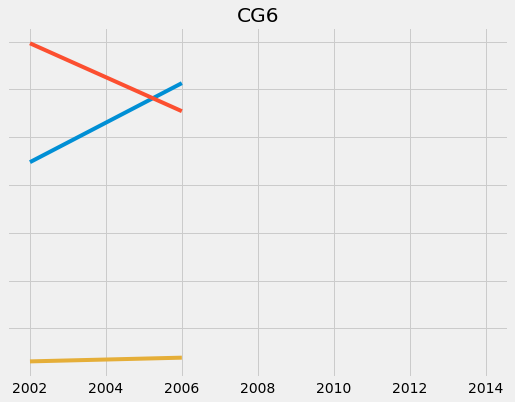

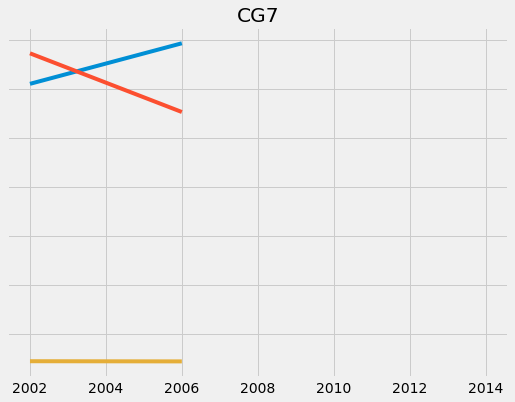

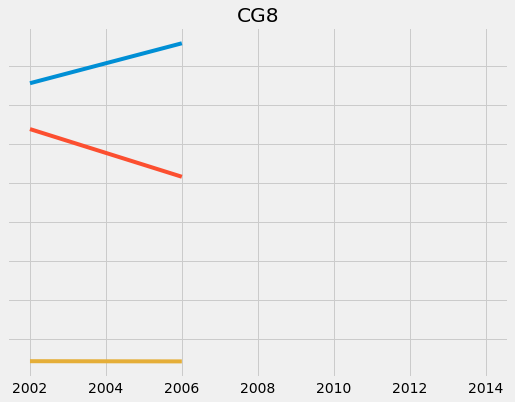

In [64]:
# Senator Races

# Now let us make a plot for each congressional district.
x=[1994,1998,2002,2006,2010,2014]
df=df_master[df_master['YEAR'].isin([1994,1998,2002,2006,2010,2014])]

plt.style.use('fivethirtyeight')
for i in range(1,9):
    temp=df[df['CG']==i]
    y=temp['SENIR']
    z=temp['SENDFL']
    t=temp['SENTH']
    plt.figure(i,figsize=(8,6))
    plt.plot(x,z, label='democrat')
    plt.plot(x,y, label='republican')
    plt.plot(x,t,label='third')
    plt.title('CG%d'%(i))
    plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    labelleft=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
    #plt.legend()
    plt.show()

### Current data:

Add a few more variables to our master data set to match current census data we have so that we can get our predictions for 2018.

In [89]:
df_master['RACE_ASIAN']=df_master['RACE_4']+df_master['RACE_5']
df_master['EDUC_LT9']=df_master['EDUC_1.0']+df_master['EDUC_2.0']
df_master['EDUC_912']=df_master['EDUC_3.0']+df_master['EDUC_4.0']+df_master['EDUC_5.0']+df_master['EDUC_6.0']
df_master['EDUC_SC']=df_master['EDUC_7.0']+df_master['EDUC_8.0']
df_master['EDUC_BSC']=df_master['EDUC_10.0']
df_master['EDUC_GS']=df_master['EDUC_11.0']
df_master.head()

Unnamed: 0  index    YEAR   CG  CONGTOT  CONGIR  CONGDFL  CONGTH  SENTOT  \
0           0    117  1850.0  0.0      NaN     NaN      NaN     NaN     NaN   
1           1    118  1860.0  0.0      NaN     NaN      NaN     NaN     NaN   
2           2    119  1870.0  0.0      NaN     NaN      NaN     NaN     NaN   
3           3    120  1880.0  0.0      NaN     NaN      NaN     NaN     NaN   
4           4    121  1900.0  0.0      NaN     NaN      NaN     NaN     NaN   

   SENIR   ...     govtot_pt  govir_pt  govdfl_pt  dif_tot  RACE_ASIAN  \
0    NaN   ...           NaN       NaN        NaN      NaN    0.000000   
1    NaN   ...           NaN       NaN        NaN      NaN    0.000000   
2    NaN   ...           NaN       NaN        NaN      NaN    0.000000   
3    NaN   ...           NaN       NaN        NaN      NaN    0.000114   
4    NaN   ...           NaN       NaN        NaN      NaN    0.000190   

   EDUC_LT9  EDUC_912  EDUC_SC  EDUC_BSC  EDUC_GS  
0       NaN       NaN      NaN       NaN      NaN  
1       NaN       NaN      NaN       NaN      NaN  
2       NaN       NaN      NaN       NaN      NaN  
3       NaN       NaN      NaN       NaN      NaN  
4       NaN       NaN      NaN       NaN      NaN  

[5 rows x 93 columns]

In [90]:
# Now let us drop the old columns we don't need
for i in [1,2,3,4,5,6,7,8,10,11]:
    df_master=df_master.drop(columns=['EDUC_%d.0'%(i)])
    
df_master=df_master.drop(columns=['RACE_4','RACE_5'])
df_master=df_master.drop(columns=['HCOVANY_1.0','HCOVANY_2.0'])
df_master.columns.values

array(['Unnamed: 0', 'index', 'YEAR', 'CG', 'CONGTOT', 'CONGIR',
       'CONGDFL', 'CONGTH', 'SENTOT', 'SENIR', 'SENDFL', 'SENTH',
       'GOVTOT', 'GOVIR', 'GOVDFL', 'GOVTH', 'AGE0-17', 'AGE18-34',
       'AGE35-49', 'AGE50-69', 'AGE70-100', 'INC0-10k', 'INC10k-20k',
       'INC20k-40k', 'INC40k-60k', 'INC60k-100k', 'INC>100k', 'EDUC_0.0',
       'EMPSTAT_0.0', 'EMPSTAT_1.0', 'EMPSTAT_2.0', 'EMPSTAT_3.0',
       'HISPAN_0', 'HISPAN_1', 'HISPAN_2', 'HISPAN_3', 'HISPAN_4',
       'MARST_1.0', 'MARST_2.0', 'MARST_3.0', 'MARST_4.0', 'MARST_5.0',
       'MARST_6.0', 'METRO_0.0', 'METRO_1.0', 'METRO_2.0', 'METRO_3.0',
       'METRO_4.0', 'RACE_1', 'RACE_2', 'RACE_3', 'RACE_6', 'RACE_7',
       'RACE_8', 'RACE_9', 'SEX_1', 'SEX_2', 'URBAN_1.0', 'URBAN_2.0',
       'prim_pt', 'prim_el', 'gen_pt', 'gen_el', 'congtot_pt',
       'congir_pt', 'congdfl_pt', 'sentot_pt', 'senir_pt', 'sendfl_pt',
       'govtot_pt', 'govir_pt', 'govdfl_pt', 'dif_tot', 'RACE_ASIAN',
       'EDUC_LT9', 'EDUC_912', 'E

In [91]:
# Save this
df_master.to_csv('df_master_Nov2.csv')

In [100]:
# Retrain model with the new data
df_old=pd.read_csv('df_state2.csv')
df_old.head()

df_master.columns.values

array(['Unnamed: 0', 'index', 'YEAR', 'CG', 'CONGTOT', 'CONGIR',
       'CONGDFL', 'CONGTH', 'SENTOT', 'SENIR', 'SENDFL', 'SENTH',
       'GOVTOT', 'GOVIR', 'GOVDFL', 'GOVTH', 'AGE0-17', 'AGE18-34',
       'AGE35-49', 'AGE50-69', 'AGE70-100', 'INC0-10k', 'INC10k-20k',
       'INC20k-40k', 'INC40k-60k', 'INC60k-100k', 'INC>100k', 'EDUC_0.0',
       'EMPSTAT_0.0', 'EMPSTAT_1.0', 'EMPSTAT_2.0', 'EMPSTAT_3.0',
       'HISPAN_0', 'HISPAN_1', 'HISPAN_2', 'HISPAN_3', 'HISPAN_4',
       'MARST_1.0', 'MARST_2.0', 'MARST_3.0', 'MARST_4.0', 'MARST_5.0',
       'MARST_6.0', 'METRO_0.0', 'METRO_1.0', 'METRO_2.0', 'METRO_3.0',
       'METRO_4.0', 'RACE_1', 'RACE_2', 'RACE_3', 'RACE_6', 'RACE_7',
       'RACE_8', 'RACE_9', 'SEX_1', 'SEX_2', 'URBAN_1.0', 'URBAN_2.0',
       'prim_pt', 'prim_el', 'gen_pt', 'gen_el', 'congtot_pt',
       'congir_pt', 'congdfl_pt', 'sentot_pt', 'senir_pt', 'sendfl_pt',
       'govtot_pt', 'govir_pt', 'govdfl_pt', 'dif_tot', 'RACE_ASIAN',
       'EDUC_LT9', 'EDUC_912', 'E

In [98]:
# Load the current data

current_data=pd.read_csv('../Data Sets/current_data.csv')
current_data.head()
names=[]
for i in range(1,current_data.shape[1]):
    names.append(current_data.columns[i])
names

['AGE0-17',
 'AGE18-34',
 'AGE35-49',
 'AGE50-69',
 'AGE70-100',
 'EDUC_LT9',
 'EDUC_912',
 'EDUC_SC',
 'EDUC_BSC',
 'EDUC_GS',
 'EMPSTAT_1.0',
 'EMPSTAT_2.0',
 'EMPSTAT_3.0',
 'HISPAN_0',
 'HISPAN_1',
 'HISPAN_2',
 'HISPAN_3',
 'HISPAN_4',
 'INC0-10k',
 'INC10k-20k',
 'INC20k-40k',
 'INC40k-60k',
 'INC60k-100k',
 'INC>100k',
 'RACE_1',
 'RACE_2',
 'RACE_3',
 'RACE_ASIAN',
 'RACE_6',
 'SEX_1',
 'SEX_2']

In [107]:
# Create the machine learning data set

df_state=df_master[df_master['CG']==0]
df_state=df_state[df_state['YEAR']>1940]
df_state=df_state.reset_index()
df_state=df_state.drop([5,6,7])
df_state.head(14)

level_0  Unnamed: 0  index    YEAR   CG    CONGTOT     CONGIR    CONGDFL  \
0         9           9    126  1950.0  0.0        NaN        NaN        NaN   
1        10          10    127  1960.0  0.0        NaN        NaN        NaN   
2        11          11    128  1970.0  0.0        NaN        NaN        NaN   
3        12          12    129  1980.0  0.0        NaN        NaN        NaN   
4        13          13    108  1990.0  0.0        NaN        NaN        NaN   
8        49          49     27  2000.0  0.0  2383506.0   993371.0  1234204.0   
9        58          58     36  2002.0  0.0  2201638.0  1029612.0  1097911.0   
10       67          67     45  2004.0  0.0  2721827.0  1236095.0  1399624.0   
11       76          76     54  2006.0  0.0  2178974.0   924636.0  1152621.0   
12       85          85     63  2008.0  0.0  5605228.0  2138030.0  3224960.0   
13       94          94     72  2010.0  0.0  2090591.0   970741.0  1002026.0   
14      103         103     81  2012.0  0.0  2813383.0  1210409.0  1560984.0   
15      112         112     90  2014.0  0.0  1963539.0   913539.0   985760.0   
16      121         121     99  2016.0  0.0  2860432.0  1334686.0  1434590.0   

      CONGTH     SENTOT    ...     govtot_pt  govir_pt  govdfl_pt  \
0        NaN        NaN    ...           NaN       NaN        NaN   
1        NaN        NaN    ...           NaN       NaN        NaN   
2        NaN        NaN    ...           NaN       NaN        NaN   
3        NaN        NaN    ...           NaN       NaN        NaN   
4        NaN        NaN    ...           NaN       NaN        NaN   
8   155931.0  2469422.0    ...      0.000000       NaN        NaN   
9    74115.0  2244640.0    ...      1.023090  0.443723   0.364607   
10   86108.0        0.0    ...      0.000000       NaN        NaN   
11   88114.0  2202772.0    ...      1.010997  0.466908   0.457326   
12  242238.0  5772882.0    ...      0.375903  0.432109   0.436271   
13   86455.0        0.0    ...      1.007859  0.432109   0.436271   
14   41990.0  2843207.0    ...      0.000000       NaN        NaN   
15   52790.0  1981528.0    ...      1.006044  0.445102   0.500714   
16    4376.0        0.0    ...      0.000000       NaN        NaN   

         dif_tot  RACE_ASIAN  EDUC_LT9  EDUC_912   EDUC_SC  EDUC_BSC   EDUC_GS  
0            NaN    0.000211  0.110092  0.071130  0.014089  0.005207  0.003198  
1            NaN    0.000850  0.403030  0.319983  0.058214  0.027536  0.016321  
2            NaN    0.001942  0.346599  0.378699  0.077453  0.045389  0.028021  
3            NaN    0.001895  0.255344  0.411519  0.109797  0.065869  0.043913  
4            NaN    0.000514  0.257941  0.388860  0.185500  0.061488  0.020372  
8   7.485348e+04    0.000943  0.202962  0.435573  0.175477  0.082404  0.029760  
9   8.131160e+04    0.006341  0.176831  0.362221  0.176316  0.146105  0.064288  
10  1.211280e+05    0.004762  0.161206  0.357844  0.192161  0.155301  0.061196  
11  3.888842e+04    0.001063  0.167464  0.434387  0.194728  0.100960  0.037051  
12 -2.683803e+06    0.000648  0.161974  0.426423  0.205817  0.103866  0.039212  
13  3.273109e+04    0.001270  0.154079  0.423142  0.214156  0.108121  0.039729  
14  1.372261e+05    0.001804  0.148168  0.419513  0.225446  0.109603  0.041227  
15  2.914919e+04    0.001420  0.143901  0.415254  0.227656  0.113103  0.043342  
16  1.076930e+05    0.001282  0.143723  0.398068  0.231870  0.120311  0.049825  

[14 rows x 80 columns]

In [157]:
# Add weather data and presidential data.
df_state['high']=df_old['high']
df_state['low']=df_old['low']
df_state['precipitation']=df_old['precipitation']
df_state['wind']=df_old['wind']
df_state['pres']=df_old['pres']
#df_state=df_state.drop(columns=['level_0','Unnamed: 0','index'])

# Save this
df_state=df_state.reset_index()
df_state.to_csv('df_state.csv')

# Now for the machine learning one
df_ml=df_state[names]
df_ml.hebad()

# Save this as well
df_ml.to_csv('df_state_ml.csv')


In [296]:
df_ml.to_csv('df_state_ml.csv')

## Training

### SVR

The average error for SVR and 10 features is  9.427912615503097


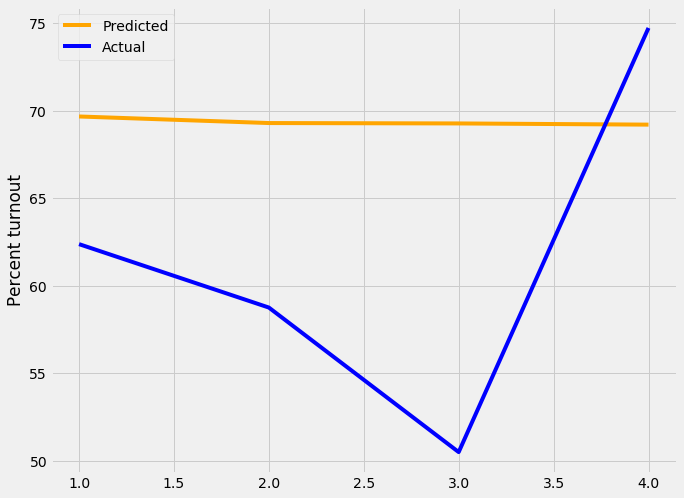

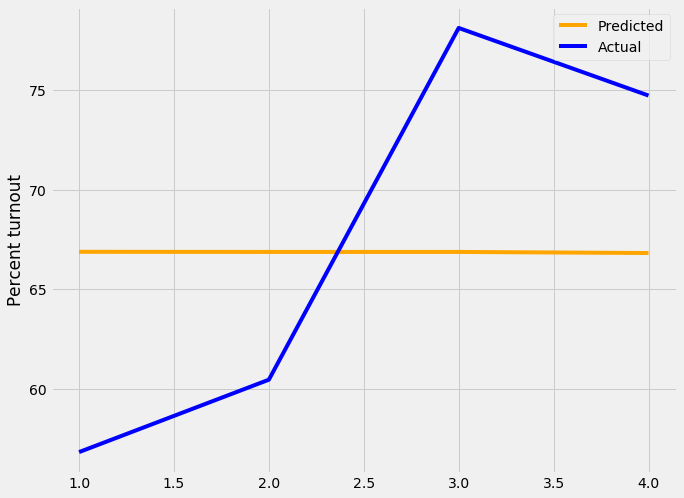

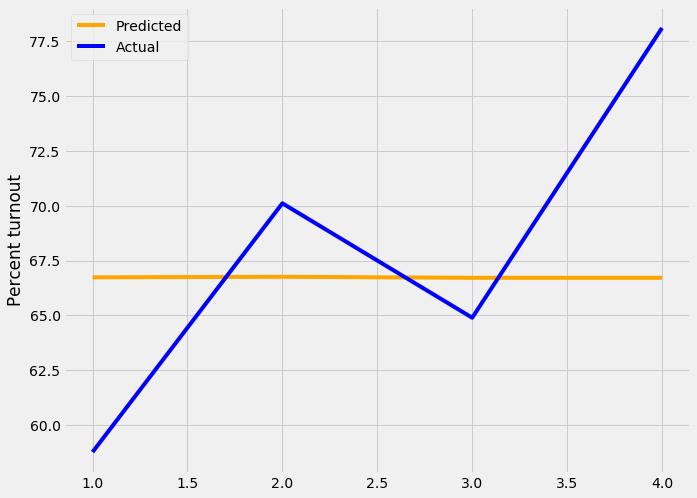

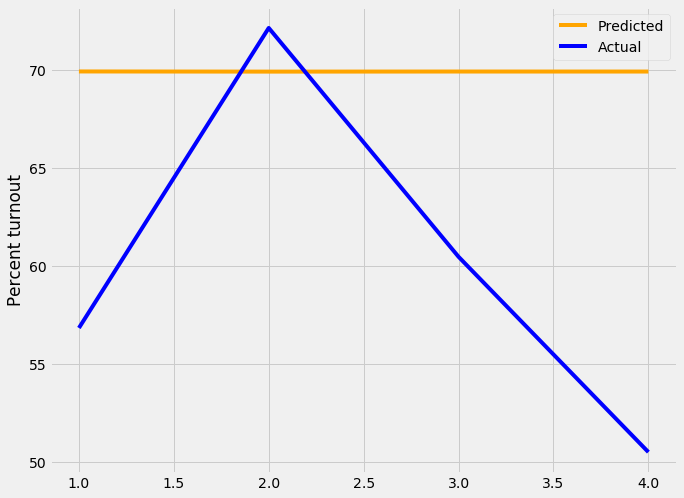

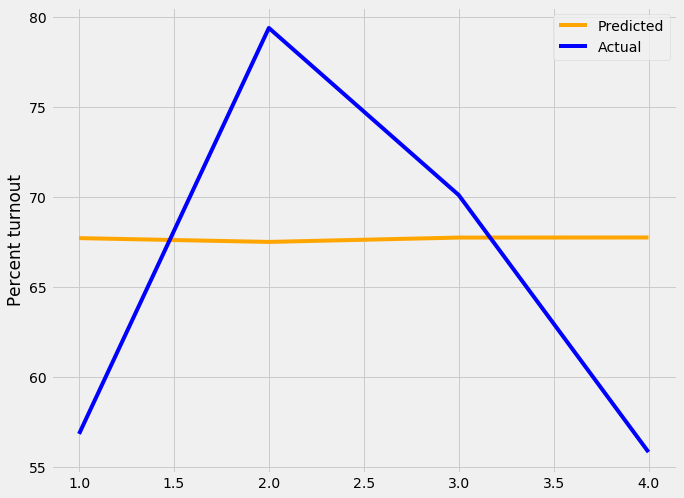

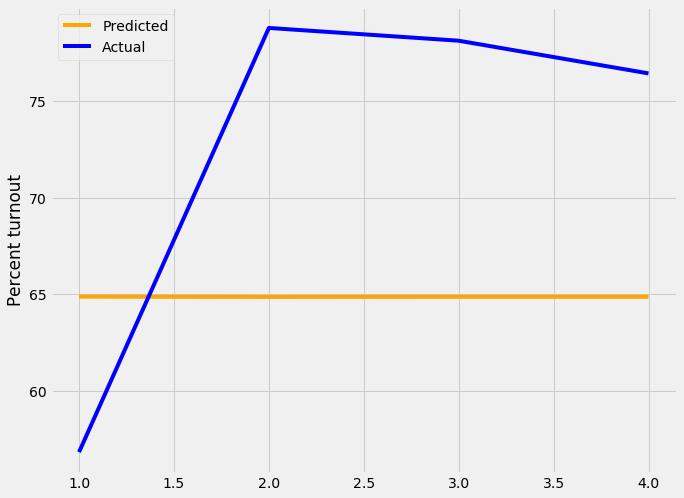

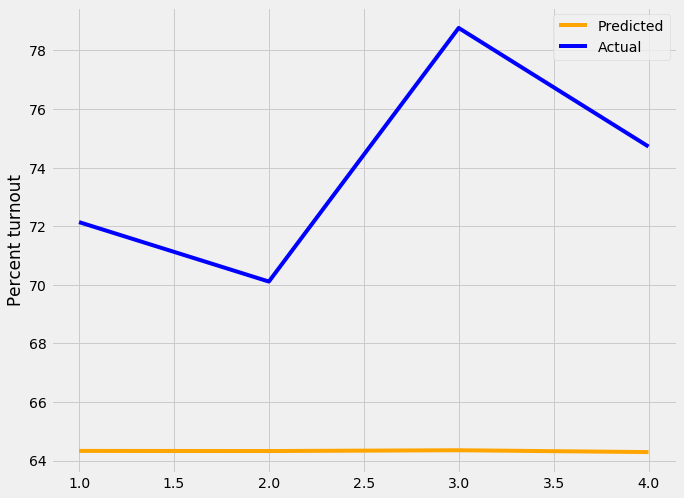

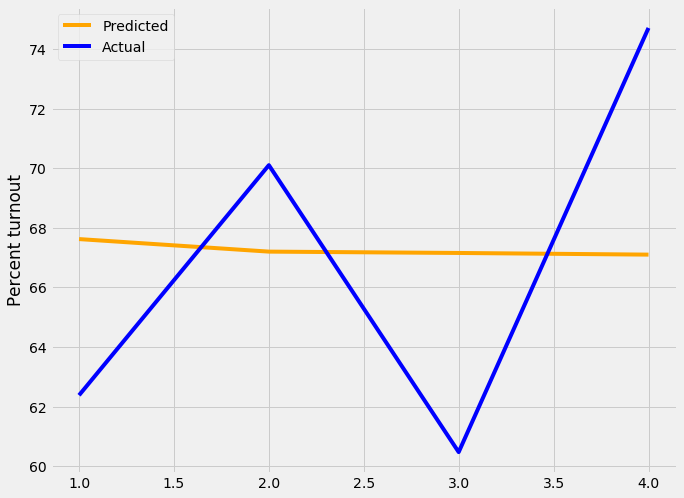

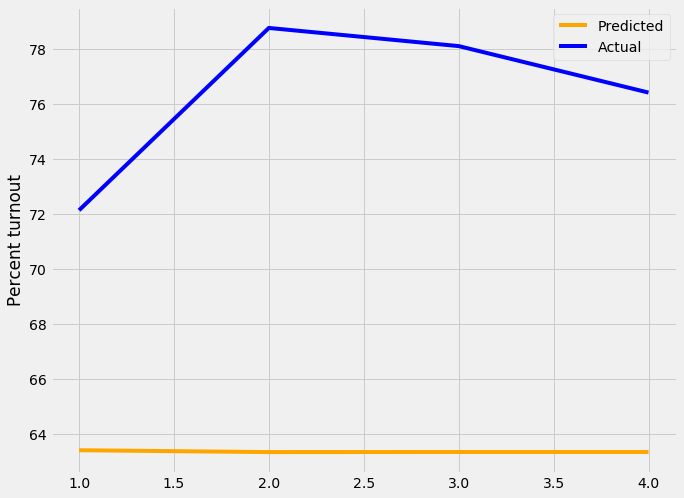

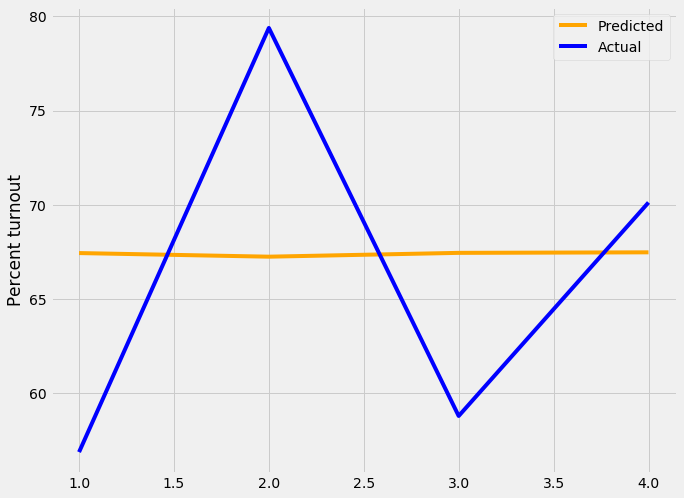

In [292]:
# Now let us train
df_ml=pd.read_csv('df_state_ml.csv')
y=df_state['gen_pt']

df_state2=pd.read_csv('df_state2.csv')

df_ml['high']=df_state2['high']
df_ml['low']=df_state2['low']
df_ml['wind']=df_state2['wind']
df_ml['precipitation']=df_state2['precipitation']
df_ml['pres']=df_state2['pres']

df_ml.to_csv('df_state_ml.csv')


In [299]:
X=[]
for row in df_ml.iterrows():
    index, data = row
    X.append(data.tolist())
    
plot_svr(X,y,'rbf',gam=0.1,supress=True) 

The average error for SVR and 10 features is  7.801885405105656


In [331]:
from sklearn.feature_selection import SelectKBest, f_regression

X_new = SelectKBest(f_regression, k=10).fit_transform(np.asarray(X), y)
indeces=SelectKBest(f_regression,k=10).fit(np.asarray(X),y).get_support(True) #Selected features
indeces=np.asarray(indeces).astype(int)

plot_svr(X_new,y,'rbf',gam=0.1,supress=True)

The average error for SVR and 10 features is  7.756032211079068


In [305]:
df_ml.columns[indeces]

Index(['EDUC_LT9', 'EDUC_912', 'EDUC_GS', 'HISPAN_2', 'RACE_2', 'RACE_ASIAN',
       'SEX_1', 'SEX_2', 'low', 'pres'],
      dtype='object')

### Lasso

In [380]:
from sklearn import linear_model

errors=[]
for i in range(0,10):
    [X_train, y_train, X_test, y_test]=test_train_sample(X,y)
    clf = linear_model.Lasso(alpha=0.1)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    
    t=[]
    for j in range(0,len(clf.coef_)):
        if clf.coef_[j]!=0:
            t.append(j)
    print(df_ml.columns[t])
    
    # Compute average error
    errors.append(np.mean(abs(np.array(y_test)-np.array(y_pred))))
    '''
    # Quick plot
    plt.figure(i,figsize=(10,8))
    plt.ylabel('Percent turnout')
    plt.plot([1,2,3,4],y_pred,color='orange',label='Predicted')
    plt.plot([1,2,3,4],y_test,color='blue',label='Actual')
    plt.legend()
    '''
error=np.mean(errors)
print('The average error for Lasso is ',error)

Index(['EDUC_912', 'INC0-10k', 'high', 'low', 'wind', 'pres'], dtype='object')
Index(['INC0-10k', 'high', 'low', 'wind', 'pres'], dtype='object')
Index(['EDUC_LT9', 'EDUC_912', 'high', 'low', 'wind', 'precipitation', 'pres'], dtype='object')
Index(['INC0-10k', 'high', 'low', 'wind', 'precipitation', 'pres'], dtype='object')
Index(['EDUC_912', 'high', 'low', 'wind', 'precipitation', 'pres'], dtype='object')
Index(['EDUC_912', 'high', 'low', 'wind', 'precipitation', 'pres'], dtype='object')
Index(['INC0-10k', 'high', 'low', 'wind', 'pres'], dtype='object')
Index(['INC0-10k', 'high', 'low', 'wind', 'pres'], dtype='object')
Index(['INC0-10k', 'high', 'low', 'wind', 'pres'], dtype='object')
Index(['INC0-10k', 'high', 'low', 'pres'], dtype='object')
The average error for Lasso is  3.835325496634885


In [247]:
def plot_elastic_net(X,y,supress=False):
    # Takes feature matrix and output vector and fits the decision tree model on it 10 times with random samples
    # d is max_depth of the tree
    # if supress is true, no plots are made

    from sklearn.linear_model import ElasticNet
    errors=[]
    for i in range(0,10):
        [X_train, y_train, X_test, y_test]=test_train_sample(X,y)
        regr = ElasticNet(random_state=0)
        regr.fit(X_train, y_train)
        y_pred=regr.predict(X_test)
      
        # Compute average error
        errors.append(np.mean(abs(np.array(y_test)-np.array(y_pred))))
        
        if supress==False:    
            # Quick plot
            plt.figure(i,figsize=(10,8))
            plt.ylabel('Percent turnout')
            plt.plot(np.array(y_pred),color='orange',label='Predicted')
            plt.plot(np.array(y_test),color='blue',label='Actual')
            plt.legend()

    error=np.mean(errors)
    print('The average error for elastic net is ',error)

The average error for elastic net is  9.34153013236745


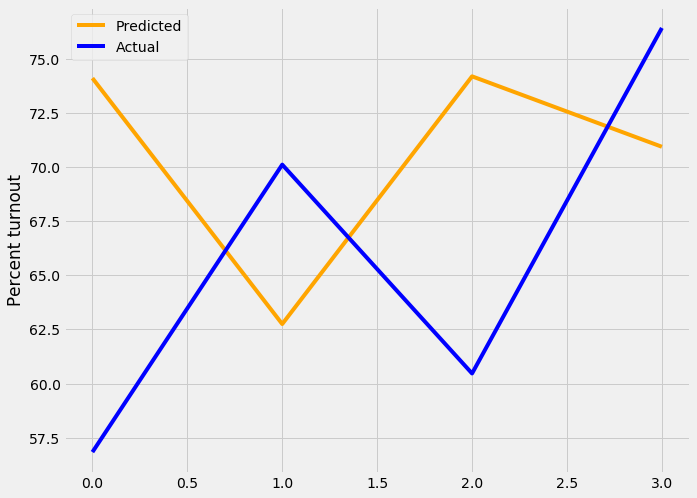

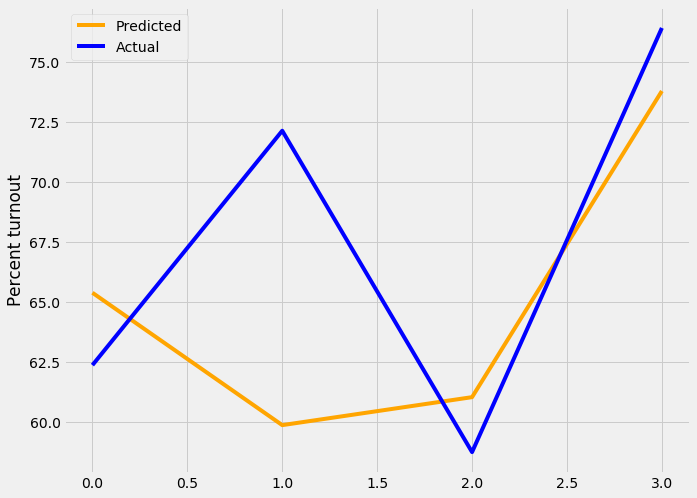

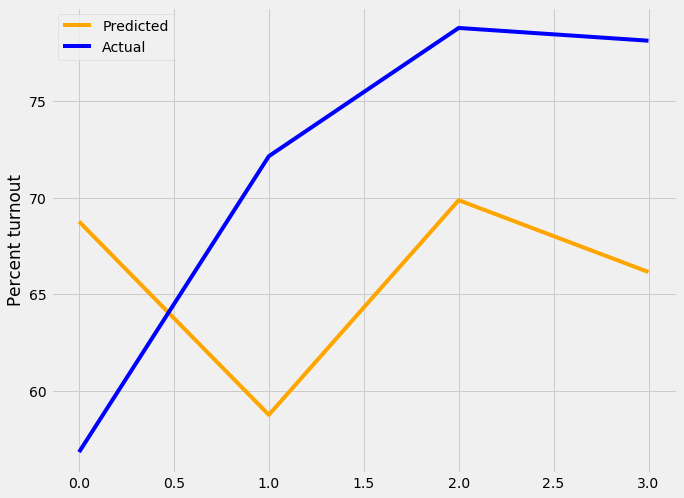

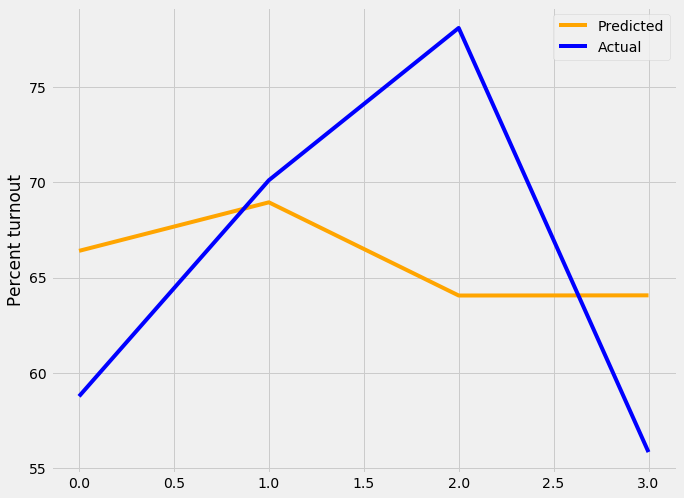

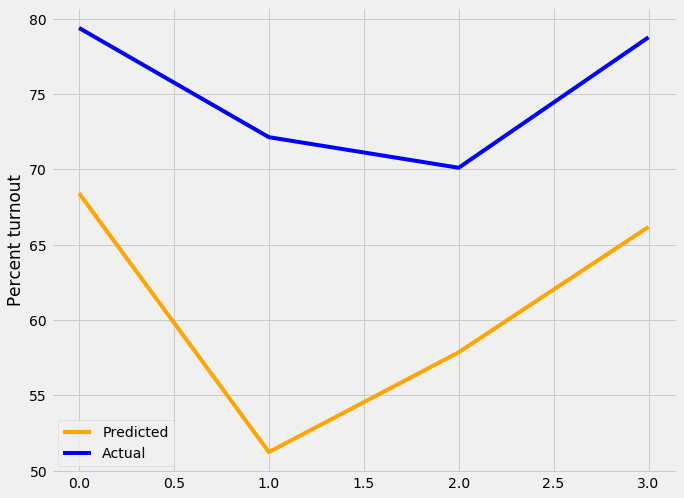

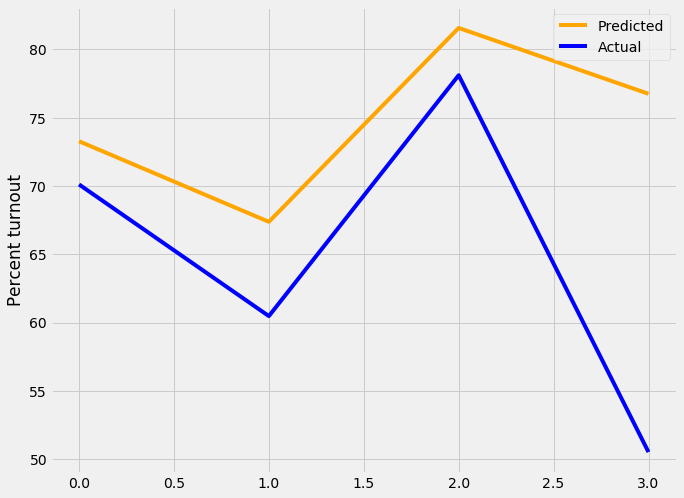

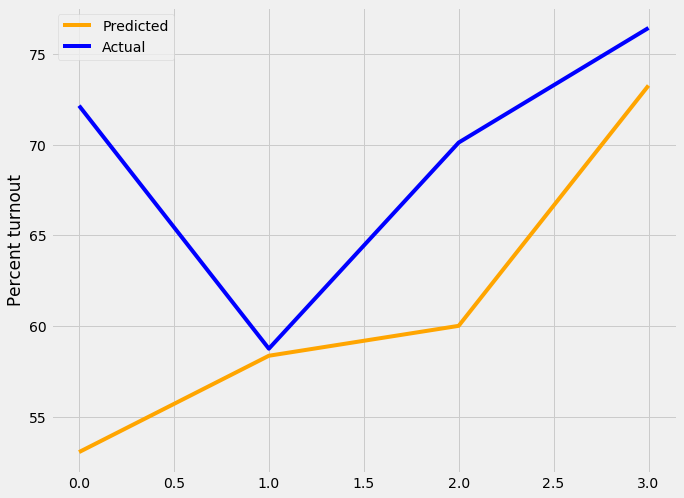

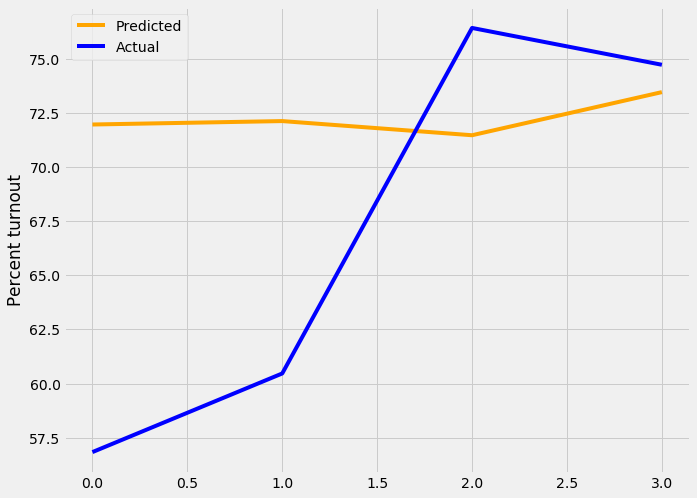

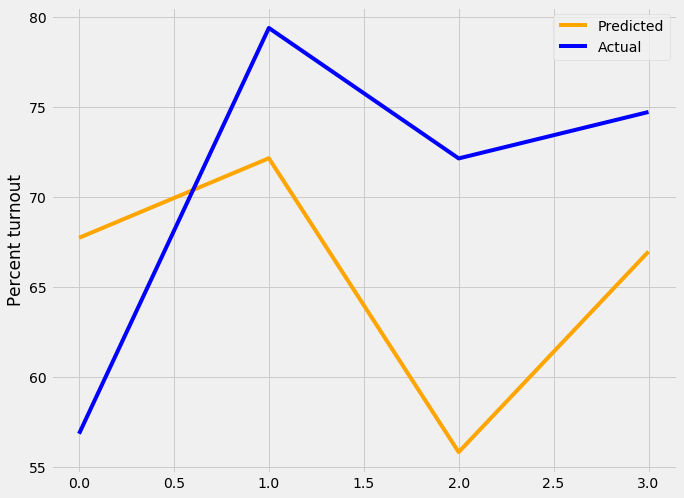

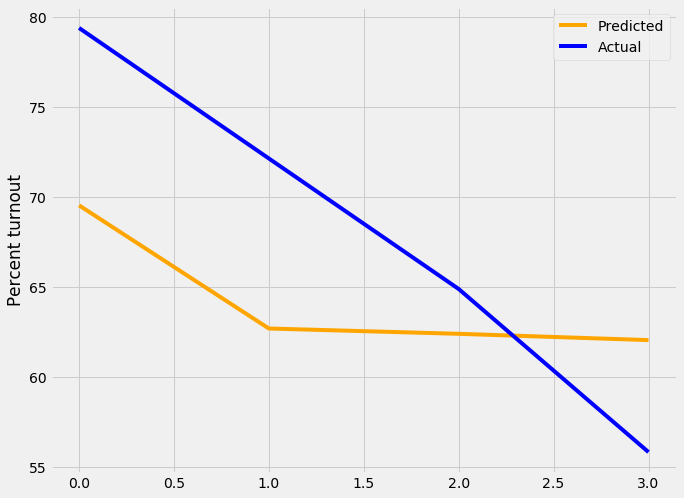

In [381]:
plot_elastic_net(X,y)

### Decision Tree

In [309]:
def plot_decision_tree(X,y,supress=False):
    # kernel can be 'rbf', 'linear', or 'poly'. If 'rbf' is given then a value for gamma is needed. If 'poly' is selected,
    # a value for the degree is needed
    # if supress is true, no plots are made
    from sklearn import tree
    errors=[]
    for i in range(0,10):
        [X_train, y_train, X_test, y_test]=test_train_sample(X,y)
        clf = tree.DecisionTreeRegressor()
        clf = clf.fit(X, y)
        y_pred=clf.predict(X_test)
      
        # Compute average error
        errors.append(np.mean(abs(np.array(y_test)-np.array(y_pred))))
        
        if supress==False:    
            # Quick plot
            plt.figure(i,figsize=(10,8))
            plt.ylabel('Percent turnout')
            plt.plot([1,2,3,4],y_pred,color='orange',label='Predicted')
            plt.plot([1,2,3,4],y_test,color='blue',label='Actual')
            plt.legend()

    error=np.mean(errors)
    print('The average error for Decision tree net is ',error)

The average error for Decision tree net is  0.0


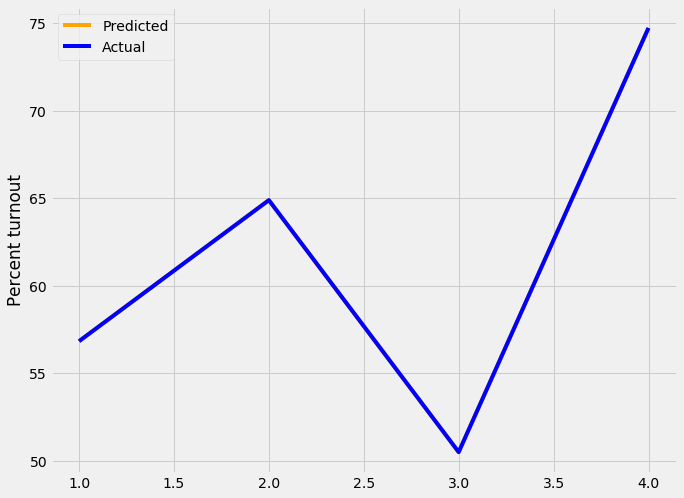

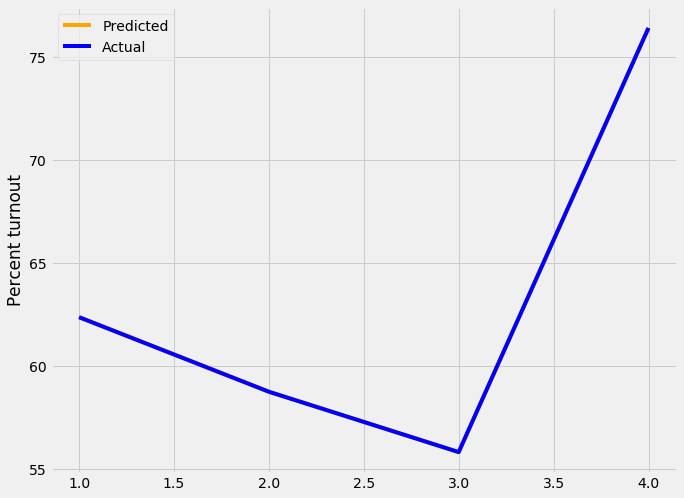

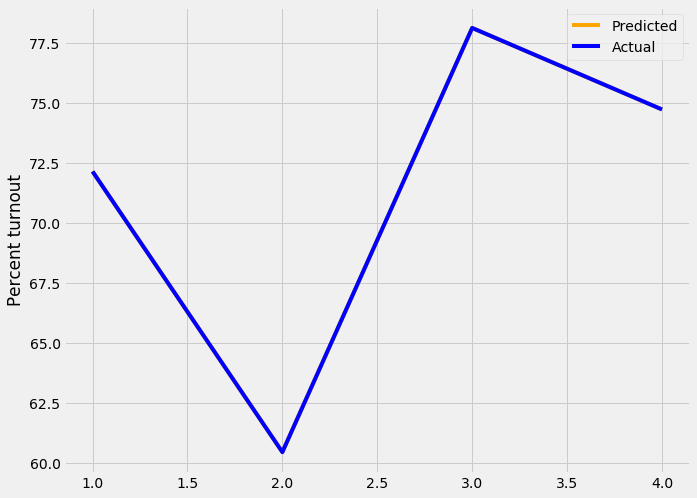

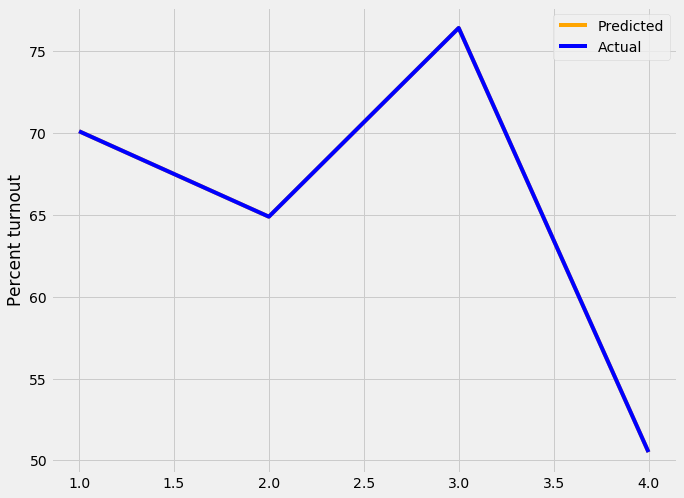

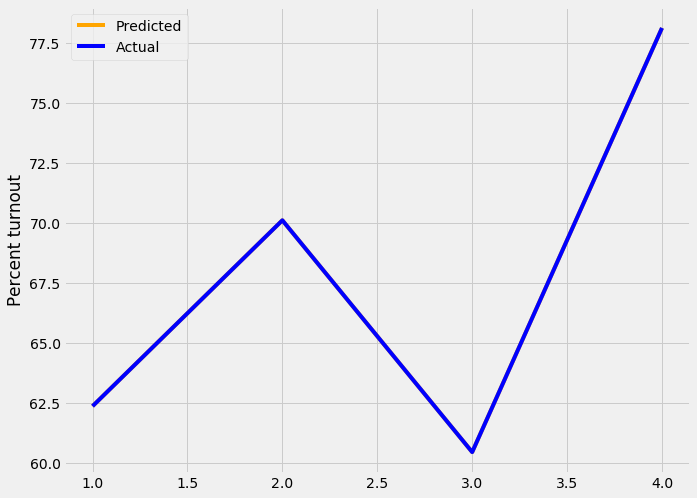

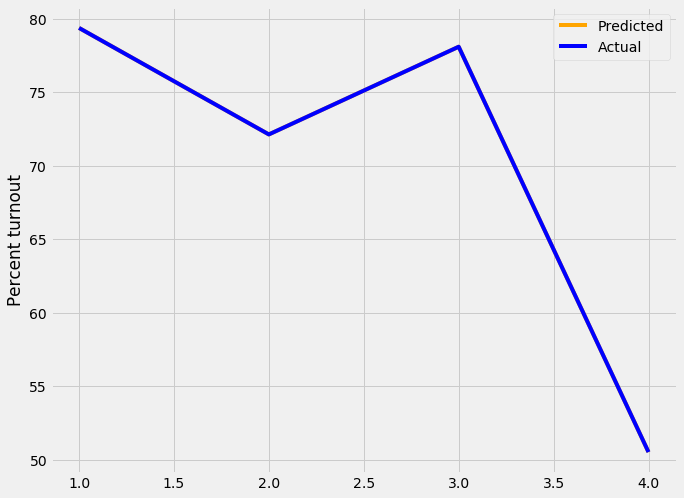

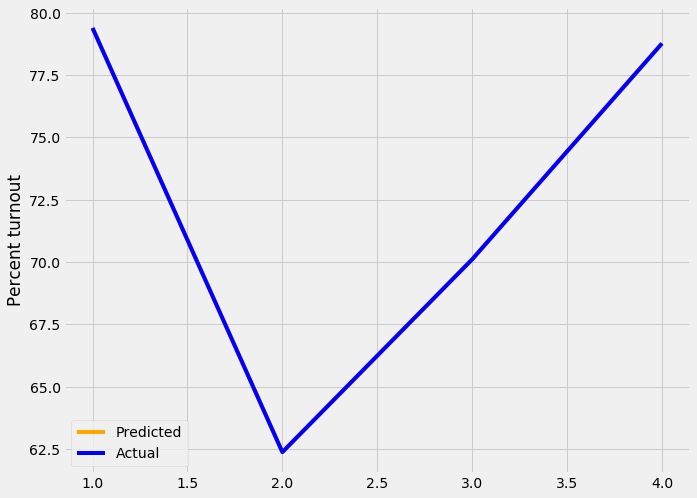

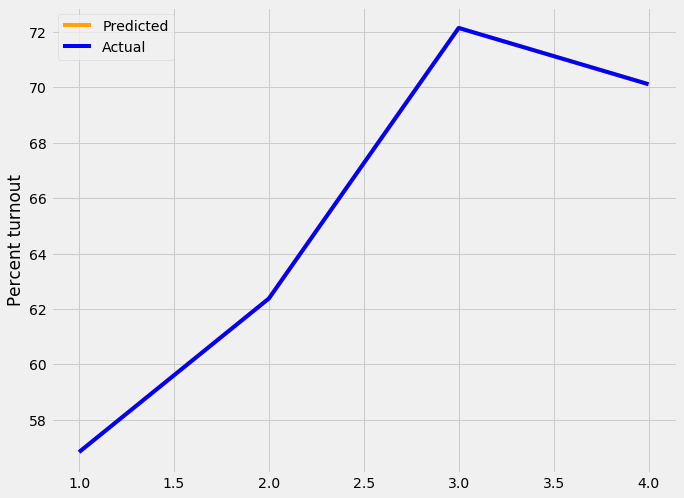

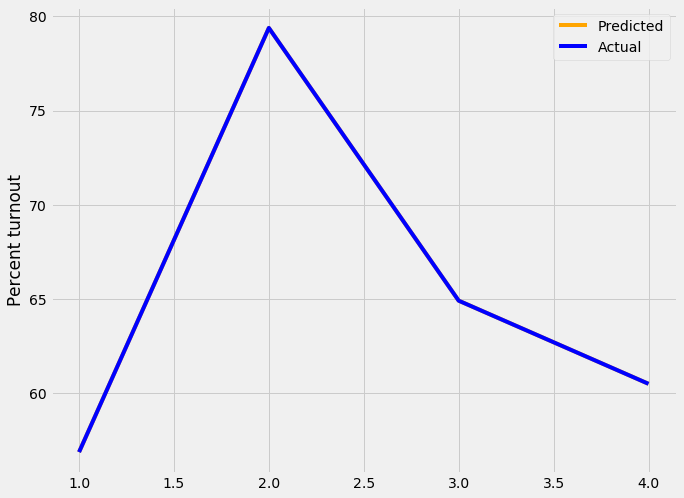

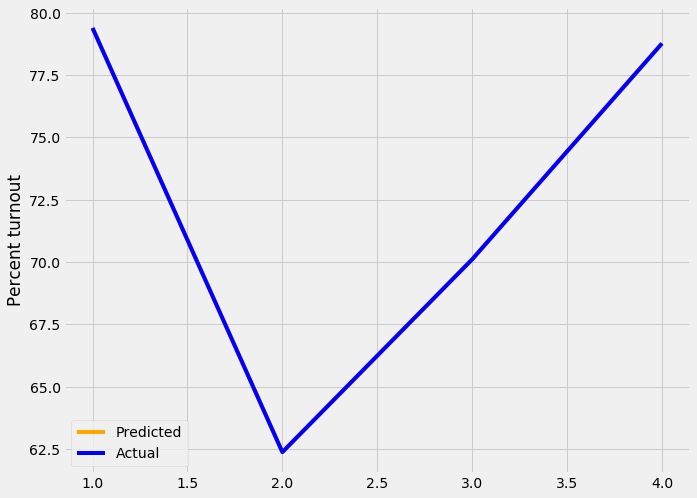

In [382]:
plot_decision_tree(X,y)

The average error for Elastic net is  0.0


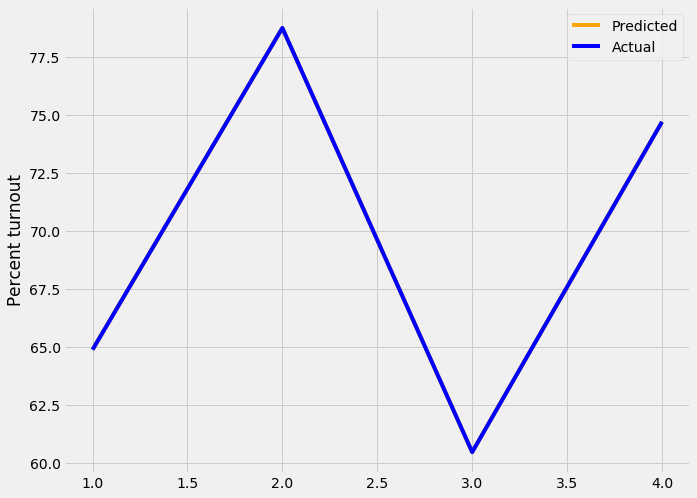

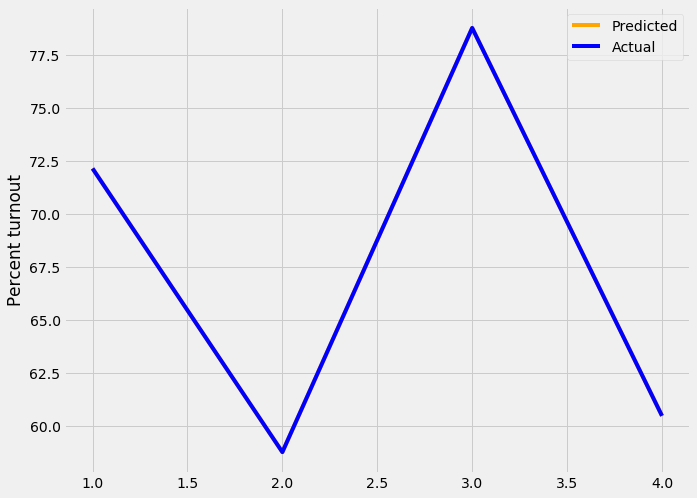

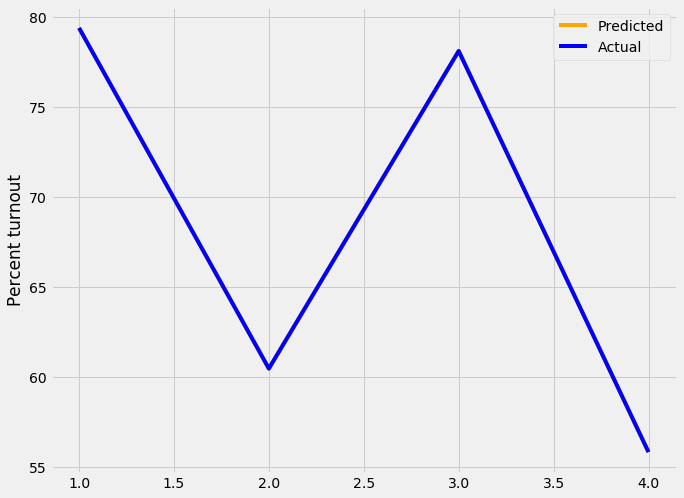

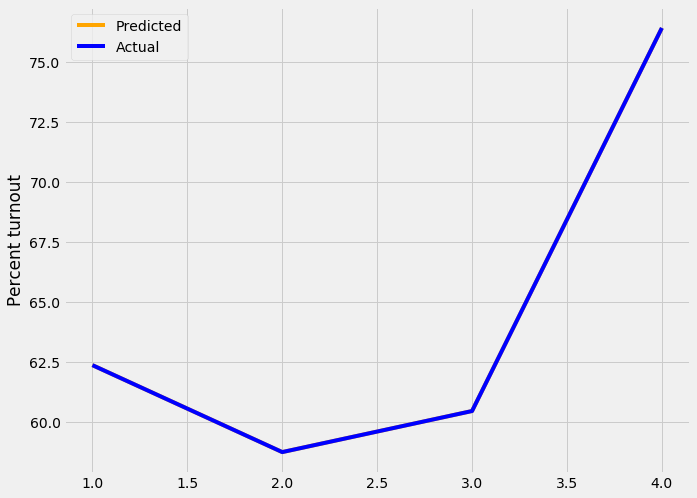

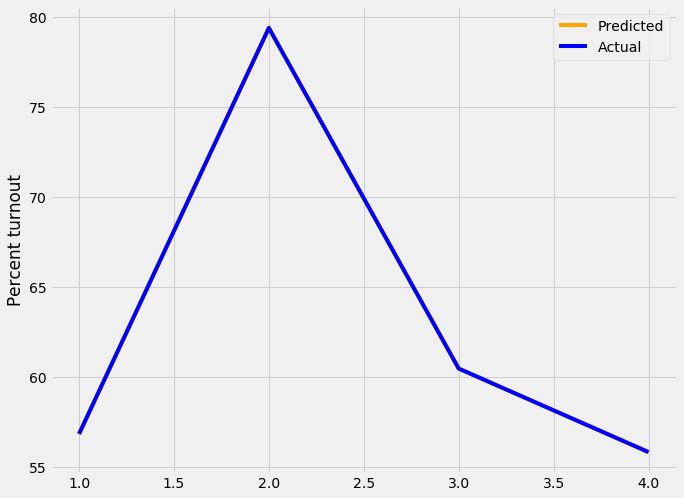

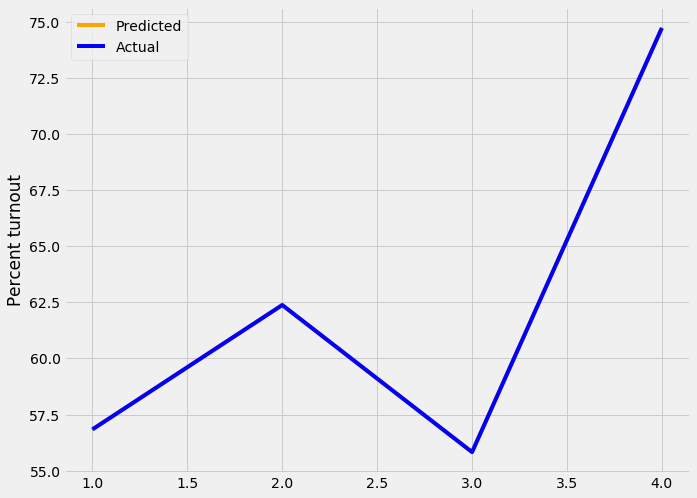

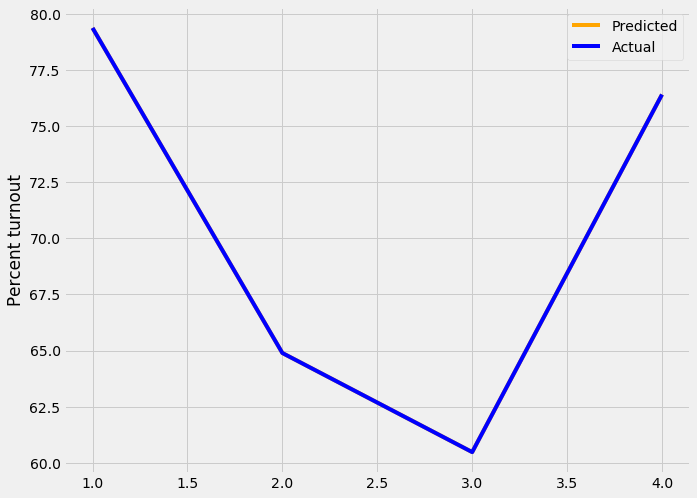

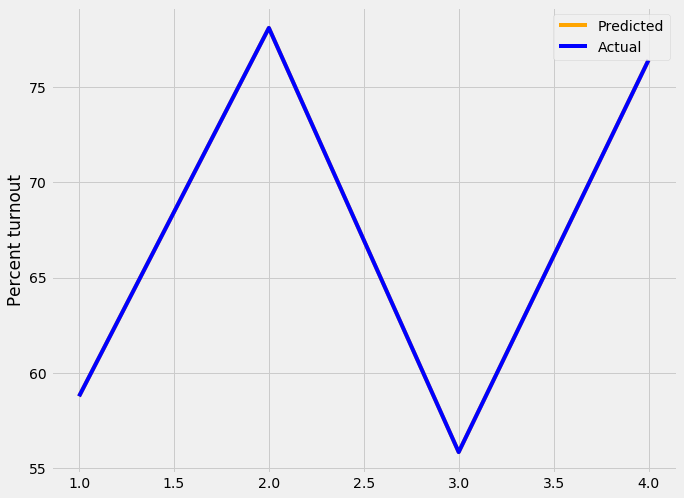

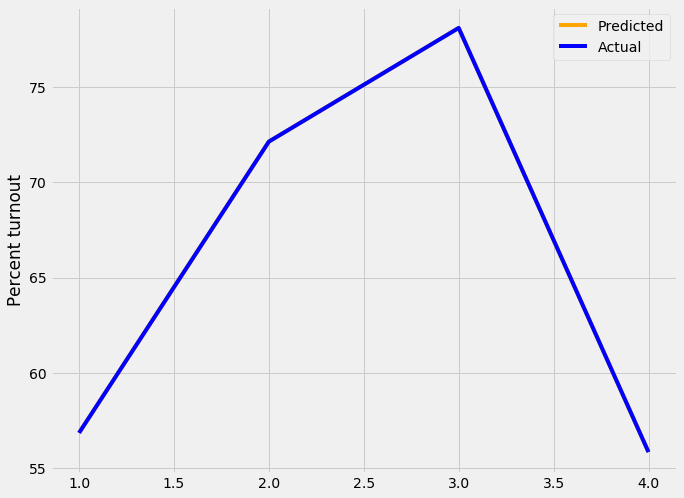

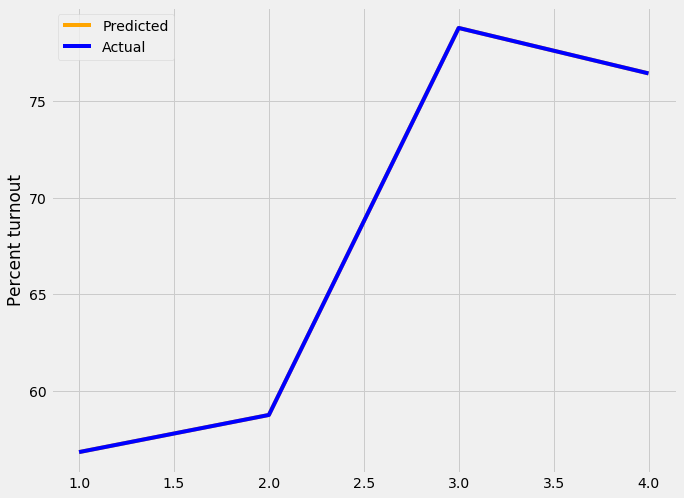

In [328]:
from sklearn import tree
errors=[]
for i in range(0,10):
    [X_train, y_train, X_test, y_test]=test_train_sample(X,y)
    clf = tree.DecisionTreeRegressor()
    clf = clf.fit(X, y)
    y_pred=clf.predict(X_test)
      
    # Compute average error
    errors.append(np.mean(abs(np.array(y_test)-np.array(y_pred))))
        
       
    # Quick plot
    plt.figure(i,figsize=(10,8))
    plt.ylabel('Percent turnout')
    plt.plot([1,2,3,4],y_pred,color='orange',label='Predicted')
    plt.plot([1,2,3,4],y_test,color='blue',label='Actual')
    plt.legend()

error=np.mean(errors)
print('The average error for Elastic net is ',error)

In [325]:
current_data=pd.read_csv('../Data Sets/current_data.csv')
current_data.shape
today=current_data.iloc[8,:]
today

AGE0-17           0.233195
AGE18-34          0.225328
AGE35-49          0.189289
AGE50-69          0.242356
AGE70-100         0.109834
EDUC_LT9          0.020521
EDUC_912          0.194761
EDUC_SC           0.218009
EDUC_BSC          0.159394
EDUC_GS           0.084863
EMPSTAT_1.0       0.530811
EMPSTAT_2.0       0.019861
EMPSTAT_3.0       0.242032
HISPAN_0          0.946802
HISPAN_1          0.036572
HISPAN_2          0.002751
HISPAN_3          0.000850
HISPAN_4          0.013025
INC0-10k          0.017339
INC10k-20k        0.028891
INC20k-40k        0.058668
INC40k-60k        0.060259
INC60k-100k       0.097196
INC>100k          0.122555
RACE_1            0.826751
RACE_2            0.064758
RACE_3            0.010903
RACE_ASIAN        0.048989
RACE_6            0.000367
SEX_1             0.498639
SEX_2             0.501361
high             41.000000
low              31.000000
wind             15.000000
precipitation     0.030000
pres              0.000000
Name: 8, dtype: float64

## 2018 Predictions

In [342]:
current=[]
for i in range(0,len(today)):
    current.append(today[i])
len(current)

36

In [390]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, out)
clf.predict([current])

array([56.84])

In [393]:
from sklearn.linear_model import ElasticNet
regr = ElasticNet(random_state=0)
regr.fit(X, out)
print(regr.predict([current]))

[64.27460191]


In [394]:
from sklearn.feature_selection import SelectKBest, f_regression

X_new = SelectKBest(f_regression, k=10).fit_transform(np.asarray(X), y)
indeces=SelectKBest(f_regression,k=10).fit(np.asarray(X),y).get_support(True) #Selected features
indeces=np.asarray(indeces).astype(int)

from sklearn import svm
clf = svm.SVR(kernel='rbf', C=1e3, gamma=0.1)
clf.fit(X_new,out) 
print(clf.predict([z]))

[63.4076113]


In [395]:
df_ml.columns[indeces]

Index(['EDUC_LT9', 'EDUC_912', 'EDUC_GS', 'HISPAN_2', 'RACE_2', 'RACE_ASIAN',
       'SEX_1', 'SEX_2', 'low', 'pres'],
      dtype='object')

In [397]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X,y)
print(clf.coef_)

print(clf.intercept_) 
print(clf.predict([current]))

[-0.          0.          0.         -0.         -0.          1.44889044
  0.          0.          0.          0.          0.          0.
 -0.         -0.         -0.          0.          0.          0.
 -0.          0.          0.         -0.         -0.         -0.
 -0.          0.         -0.          0.          0.         -0.
  0.         -0.29678469  0.46651815 -0.31977552  0.         17.98328715]
62.077675532273865
[59.60466548]


In [403]:
#Total turnout:
(3246893*0.596)-76700

1858448.228